In [123]:
### Supress the Warnings so that the same is not shown while result outcomes

import warnings
warnings.filterwarnings('ignore')

In [124]:
# Dataframe libraries
import numpy as np
import pandas as pd

In [125]:
# Visulisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline 

In [126]:
# Scikit Library
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [127]:
## Set display limits
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [128]:
#read the dataset
df=pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

## Understanding the data

In [129]:
# Check the dimensions
df.shape

(1460, 81)

In [130]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

In [132]:
## Checking for null values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [133]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null.head()

Null %
Features           
PoolQC        99.52
MiscFeature   96.30
Alley         93.77
Fence         80.75
FireplaceQu   47.26

In [134]:
# dataframe with features having null values
null_df = null[null["Null %"] > 0]
null_df

Null %
Features            
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07

### Dropping missing value columns which has more than 45% missing values

In [135]:
# we will drop the 'PoolQC','MiscFeature','Alley','Fence' column becuase there are so many missing values
df = df.drop(['PoolQC','FireplaceQu','MiscFeature','Alley','Fence'],axis=1)

In [136]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

Null %
Features            
LotFrontage    17.74
GarageType      5.55
GarageCond      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07

In [137]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
     

In [138]:
#Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [139]:
# Numeric columns
df.select_dtypes(exclude='object').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

### Treating the missing Values 

In [140]:
#Hadle Missingness for Categorical columns (Imputation)
for col in ["GarageCond", "GarageType", "GarageFinish", "GarageQual", "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]:
    df[col].fillna("none", inplace=True)

In [141]:
# Handle Missingness for Numeric columns (Imputation)
for col in ["LotFrontage", "GarageYrBlt","MasVnrArea"]:
    df[col].fillna(df[col].median(), inplace=True)

In [142]:
#Deleting rows as Very Low Missingness (Deletion)
# df.dropna(subset=["MasVnrArea", "MasVnrType", "Electrical"], inplace=True)
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [143]:
# Confirm that all missing values are addressed
print(df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

### All NULL values are handled

In [144]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717             1             0         1         0             3             1          Gd        

In [145]:
# Now dropping the ID column as it cannot be used for analysis
df.drop(['Id'], axis=1, inplace=True)

In [146]:
df.shape

(1460, 75)

In [147]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000


### Check Unique value counts for each column

In [148]:
for i in df.columns :
    print(i,"\n")
    print(df[i].value_counts(),"\n")
    print("----------------------------------")

MSSubClass 

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

----------------------------------
MSZoning 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

----------------------------------
LotFrontage 

69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
24.0      19
68.0      19
64.0      19
73.0      18
55.0      17
63.0      17
72.0      17
79.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
43.0      12
67.0      12
40.0      12
57.0      12
76.0      11
34.0      10
53.0      10
86.0      10
92.0      10
88.0      10
44.0       9
84.0       9
35.0       9
62.0       9
77.0       9
93.0       8
98.0       8
96.0       

* many columns have only 1 value with maximum frequency

* lets drops the columns where the highest frequeny is >= 90%

In [149]:
#dropping the following columns that have more than 90% values associated to a specific value
dropCols = [] 
for i in df.columns :
    if df[i].value_counts().max() >= len(df)*0.90:
        dropCols.append(i)
print(dropCols)

#removing columns with skewed data

df.drop(dropCols, axis = 1, inplace = True)

df.head()

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  YrSold SaleType SaleCondition  SalePrice
0          60       RL         65.0     8450      Reg         Lvl    Inside      CollgCr       Norm     1Fam     2Story            7            5       2003          2003     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856        Ex       856       854       1710             1         2         1             3          Gd             8           0     Attchd       2003.0          RFn           2         548         TA           0           61              0       2    2008       WD        Normal     208500
1          20       RL         80.0     9600      Reg         Lvl       FR2      Veenker      Feedr     1Fam     1Story            6            8       1976          1976     Gable     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262        Ex      1262         0       1262             0         2         0             3          TA             6           1     Attchd       1976.0          RFn           2         460         TA         298            0              0       5    2007       WD        Normal     181500
2          60       RL         68.0    11250      IR1         Lvl    Inside      CollgCr       Norm     1Fam     2Story            7            5       2001          2002     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920        Ex       920       866       1786             1         2         1             3          Gd             6           1     Attchd       2001.0          RFn           2         608         TA           0           42              0       9    2008       WD        Normal     223500
3          70       RL         60.0     9550      IR1         Lvl    Corner      Crawfor       Norm     1Fam     2Story            7            5       1915          1970     Gable     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756        Gd       961       756       1717             1         1         0             3          Gd             7           1     Detchd       1998.0          Unf           3         642         TA           0           35            272       2    2006       WD       Abnorml     140000
4          60       RL         84.0    14260      IR1         Lvl       FR2      NoRidge       Norm     1Fam     2Story            8            5       2000          2000     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ         655          Unf           0        490         1145        Ex      1145      1053       2198             1         2         1             4          Gd             9           1     Attchd       2000.0          RFn           3         836         TA         192           84              0      12    2008       WD        Normal     250000

In [150]:
df.shape

(1460, 57)

In [151]:
#Create a new column named Remodel to determine whether the house has been remodelled or not based on the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['Remodel'] = df.apply(checkForRemodel, axis=1)
df.head()    

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  YrSold SaleType SaleCondition  SalePrice  Remodel
0          60       RL         65.0     8450      Reg         Lvl    Inside      CollgCr       Norm     1Fam     2Story            7            5       2003          2003     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856        Ex       856       854       1710             1         2         1             3          Gd             8           0     Attchd       2003.0          RFn           2         548         TA           0           61              0       2    2008       WD        Normal     208500        0
1          20       RL         80.0     9600      Reg         Lvl       FR2      Veenker      Feedr     1Fam     1Story            6            8       1976          1976     Gable     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262        Ex      1262         0       1262             0         2         0             3          TA             6           1     Attchd       1976.0          RFn           2         460         TA         298            0              0       5    2007       WD        Normal     181500        0
2          60       RL         68.0    11250      IR1         Lvl    Inside      CollgCr       Norm     1Fam     2Story            7            5       2001          2002     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920        Ex       920       866       1786             1         2         1             3          Gd             6           1     Attchd       2001.0          RFn           2         608         TA           0           42              0       9    2008       WD        Normal     223500        1
3          70       RL         60.0     9550      IR1         Lvl    Corner      Crawfor       Norm     1Fam     2Story            7            5       1915          1970     Gable     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756        Gd       961       756       1717             1         1         0             3          Gd             7           1     Detchd       1998.0          Unf           3         642         TA           0           35            272       2    2006       WD       Abnorml     140000        1
4          60       RL         84.0    14260      IR1         Lvl       FR2      NoRidge       Norm     1Fam     2Story            8            5       2000          2000     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ         655          Unf           0        490         1145        Ex      1145      1053       2198             1         2         1             4          Gd             9           1     Attchd       2000.0          RFn           3         836         TA         192           84              0      12    2008       WD        Normal     250000        0

In [152]:
df.shape

(1460, 58)

In [153]:
#creating a column named BuildingAge to determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuildingAge'] = df.apply(getBuiltOrRemodelAge, axis=1)
df.head()  

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  YrSold SaleType SaleCondition  SalePrice  Remodel  BuildingAge
0          60       RL         65.0     8450      Reg         Lvl    Inside      CollgCr       Norm     1Fam     2Story            7            5       2003          2003     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856        Ex       856       854       1710             1         2         1             3          Gd             8           0     Attchd       2003.0          RFn           2         548         TA           0           61              0       2    2008       WD        Normal     208500        0            5
1          20       RL         80.0     9600      Reg         Lvl       FR2      Veenker      Feedr     1Fam     1Story            6            8       1976          1976     Gable     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262        Ex      1262         0       1262             0         2         0             3          TA             6           1     Attchd       1976.0          RFn           2         460         TA         298            0              0       5    2007       WD        Normal     181500        0           31
2          60       RL         68.0    11250      IR1         Lvl    Inside      CollgCr       Norm     1Fam     2Story            7            5       2001          2002     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920        Ex       920       866       1786             1         2         1             3          Gd             6           1     Attchd       2001.0          RFn           2         608         TA           0           42              0       9    2008       WD        Normal     223500        1            6
3          70       RL         60.0     9550      IR1         Lvl    Corner      Crawfor       Norm     1Fam     2Story            7            5       1915          1970     Gable     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756        Gd       961       756       1717             1         1         0             3          Gd             7           1     Detchd       1998.0          Unf           3         642         TA           0           35            272       2    2006       WD       Abnorml     140000        1           36
4          60       RL         84.0    14260      IR1         Lvl       FR2      NoRidge       Norm     1Fam     2Story            8            5       2000          2000     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ         655          Unf           0        490         1145        Ex      1145      1053       2198             1         2         1             4          Gd             9           1     Attchd       2000.0          RFn           3         836         TA         192           84              0      12    2008       WD 

In [154]:
#creating another column indicating if the garage is old or new
#we can assign old (0) if Garage Yr Built less than 2000 or else else new(1) 

def GarageNewOld(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(GarageNewOld)
df.head() 

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  YrSold SaleType SaleCondition  SalePrice  Remodel  BuildingAge  OldOrNewGarage
0          60       RL         65.0     8450      Reg         Lvl    Inside      CollgCr       Norm     1Fam     2Story            7            5       2003          2003     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856        Ex       856       854       1710             1         2         1             3          Gd             8           0     Attchd       2003.0          RFn           2         548         TA           0           61              0       2    2008       WD        Normal     208500        0            5               1
1          20       RL         80.0     9600      Reg         Lvl       FR2      Veenker      Feedr     1Fam     1Story            6            8       1976          1976     Gable     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262        Ex      1262         0       1262             0         2         0             3          TA             6           1     Attchd       1976.0          RFn           2         460         TA         298            0              0       5    2007       WD        Normal     181500        0           31               0
2          60       RL         68.0    11250      IR1         Lvl    Inside      CollgCr       Norm     1Fam     2Story            7            5       2001          2002     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920        Ex       920       866       1786             1         2         1             3          Gd             6           1     Attchd       2001.0          RFn           2         608         TA           0           42              0       9    2008       WD        Normal     223500        1            6               1
3          70       RL         60.0     9550      IR1         Lvl    Corner      Crawfor       Norm     1Fam     2Story            7            5       1915          1970     Gable     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756        Gd       961       756       1717             1         1         0             3          Gd             7           1     Detchd       1998.0          Unf           3         642         TA           0           35            272       2    2006       WD       Abnorml     140000        1           36               0
4          60       RL         84.0    14260      IR1         Lvl       FR2      NoRidge       Norm     1Fam     2Story            8            5       2000          2000     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ         655          Unf           0        490         1145        Ex      1145      1053       2198             1         2         1             4          Gd             9           1     Attchd       2000.0          RFn           3         

In [155]:
#dropping YearBuilt, YearRemodAdd, YrSold and GarageYrBlt as we have features based on these above

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [156]:
#checking for duplicate values in the dataset

df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, WoodDeckSF, OpenPorchSF, EnclosedPorch, MoSold, SaleType, SaleCondition, SalePrice, Remodel, BuildingAge, OldOrNewGarage]
Index: []

In [157]:
#checking outliers at different points

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath     FullBath     HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch       MoSold      SalePrice      Remodel  BuildingAge  OldOrNewGarage
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000    1460.000000  1460.000000  1460.000000     1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466  1515.463699      0.425342     1.565068     0.382877      2.866438      6.517808     0.613014     1.767123   472.980137    94.244521    46.660274      21.954110     6.321918  180921.195890     0.476712    22.950000        0.275342
std      42.300571    22.027677    9981.264932     1.382997     1.112799   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436   525.480383      0.518911     0.550916     0.502885      0.815778      1.625393     0.644666     0.747315   213.804841   125.338794    66.256028      61.119149     2.703626   79442.502883     0.499629    20.640653        0.446840
min      20.000000    21.000000    1300.000000     1.000000     1.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000   334.000000      0.000000     0.000000     0.000000      0.000000      2.000000     0.000000     0.000000     0.000000     0.000000     0.000000       0.000000     1.000000   34900.000000     0.000000    -1.000000        0.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000  1129.500000      0.000000     1.000000     0.000000      2.000000      5.000000     0.000000     1.000000   334.500000     0.000000     0.000000       0.000000     5.000000  129975.000000     0.000000     4.000000        0.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000  1464.000000      0.000000     2.000000     0.000000      3.000000      6.000000     1.000000     2.000000   480.000000     0.000000    25.000000       0.000000     6.000000  163000.000000     0.000000    14.000000        0.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000  1776.750000      1.000000     2.000000     1.000000      3.000000      7.000000     1.000000     2.000000   576.000000   168.000000    68.000000       0.000000     8.000000  214000.000000     1.000000    41.000000        1.000000
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   335.000000  1065.500000   117.200000  1232.000000  1602.200000  1680.000000   954.200000  2158.300000      1.000000     2.000000     1.000000      4.000000      9.000000     1.000000     3.000000   757.100000   262.000000   130.000000     112.000000    10.000000  278000.000000     1.000000    56.000000        1.000000
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   456.000000  1274.000000   396.200000  1468.000000  1753.000000  1831.250000  1141.050000  2466.100000      1.000000     2.000000     1.000000      4.000000     10.000000     2.000000     3.000000   850.100000   335.000000   175.050000     180.150000    11.000000  326100.000000     1.000000    58.000000        1.000000
99%     190.000000   137.410000   37567.640000    10.00000

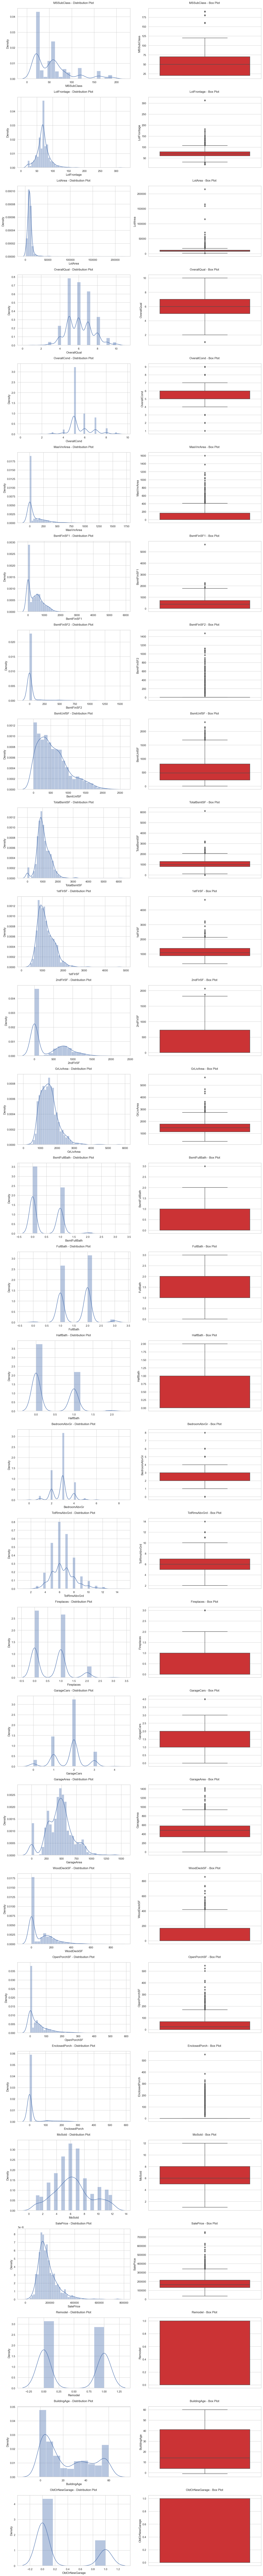

In [158]:
#checking for outliers in the numerical variables
numerical_columns = df.select_dtypes(include=['int64', 'float'])
plt.figure(figsize=(15, 150))
index=0
for col in numerical_columns:
    index=index+1
    plt.subplot(30,2,index)
    plt.title(col+" - Distribution Plot \n")
    sns.distplot(df[col])

    index=index+1
    plt.subplot(30,2,index)
    plt.title(col+" - Box Plot \n")
    sns.boxplot(y = col, palette='Set1', data = df)
plt.tight_layout()
plt.show()

In [159]:
#removing outliers in these numerical variables ie the values found above 98%

#removing values beyond 98% for MasVnrArea

outlier = ['LotFrontage','LotArea','MasVnrArea','GrLivArea']
for i in outlier:
    qnt = df[i].quantile(0.98)#removing data above 98 percentile
    df = df[df[i] < qnt]

## Performing EDA

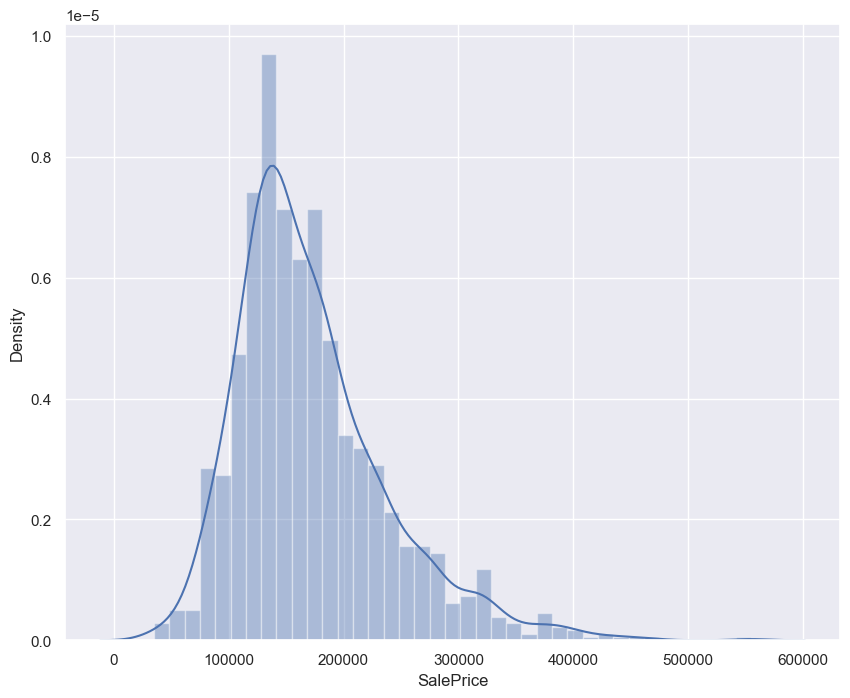

In [160]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

The target variable is right skewed

In [161]:
## Check the skewness of target variable
df['SalePrice'].skew()

1.2305154498811743

The target variable is highly skewed 

In [162]:
## Check the kurtosis of target variable
df['SalePrice'].kurt()

2.327892897595436

The distribution of the target variable is highly peaked 

In [163]:
## Log transform the target variable
df['SalePrice'] = np.log(df['SalePrice'])

In [164]:
## Check the skewness of target variable again
df['SalePrice'].skew()

-0.08988800119964087

In [165]:
## Check the kurtosis of target variable again
df['SalePrice'].kurt()

0.6973780096426814

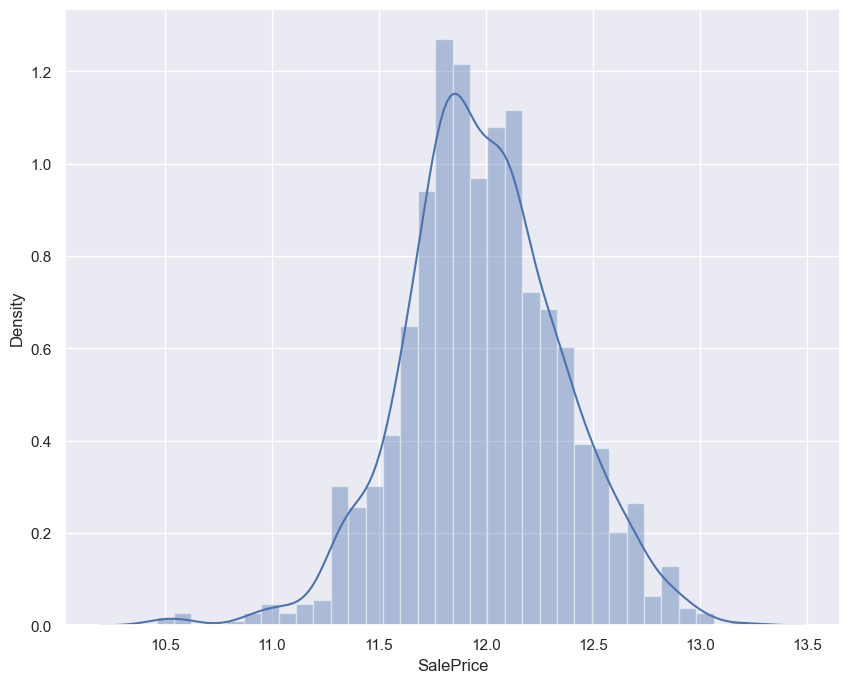

In [166]:
## Plot the spread of transformed target variable
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice']);

In [167]:
## Divide the dataframe df into numerical and categorical columns for EDA

## Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  SalePrice  Remodel  BuildingAge  OldOrNewGarage
0          60         65.0     8450            7            5       196.0         706           0        150          856       856       854       1710             1         2         1             3             8           0           2         548           0           61              0       2  12.247694        0            5               1
1          20         80.0     9600            6            8         0.0         978           0        284         1262      1262         0       1262             0         2         0             3             6           1           2         460         298            0              0       5  12.109011        0           31               0
2          60         68.0    11250            7            5       162.0         486           0        434          920       920       866       1786             1         2         1             3             6           1           2         608           0           42              0       9  12.317167        1            6               1
3          70         60.0     9550            7            5         0.0         216           0        540          756       961       756       1717             1         1         0             3             7           1           3         642           0           35            272       2  11.849398        1           36               0
4          60         84.0    14260            8            5       350.0         655           0        490         1145      1145      1053       2198             1         2         1             4             9           1           3         836         192           84              0      12  12.429216        0            8               1

In [168]:
## Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

MSZoning LotShape LandContour LotConfig Neighborhood Condition1 BldgType HouseStyle RoofStyle Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 HeatingQC KitchenQual GarageType GarageFinish GarageQual SaleType SaleCondition
0       RL      Reg         Lvl    Inside      CollgCr       Norm     1Fam     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf        Ex          Gd     Attchd          RFn         TA       WD        Normal
1       RL      Reg         Lvl       FR2      Veenker      Feedr     1Fam     1Story     Gable     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf        Ex          TA     Attchd          RFn         TA       WD        Normal
2       RL      IR1         Lvl    Inside      CollgCr       Norm     1Fam     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf        Ex          Gd     Attchd          RFn         TA       WD        Normal
3       RL      IR1         Lvl    Corner      Crawfor       Norm     1Fam     2Story     Gable     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf        Gd          Gd     Detchd          Unf         TA       WD       Abnorml
4       RL      IR1         Lvl       FR2      NoRidge       Norm     1Fam     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf        Ex          Gd     Attchd          RFn         TA       WD        Normal

### Visualizing Numerical columns

<Figure size 1000x500 with 0 Axes>

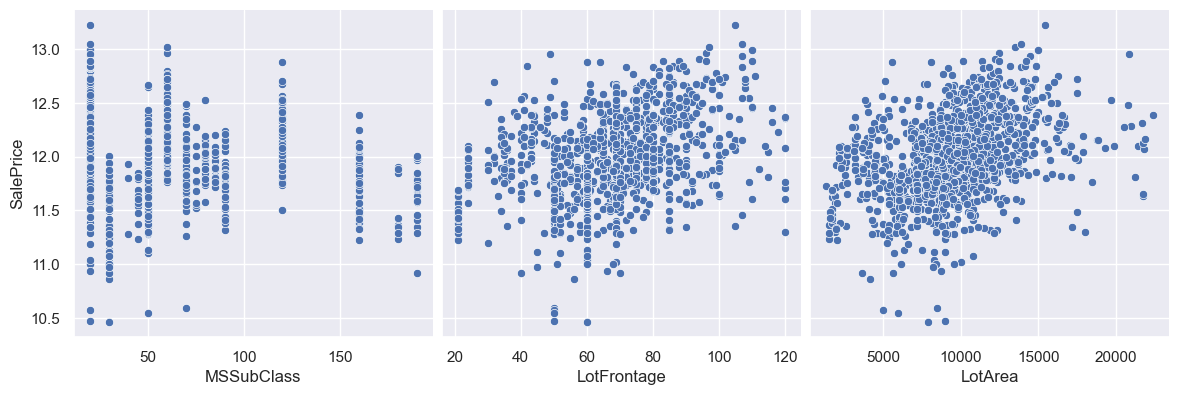

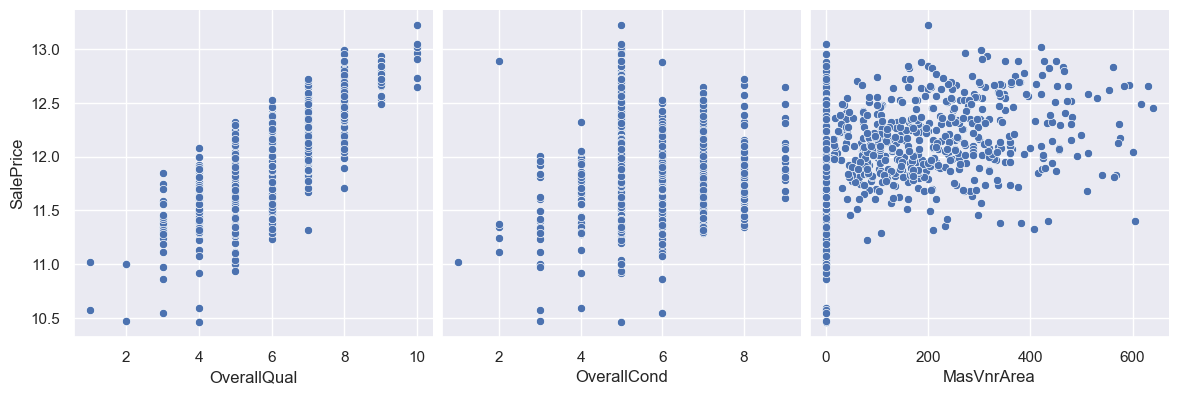

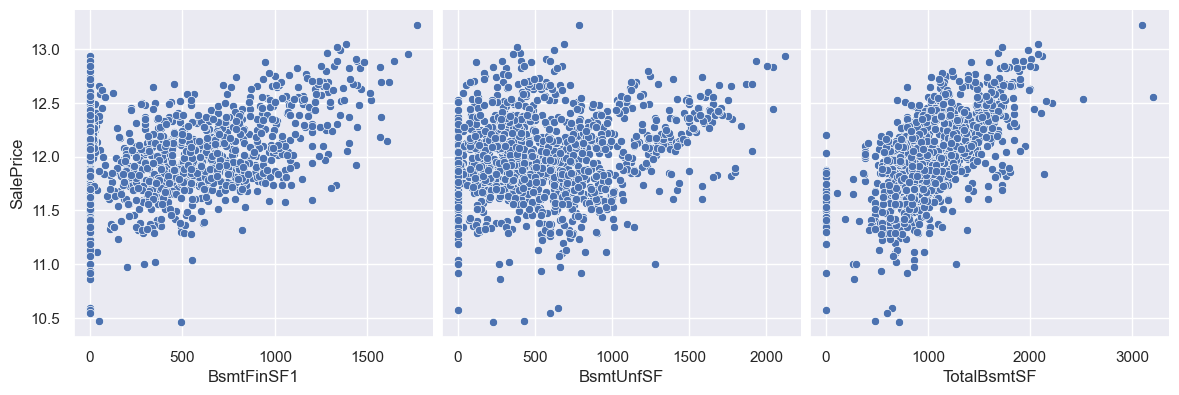

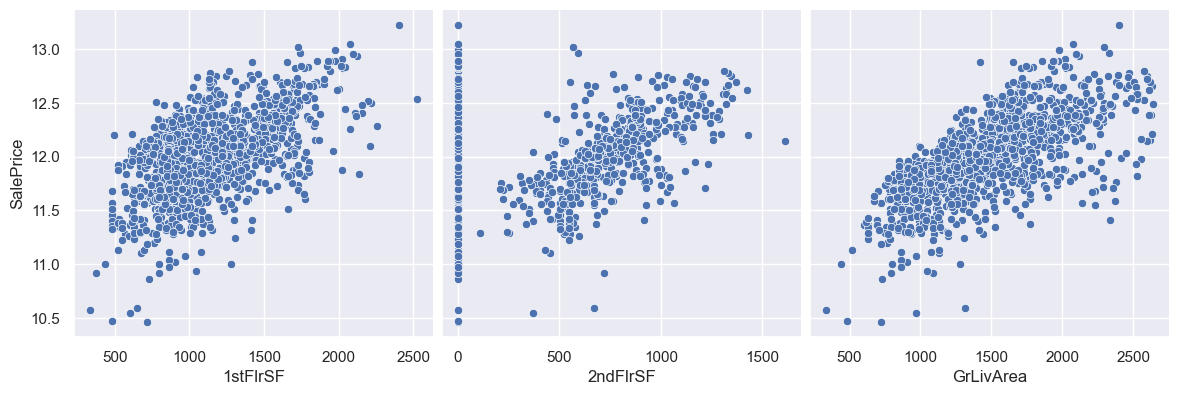

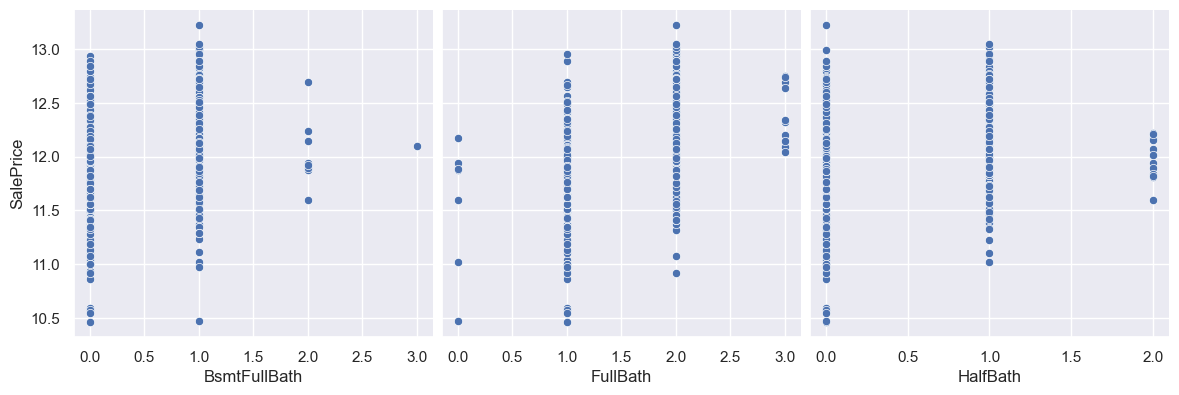

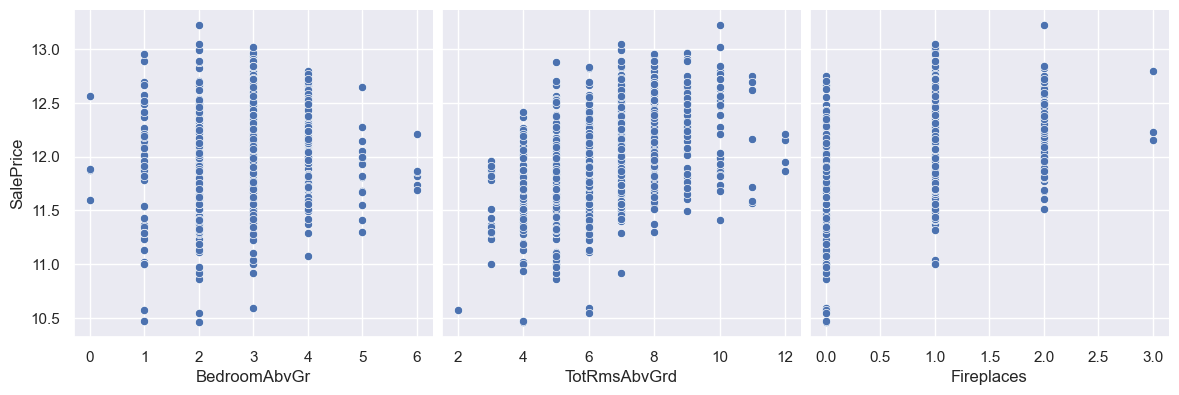

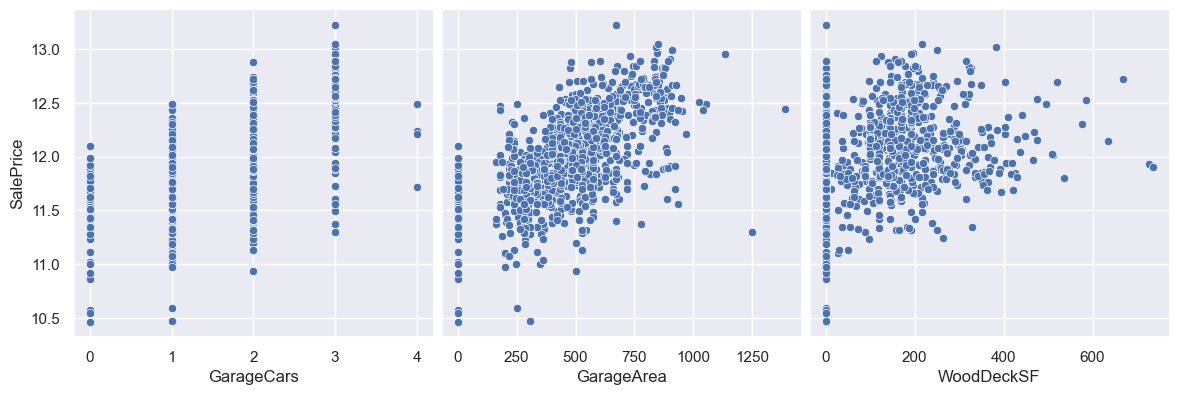

In [169]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

1stFlrSF, GrLivArea seems to be showing correlation towards right - Rest of the variables are too scattered and hence can be understood during further analysis

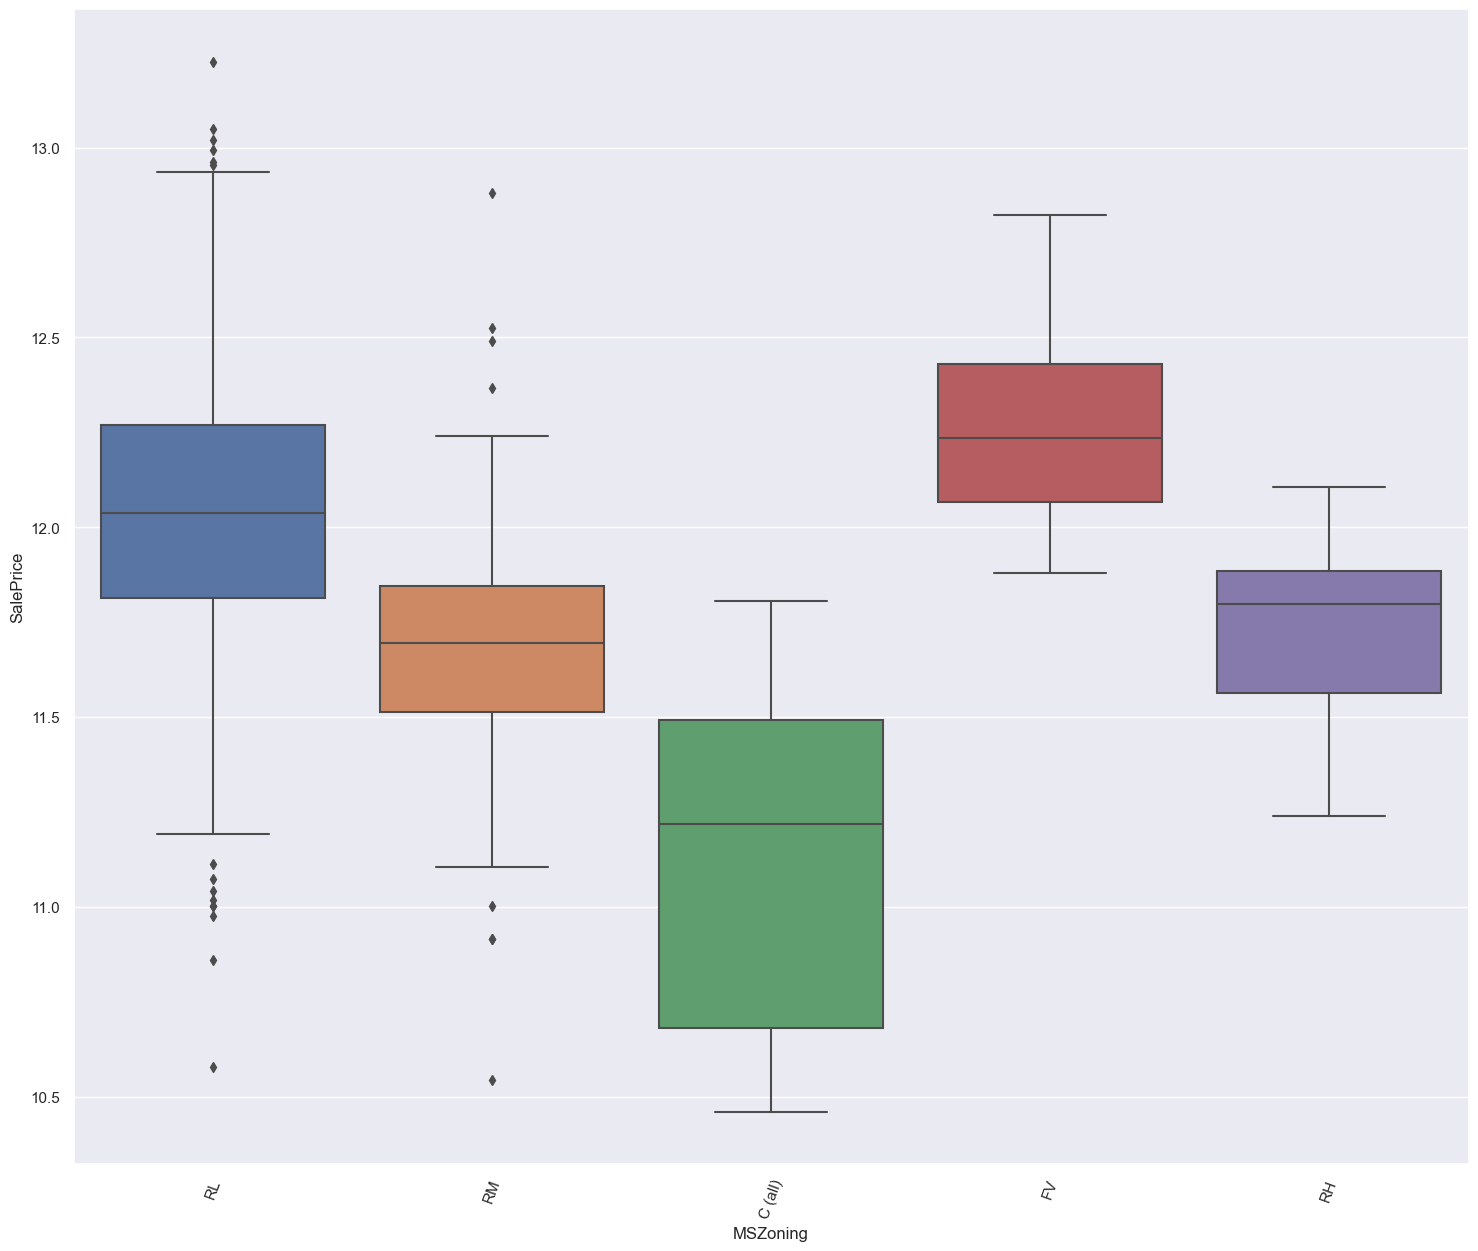

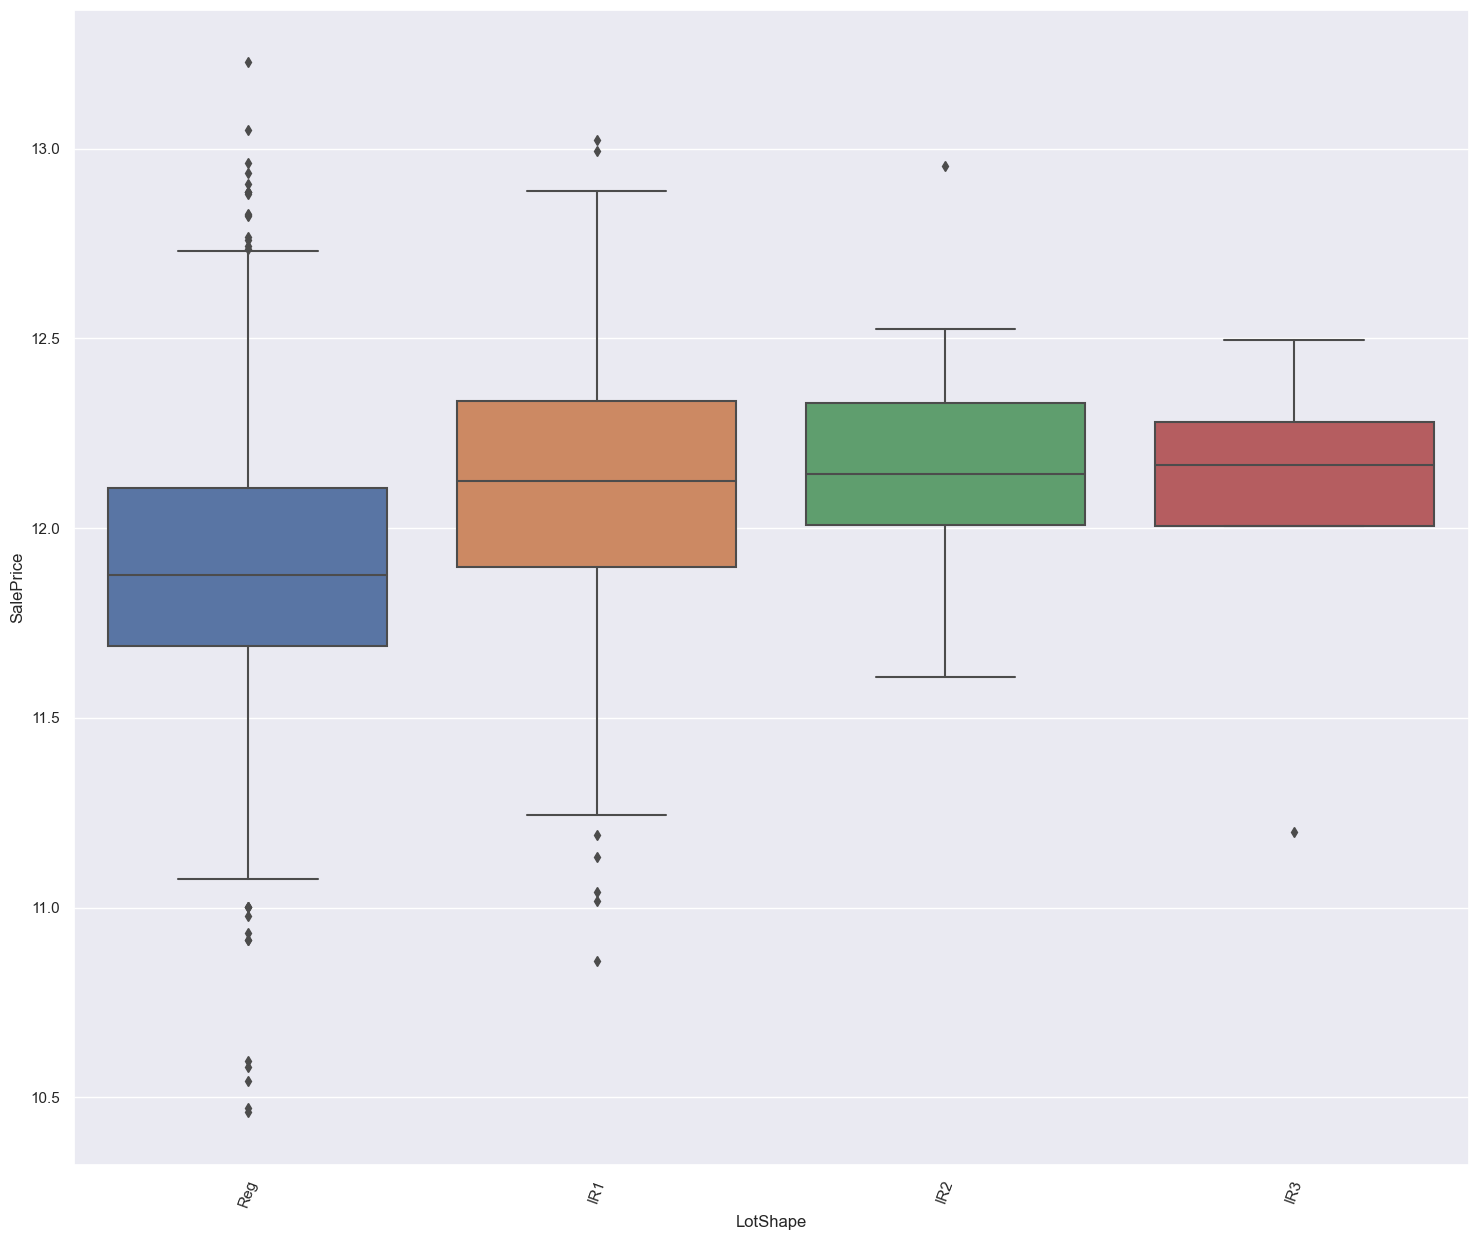

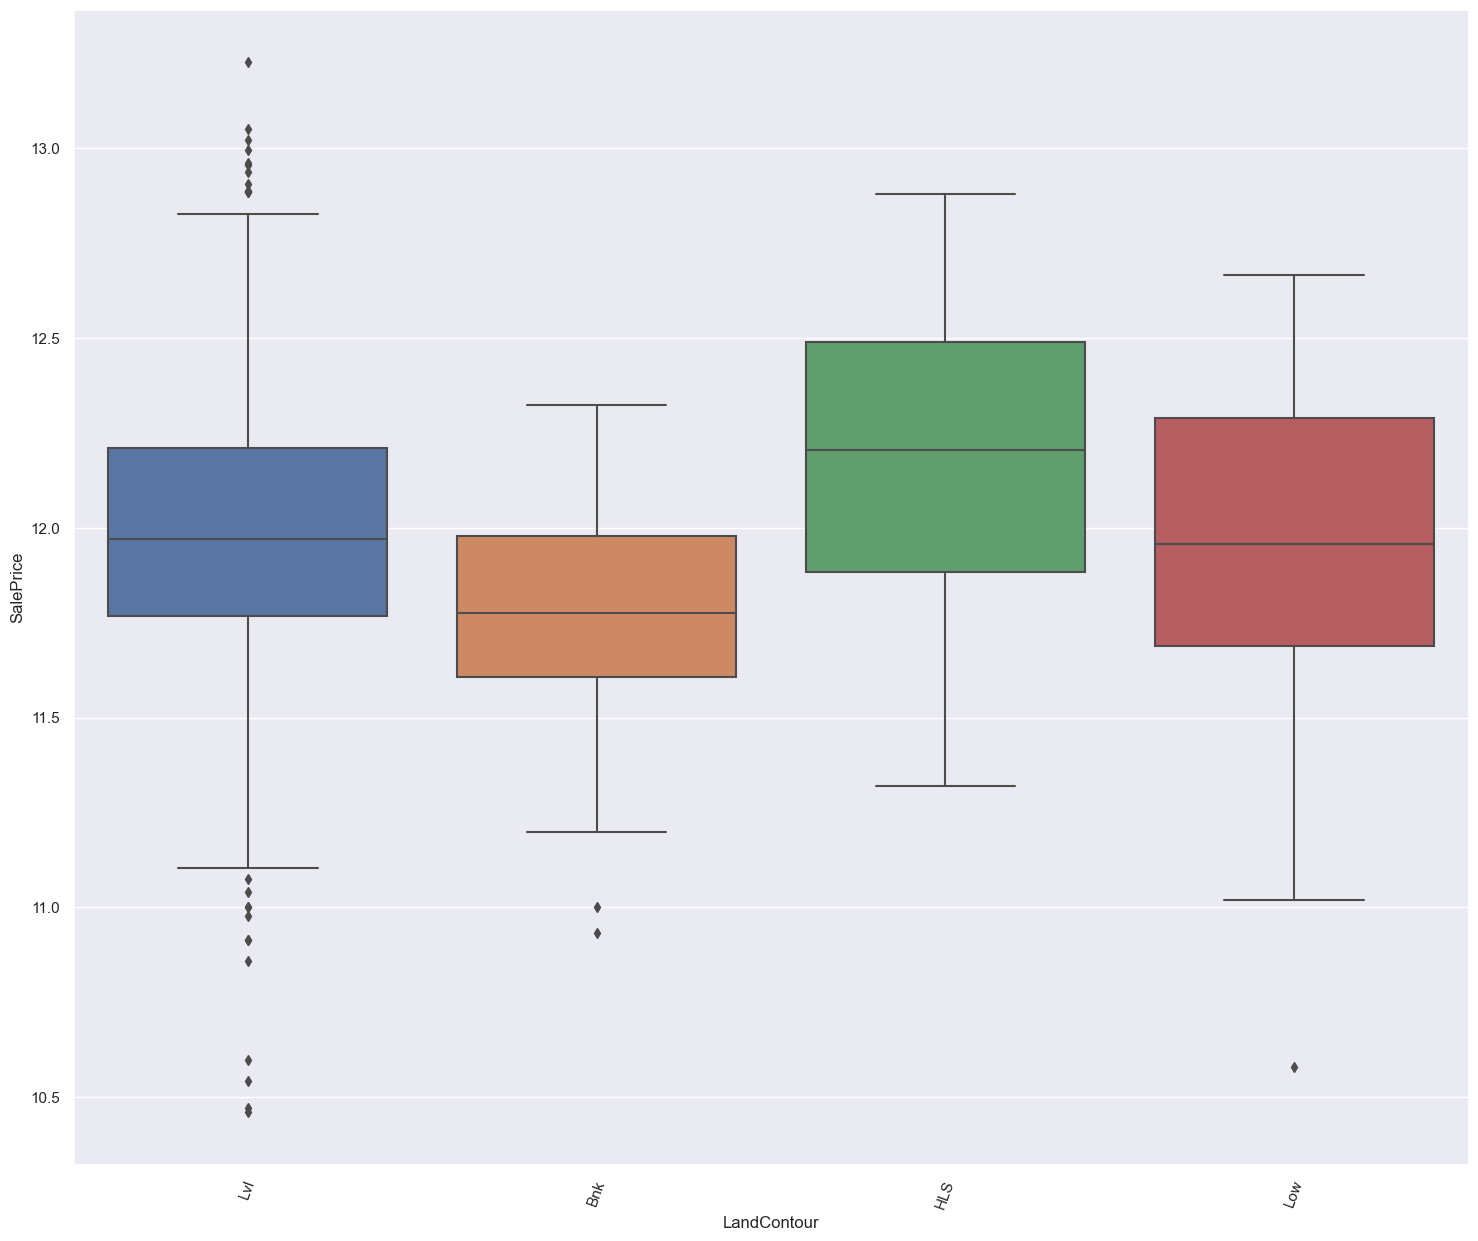

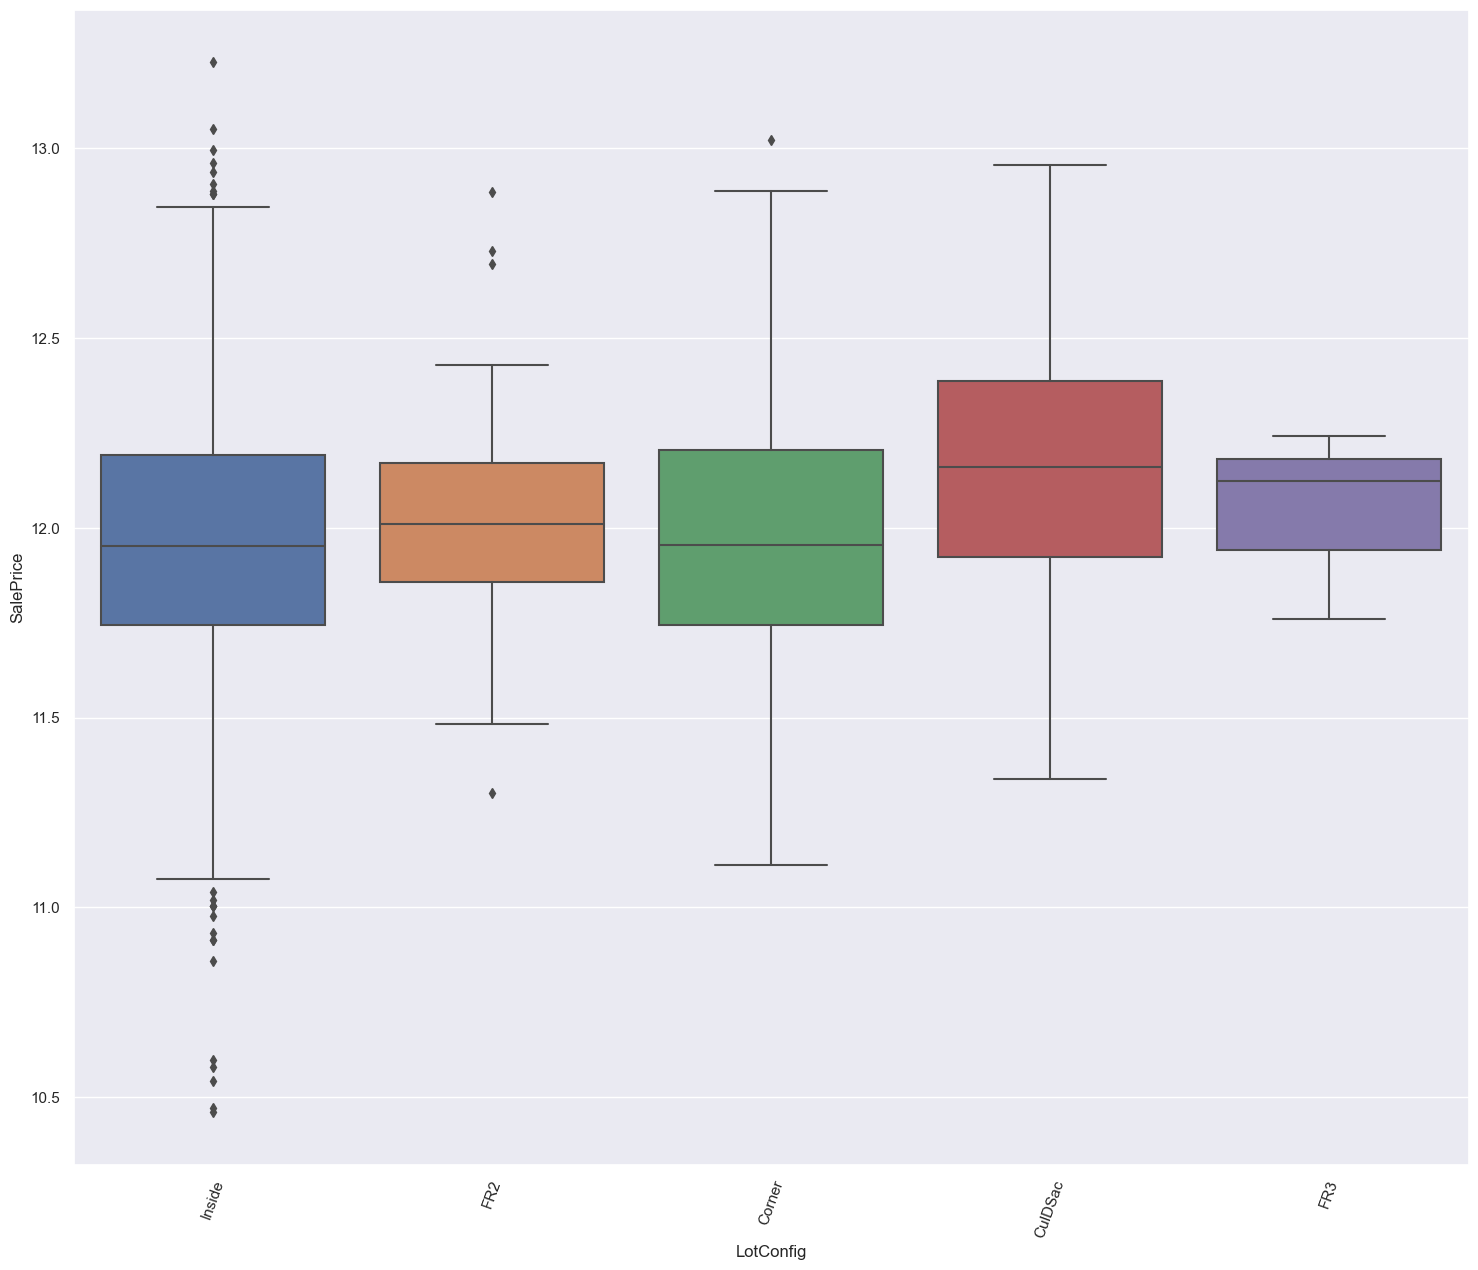

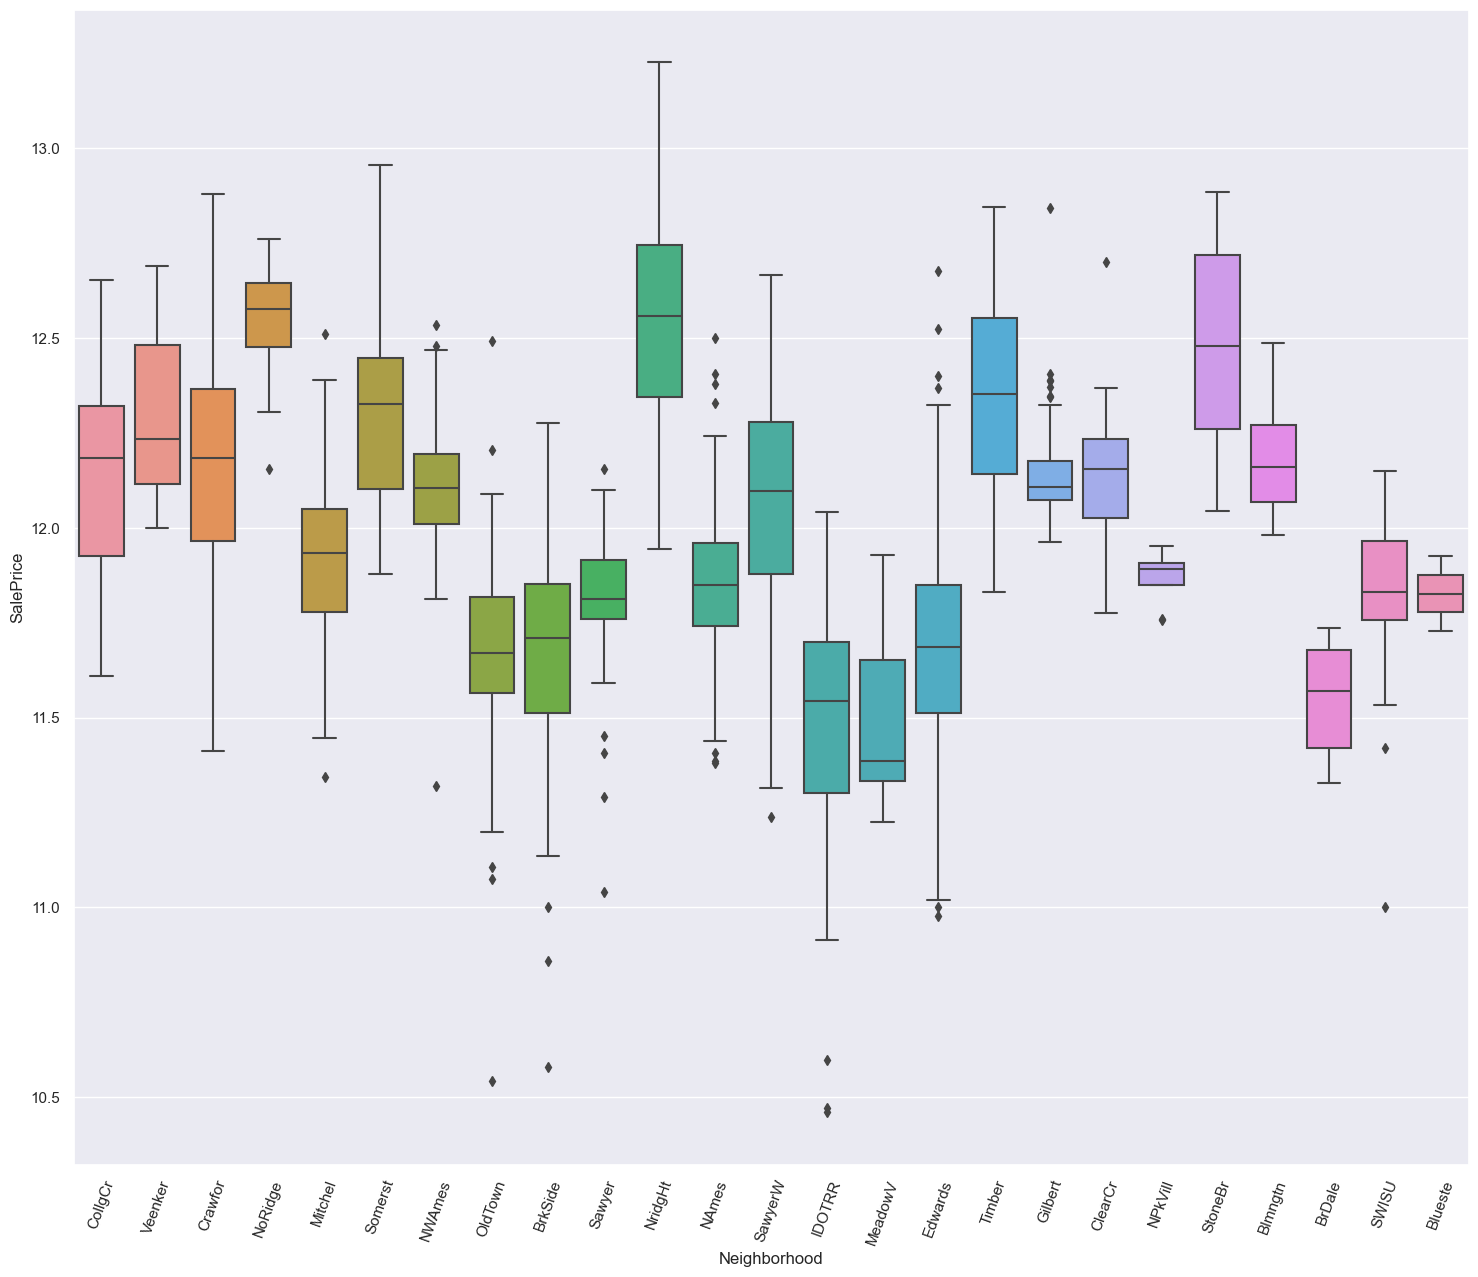

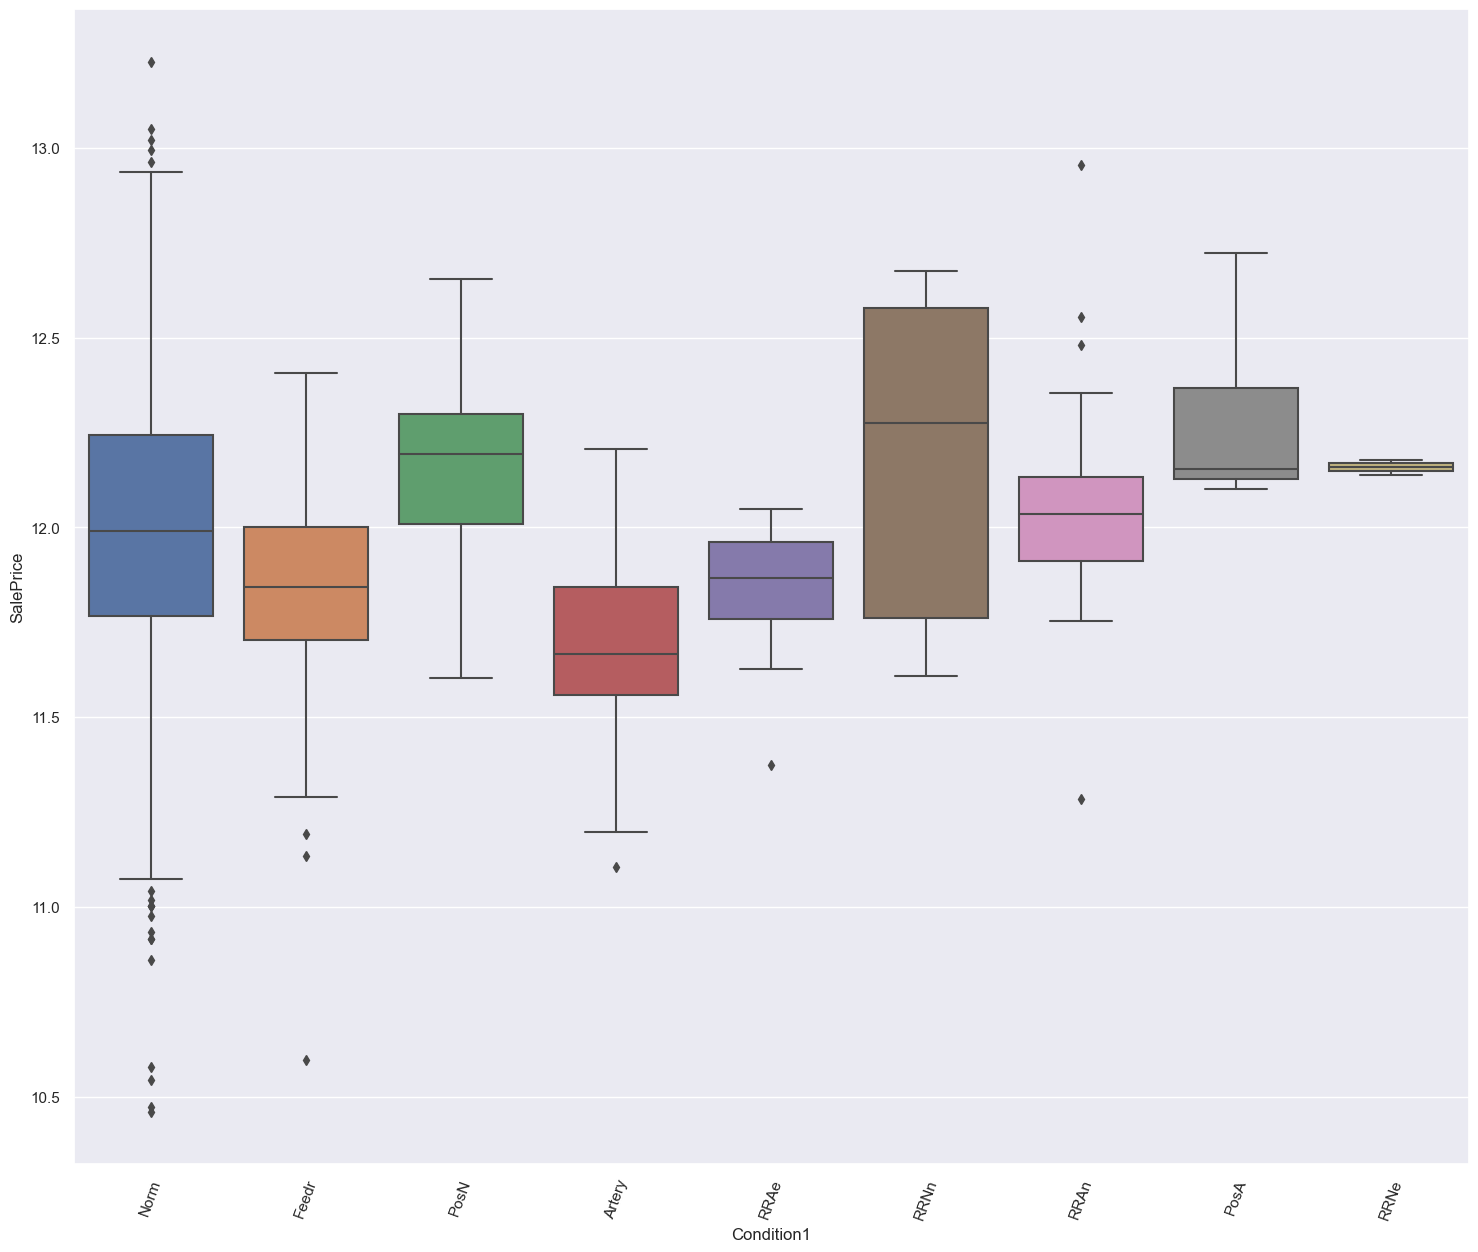

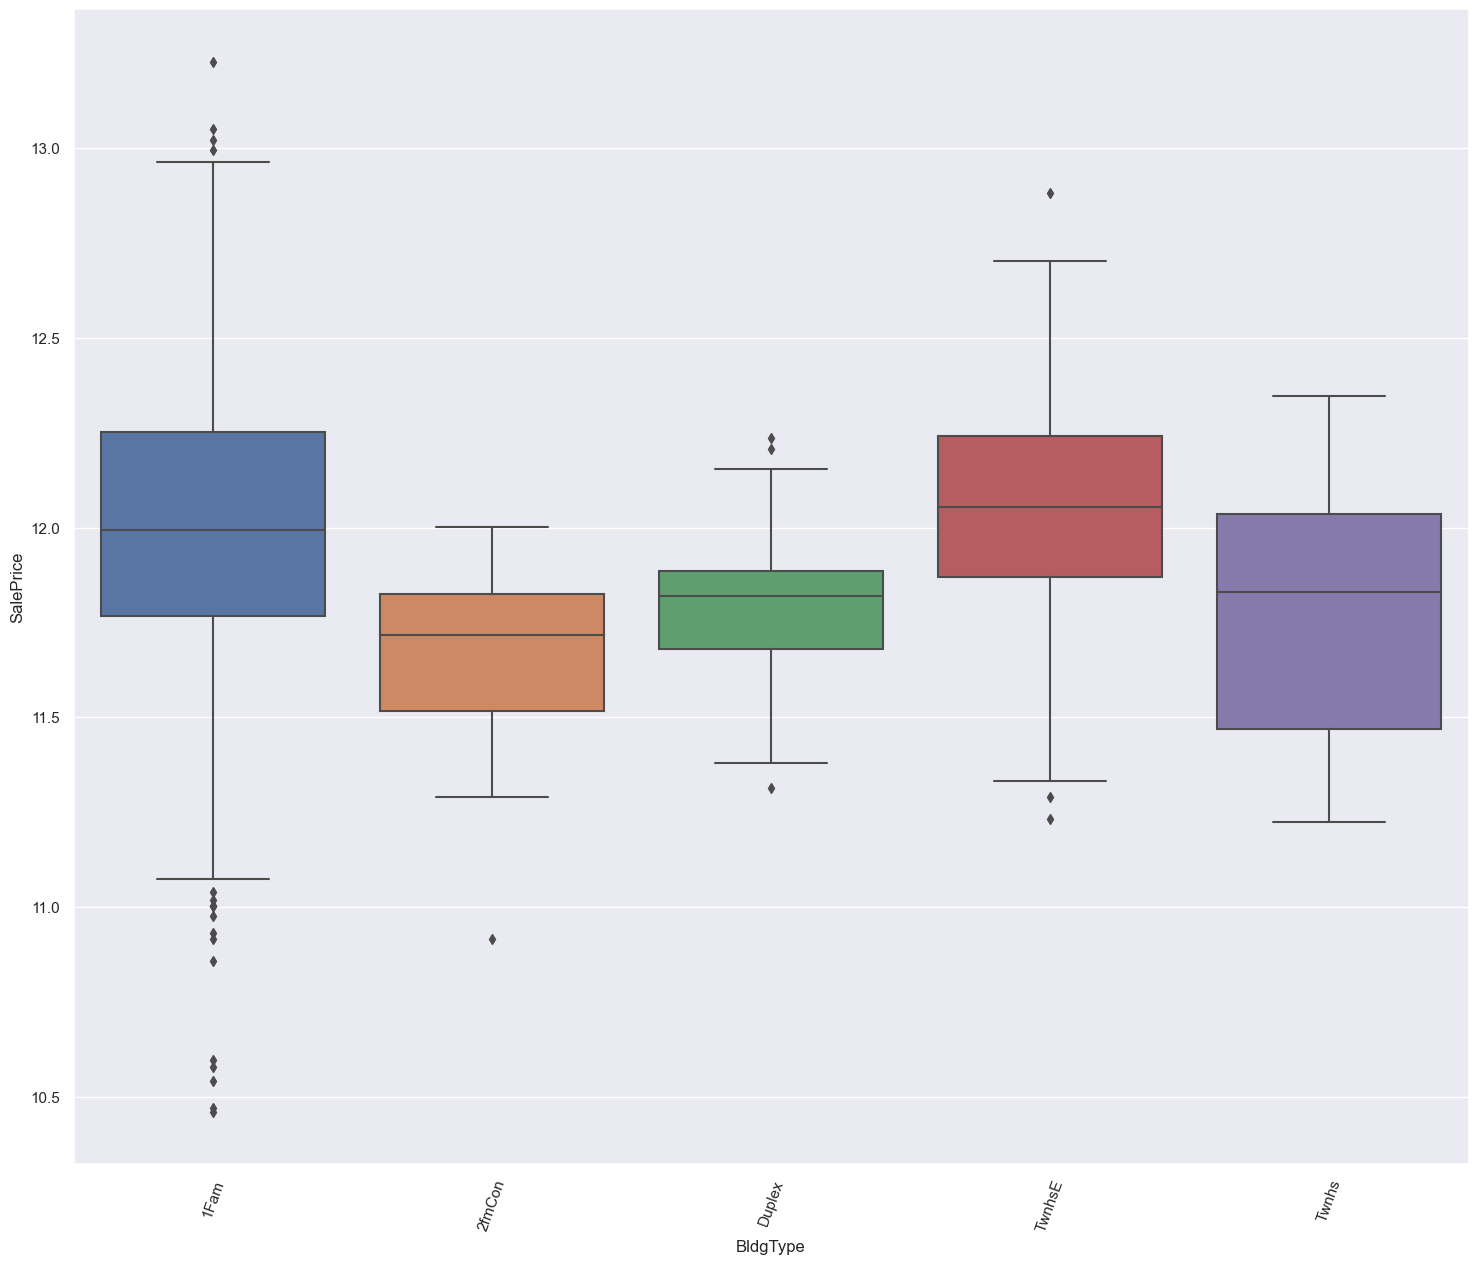

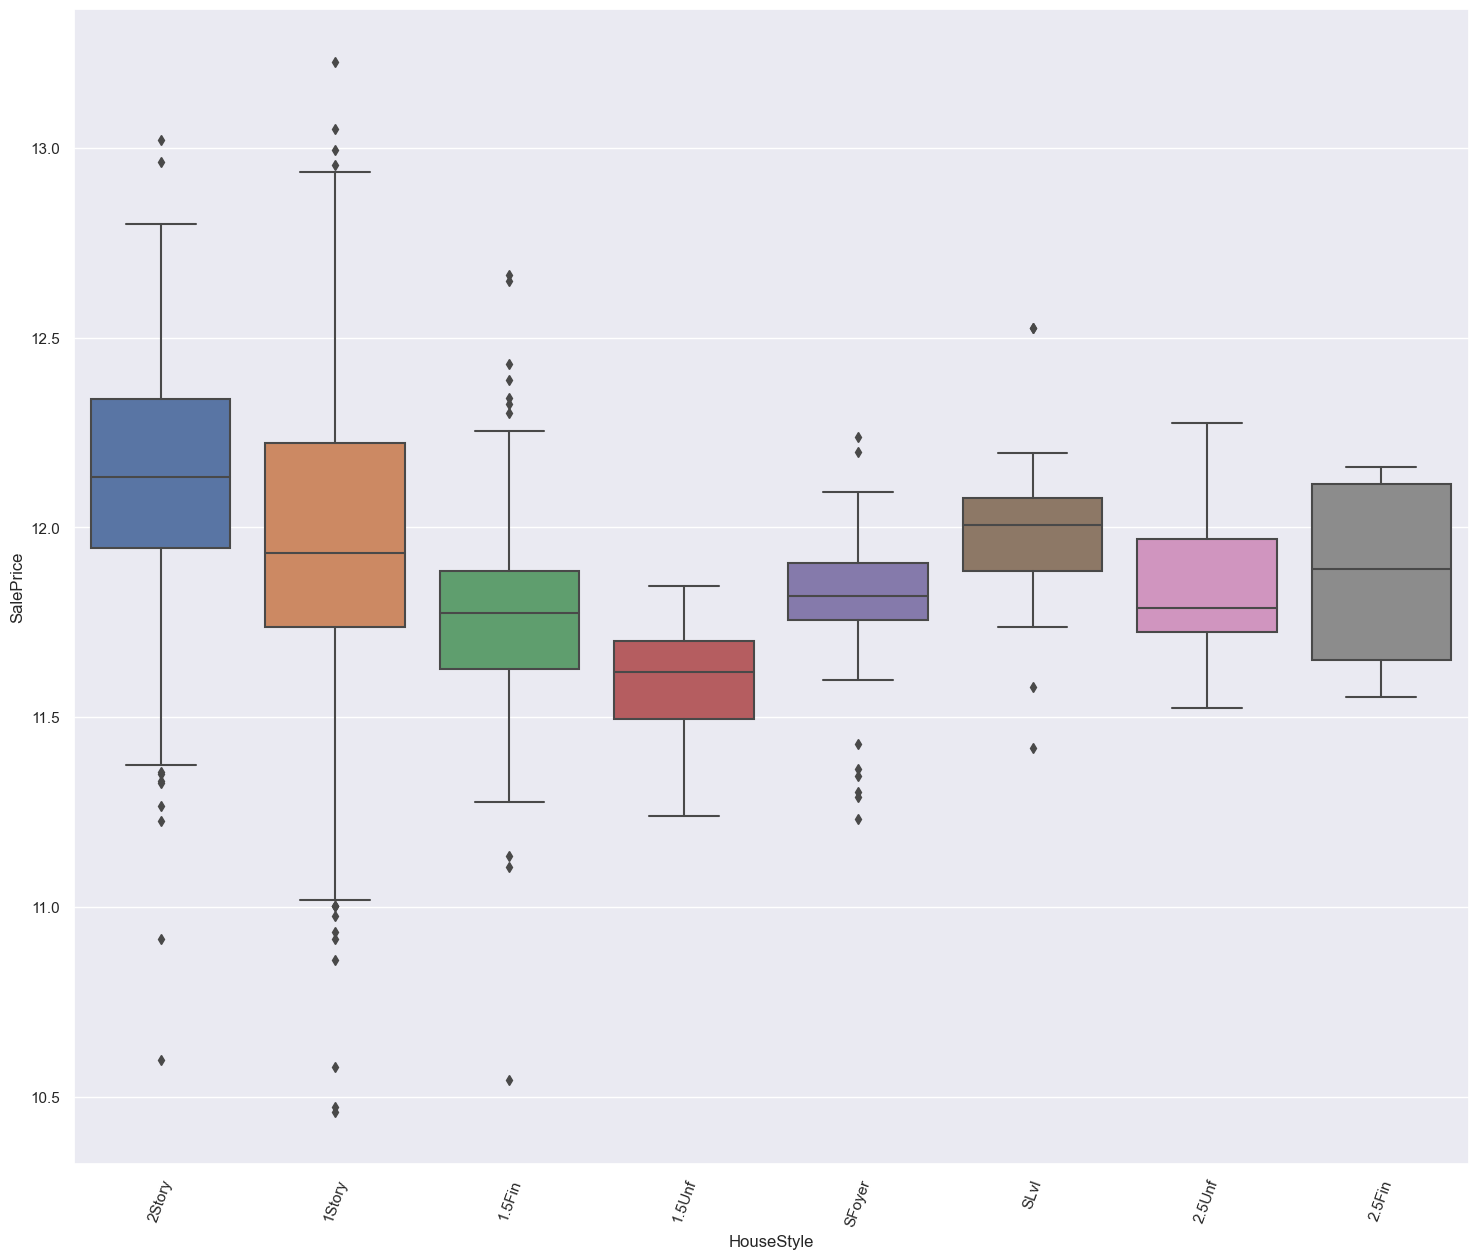

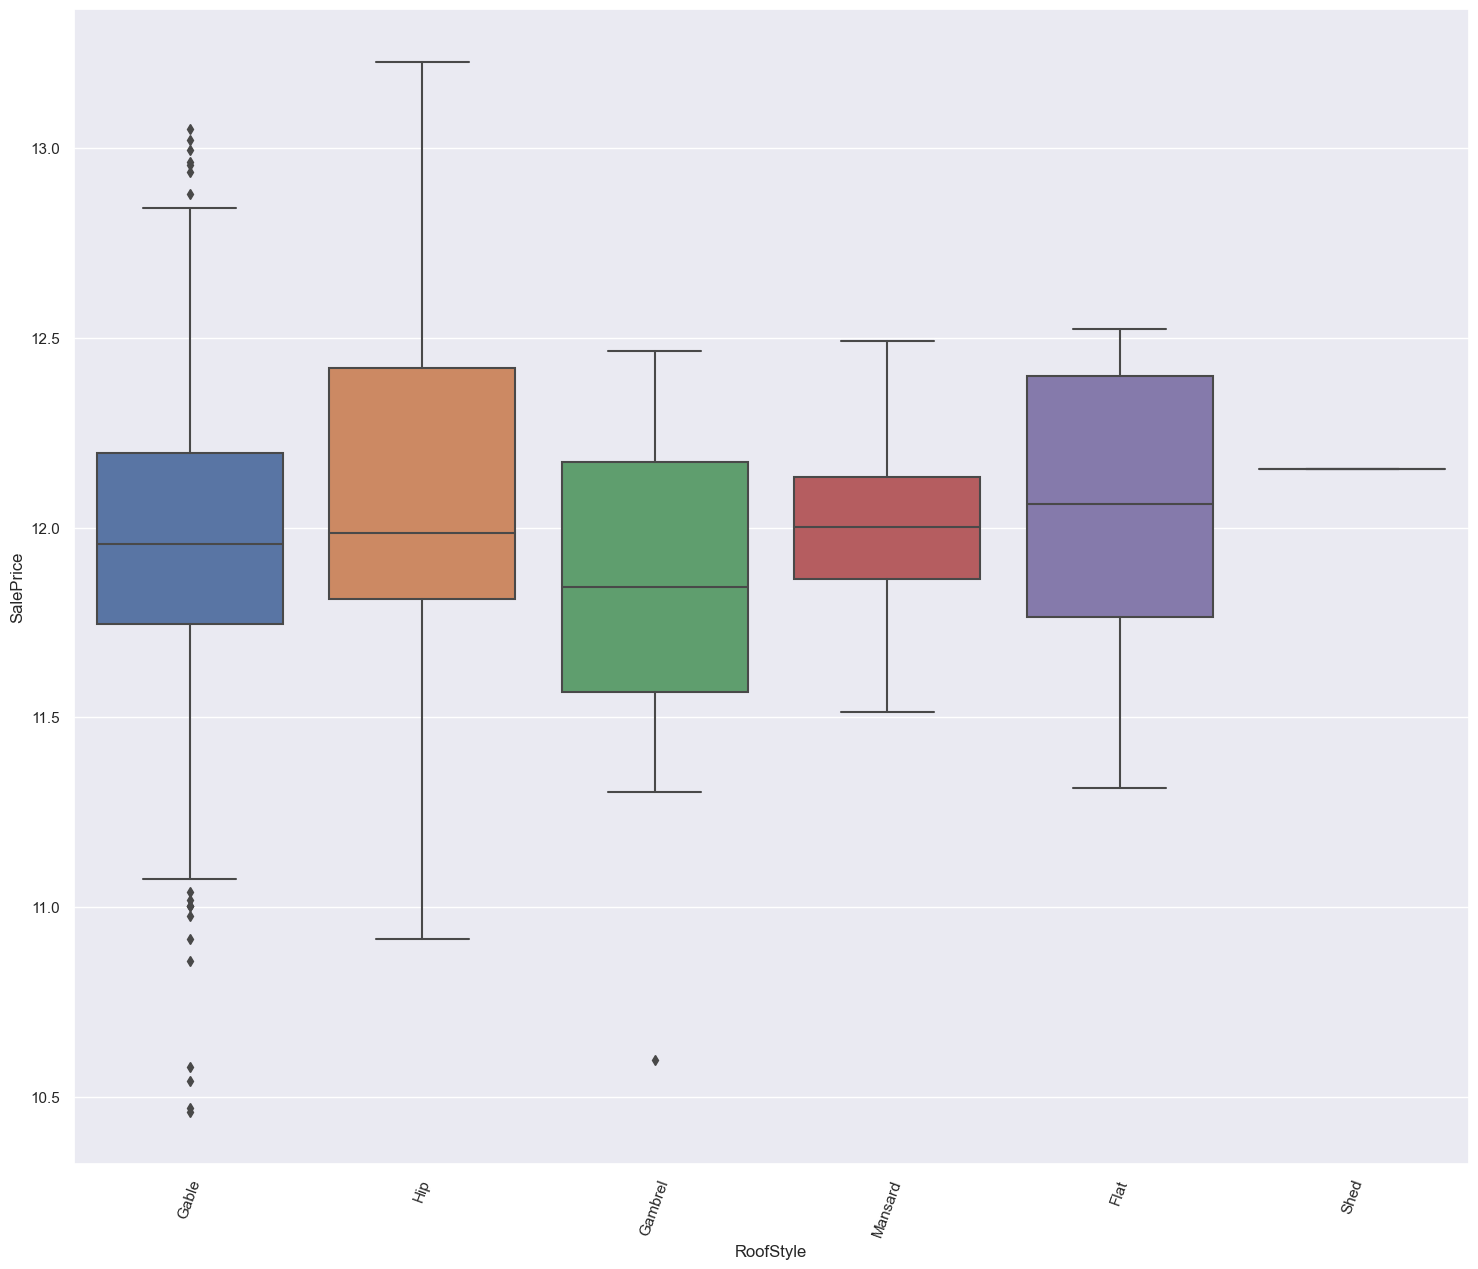

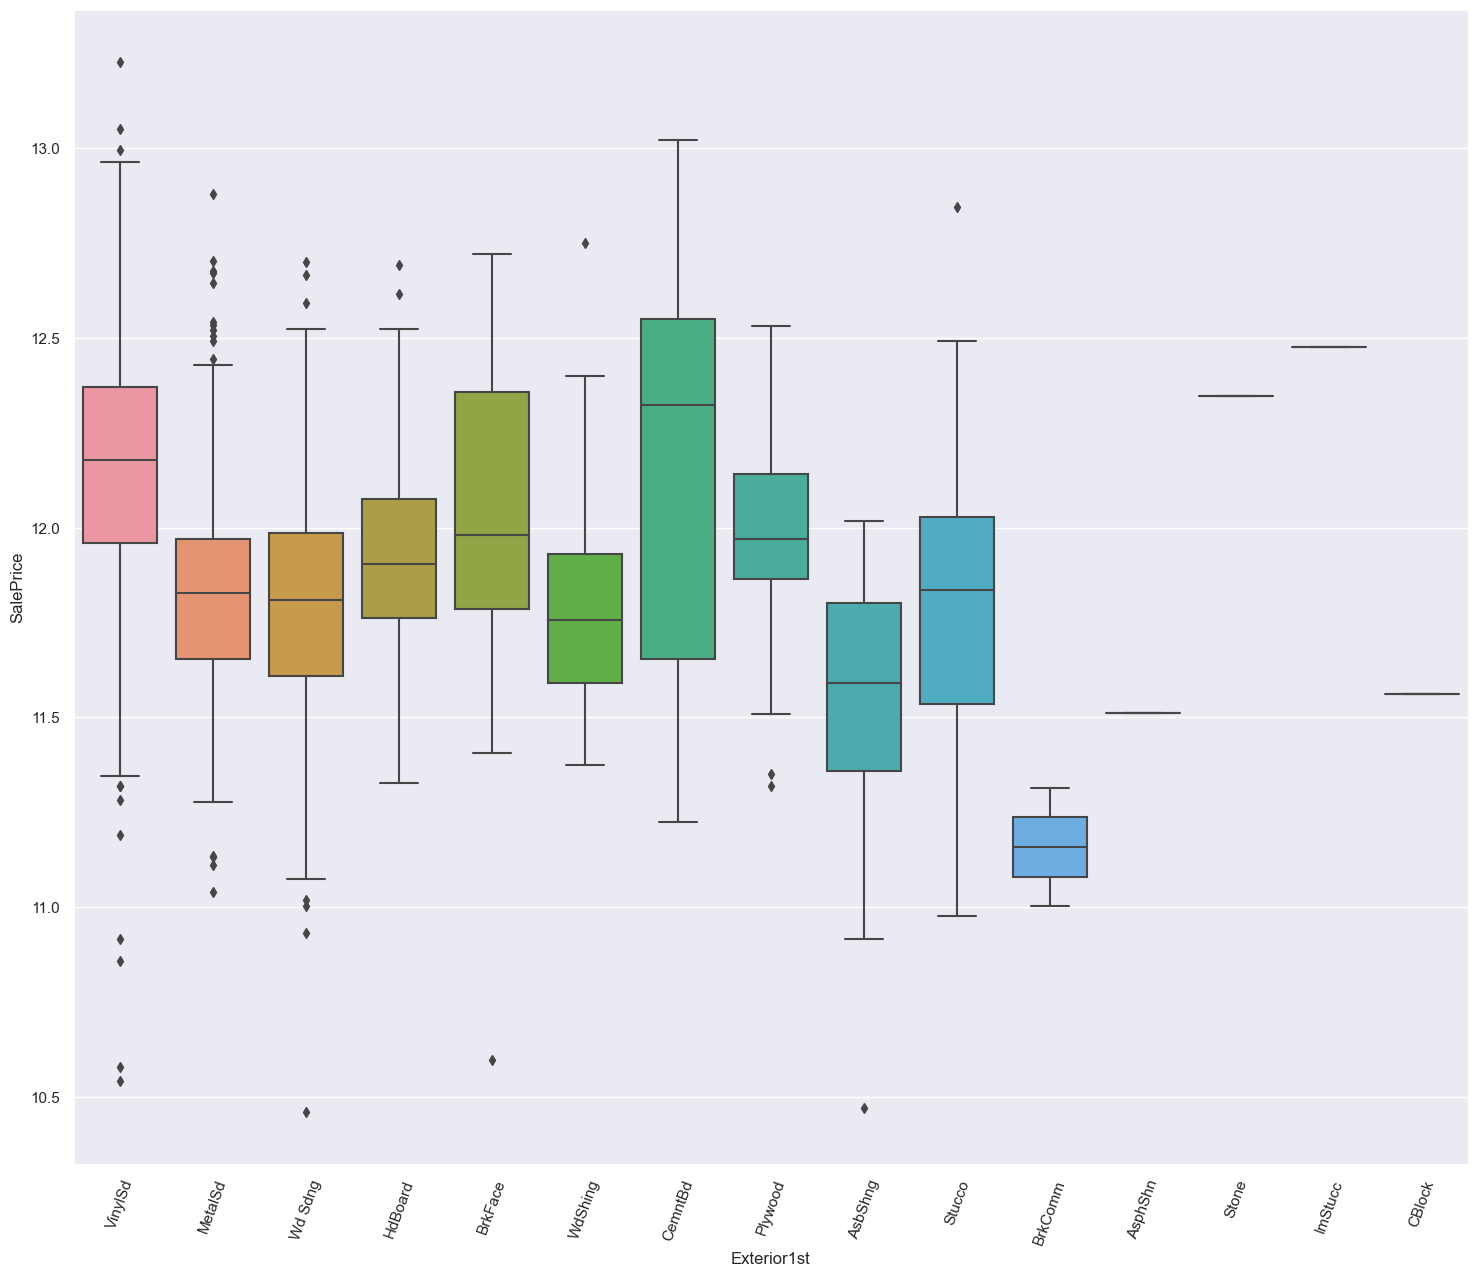

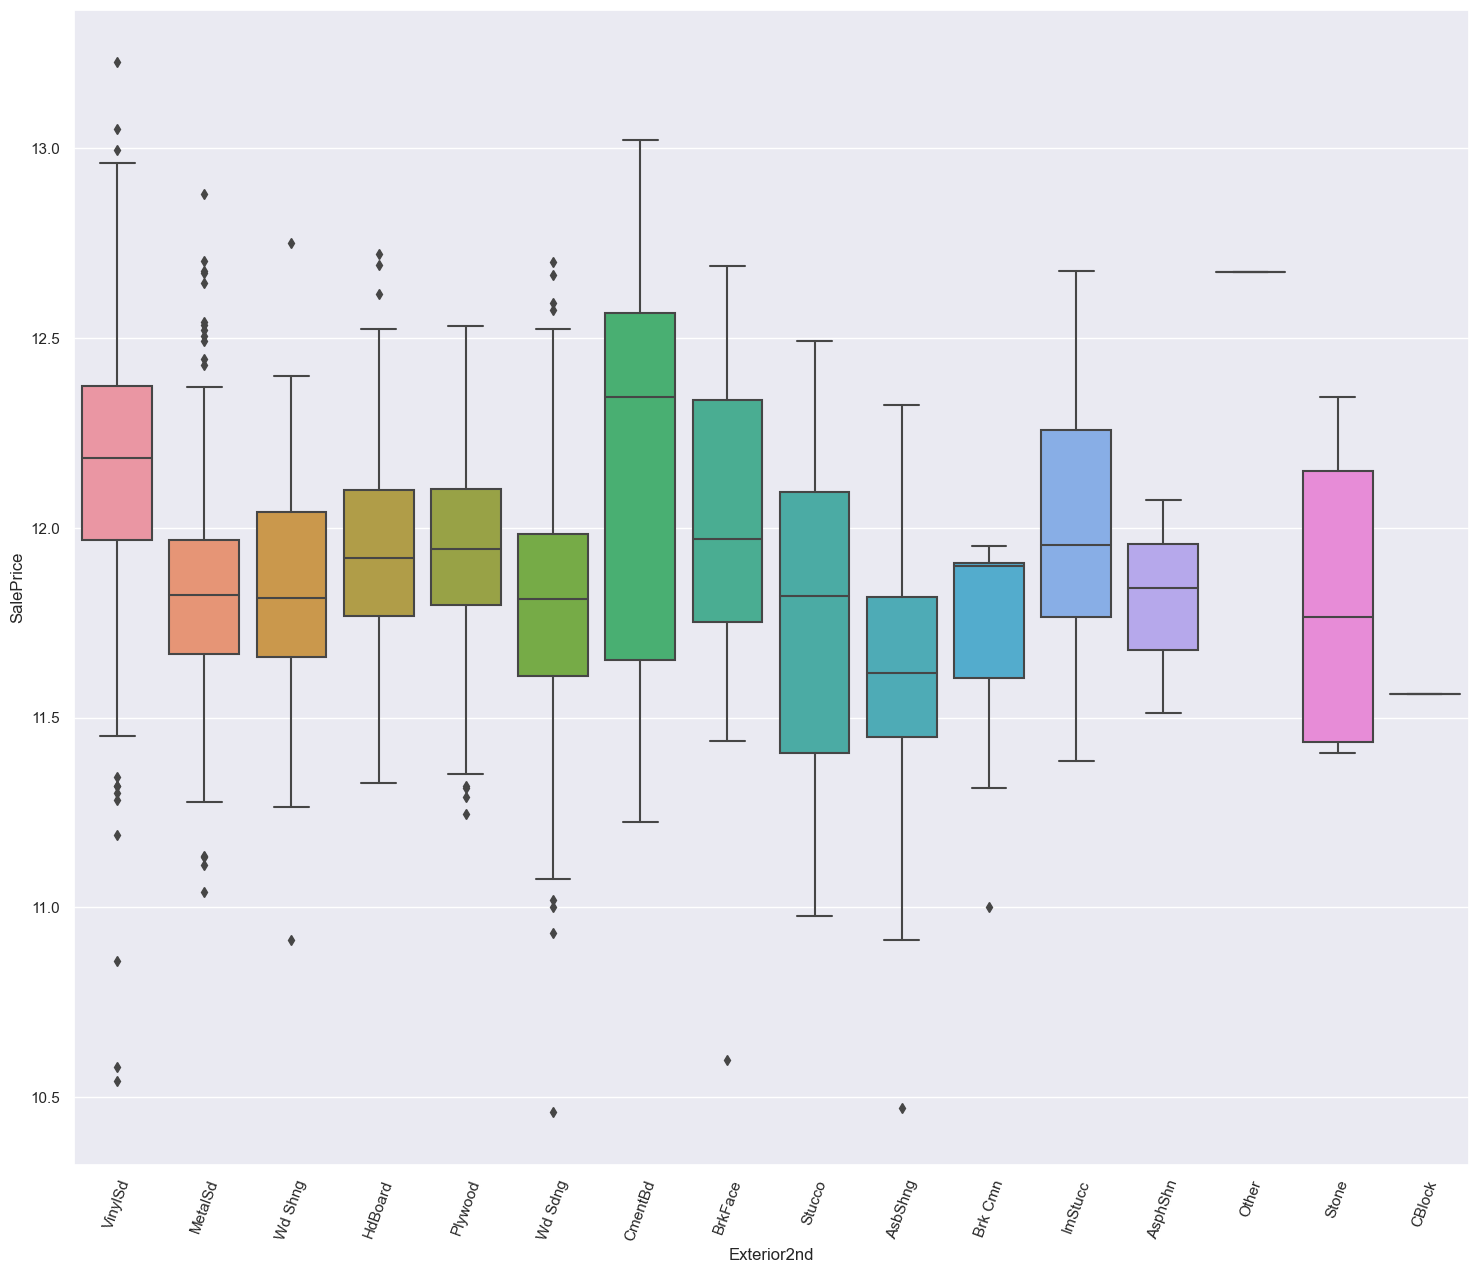

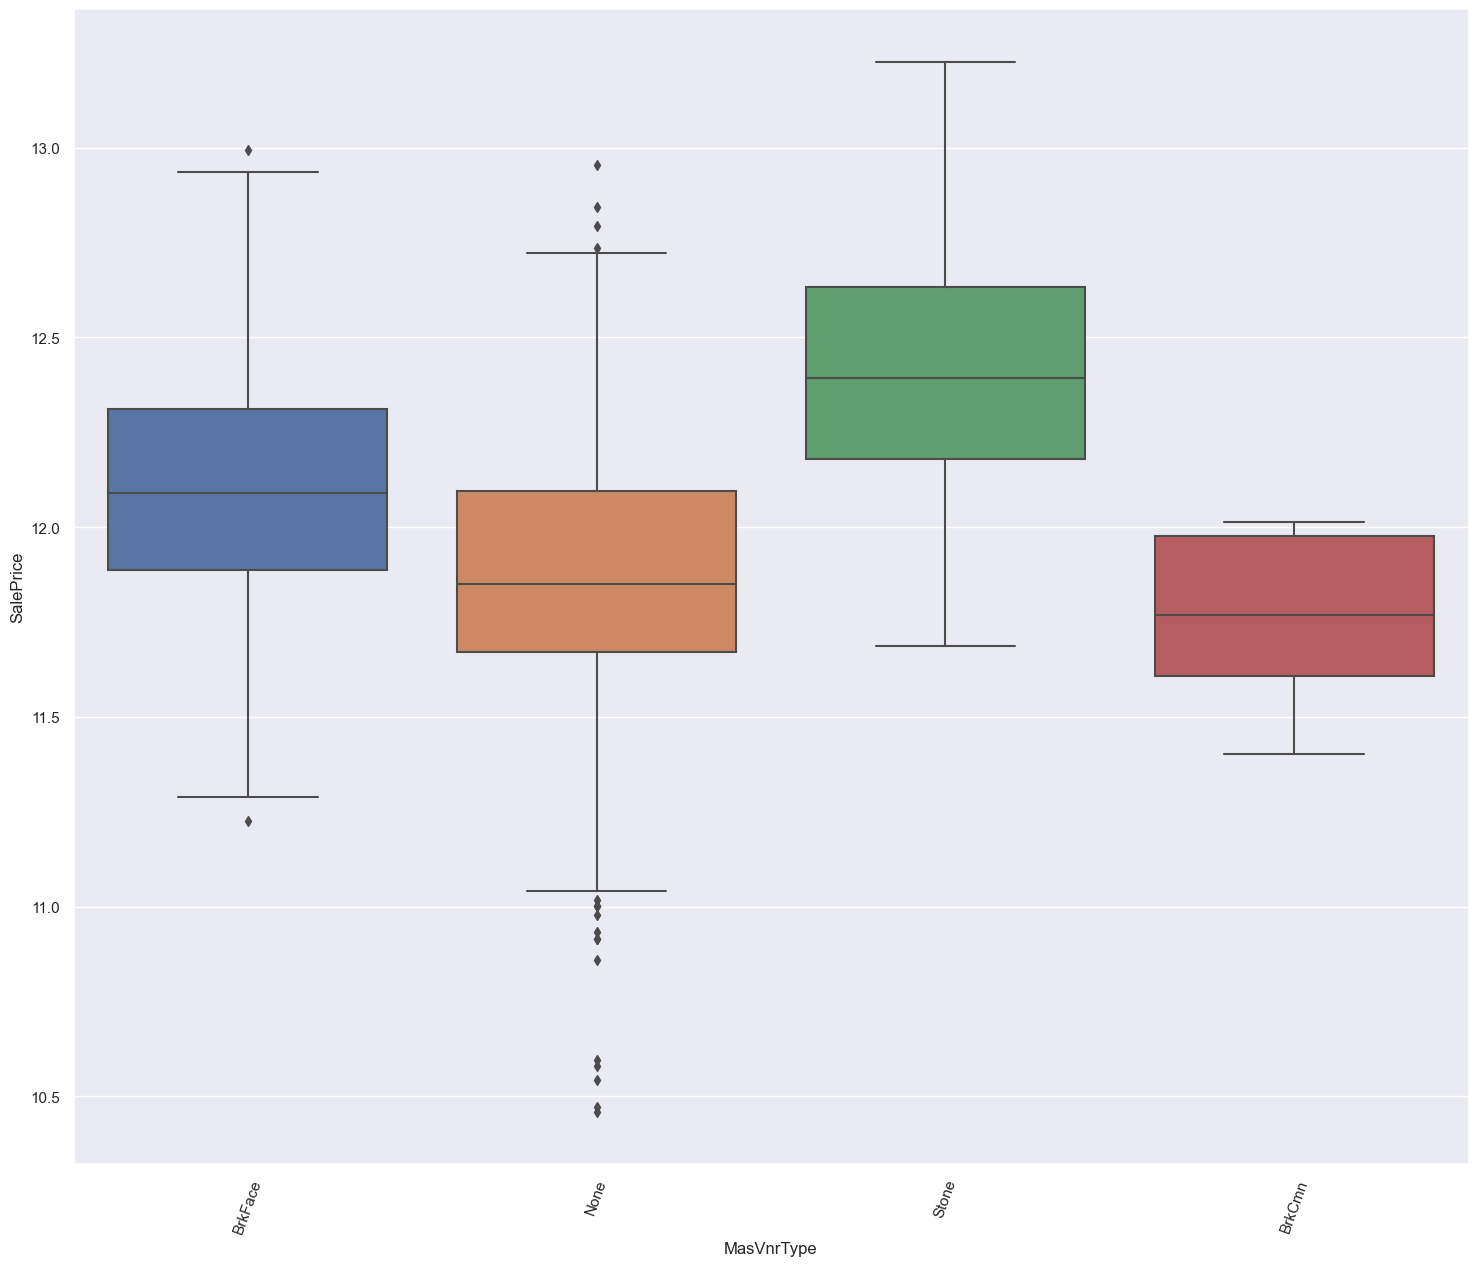

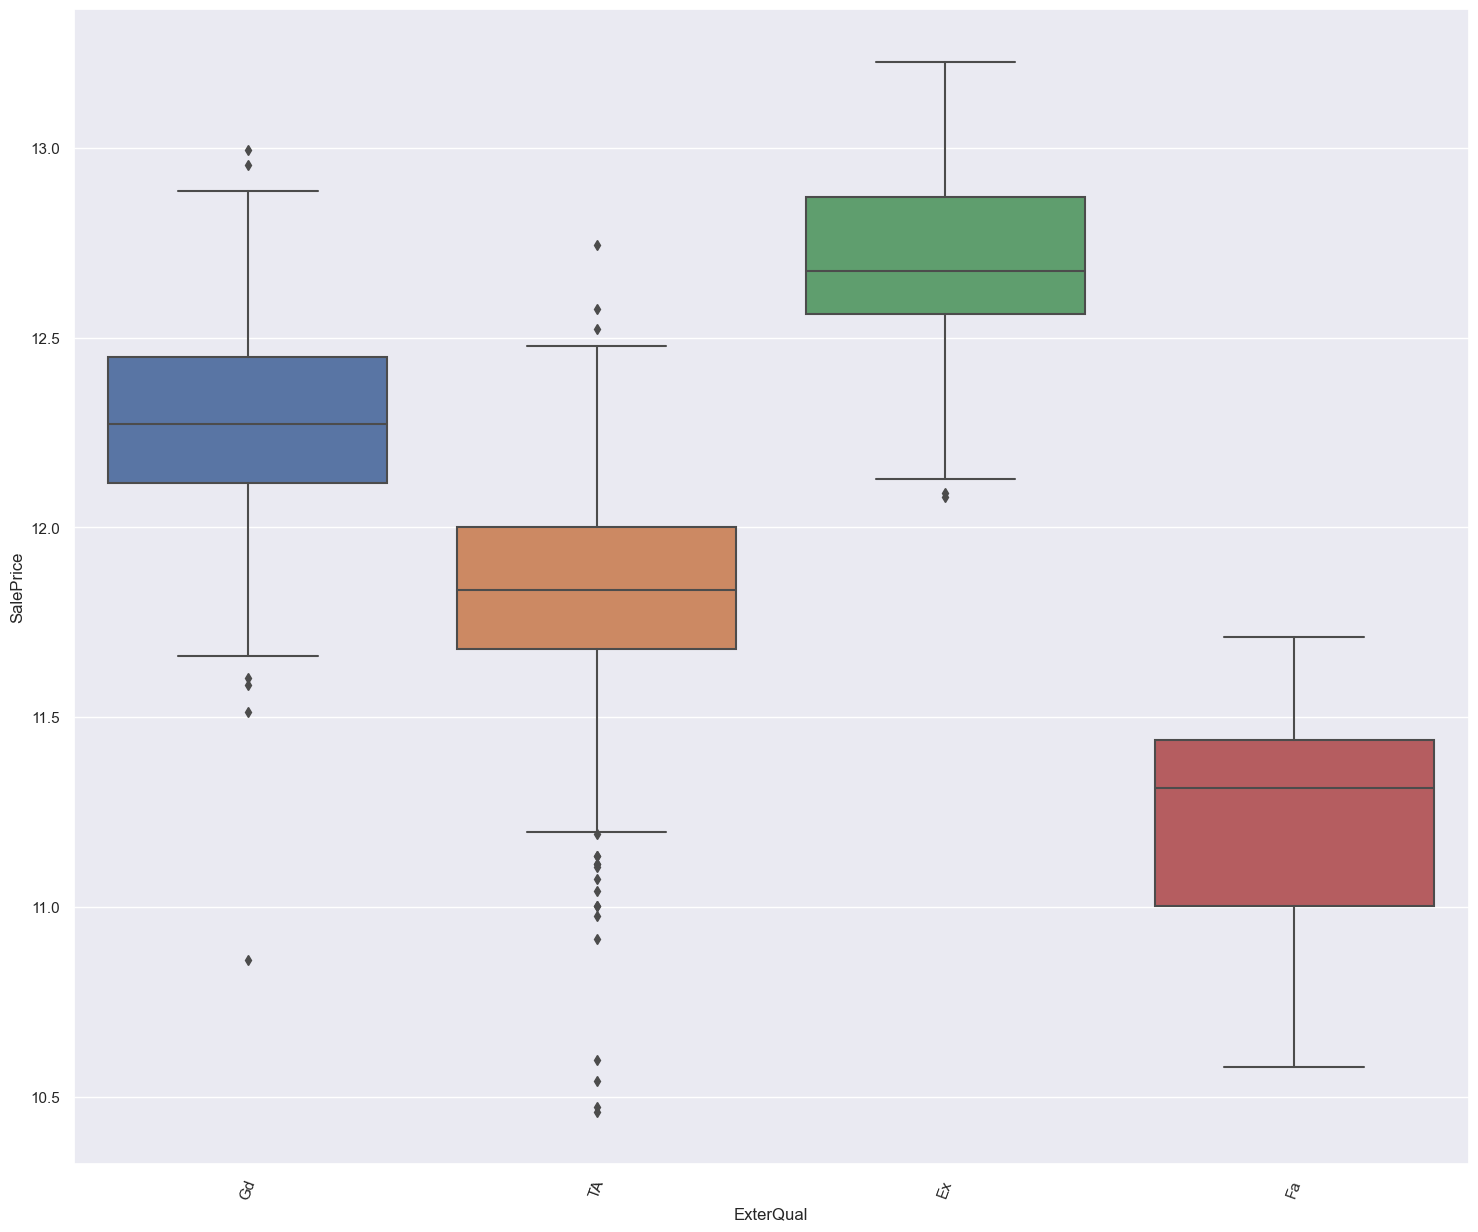

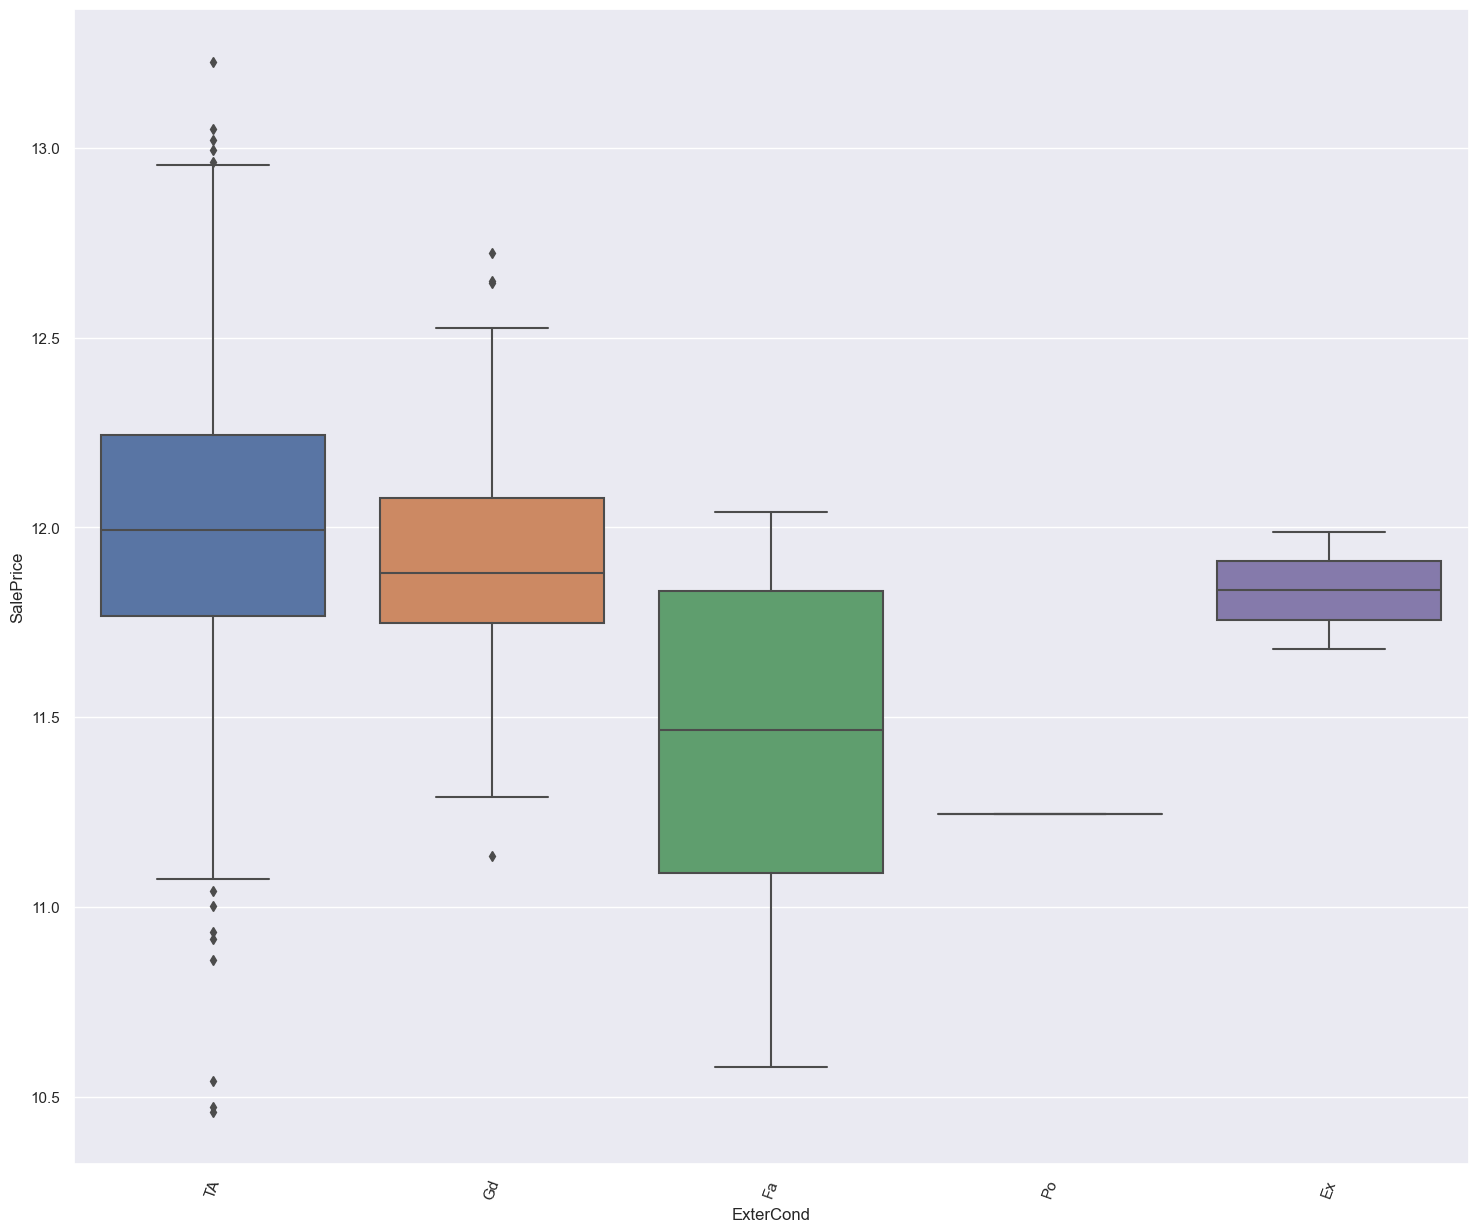

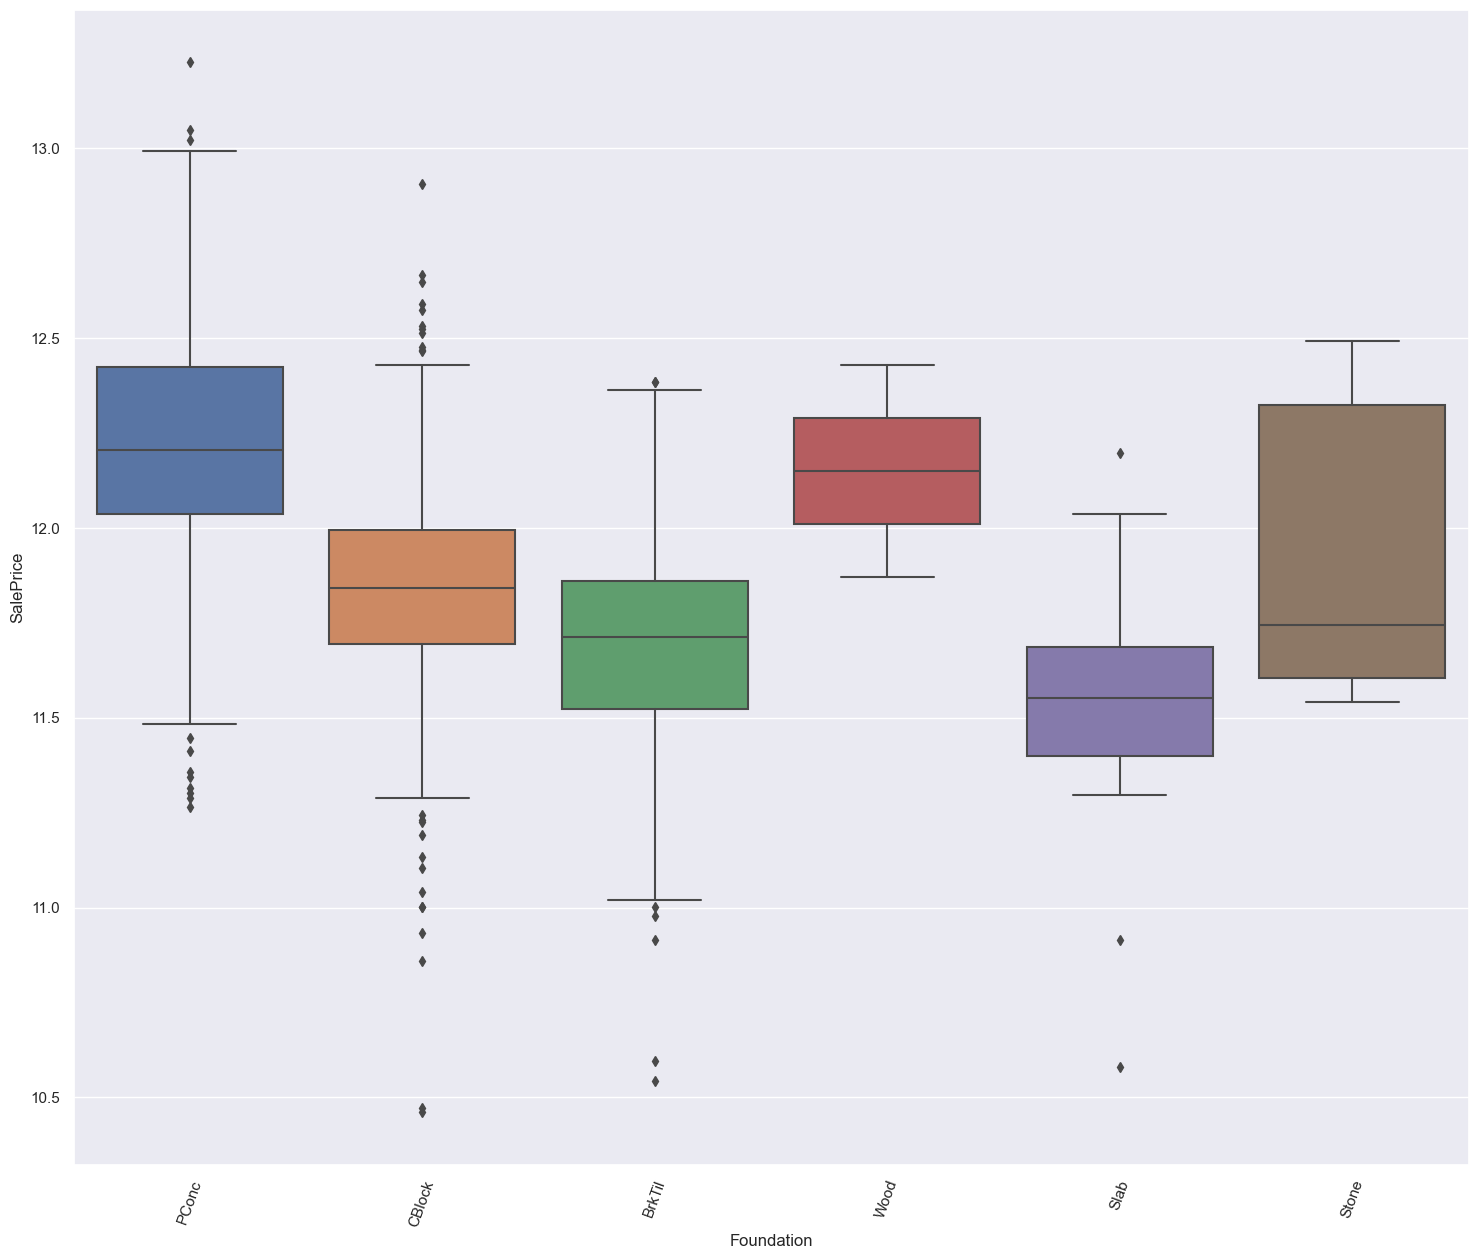

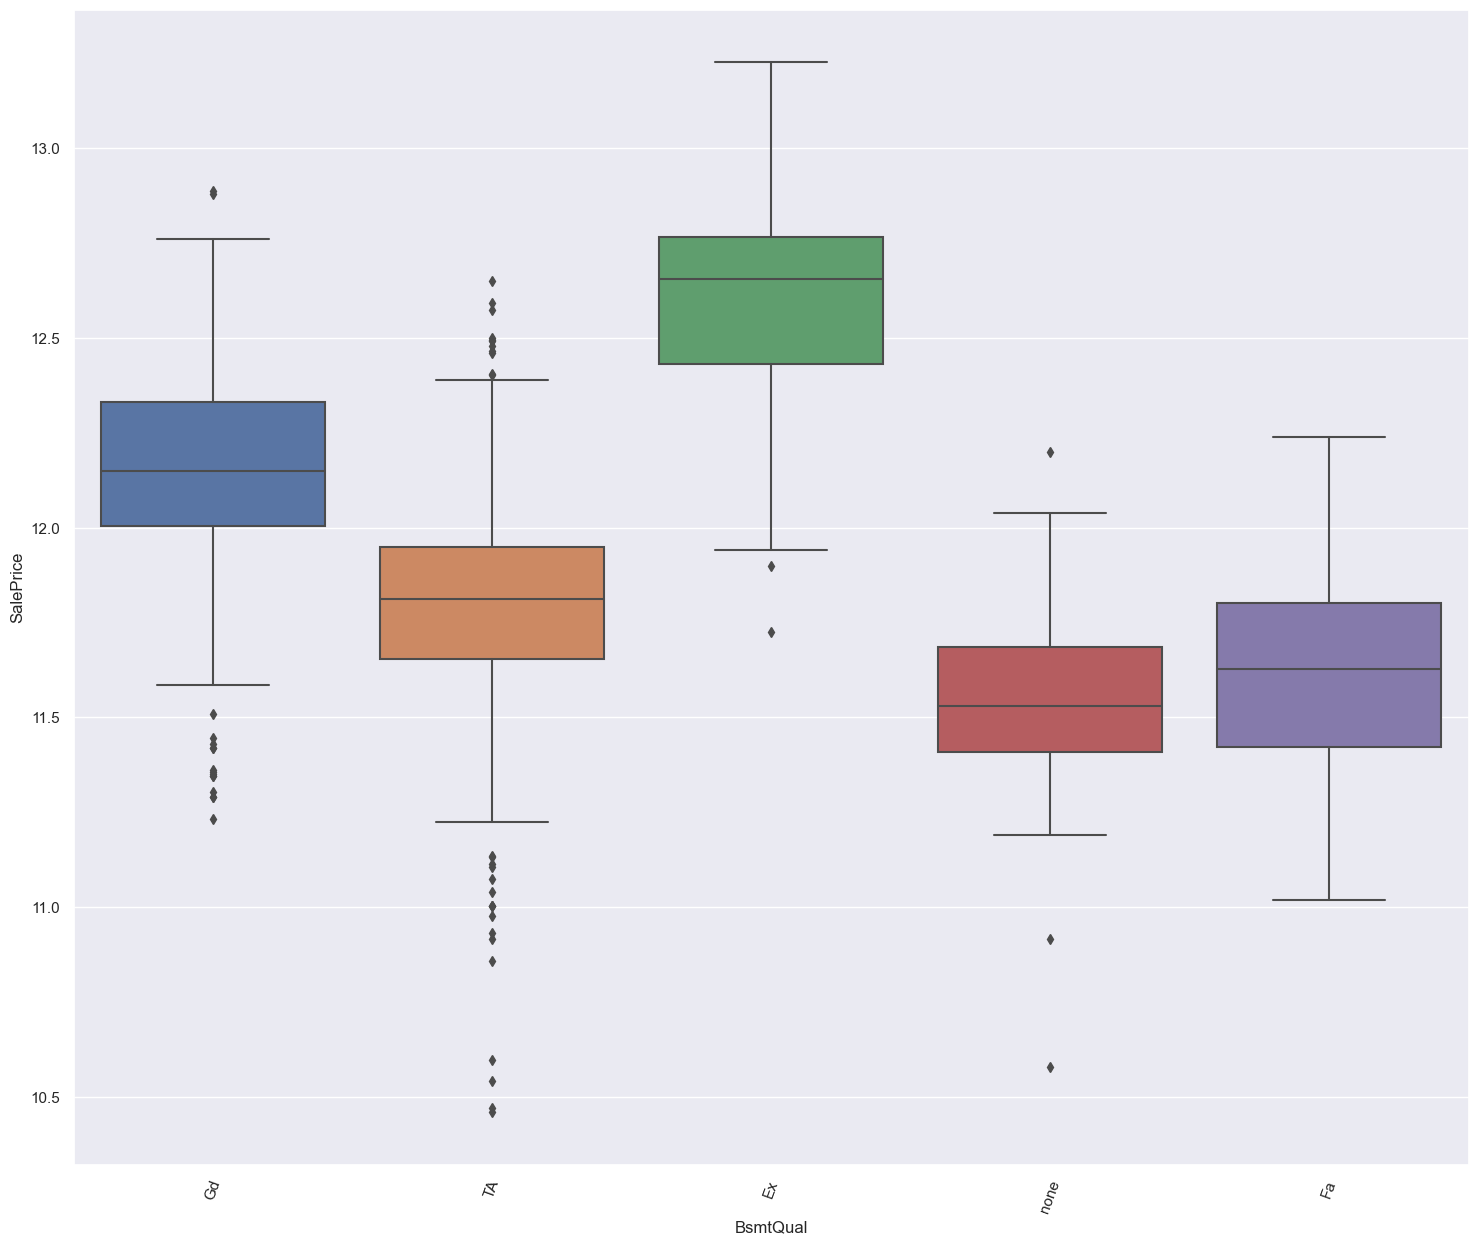

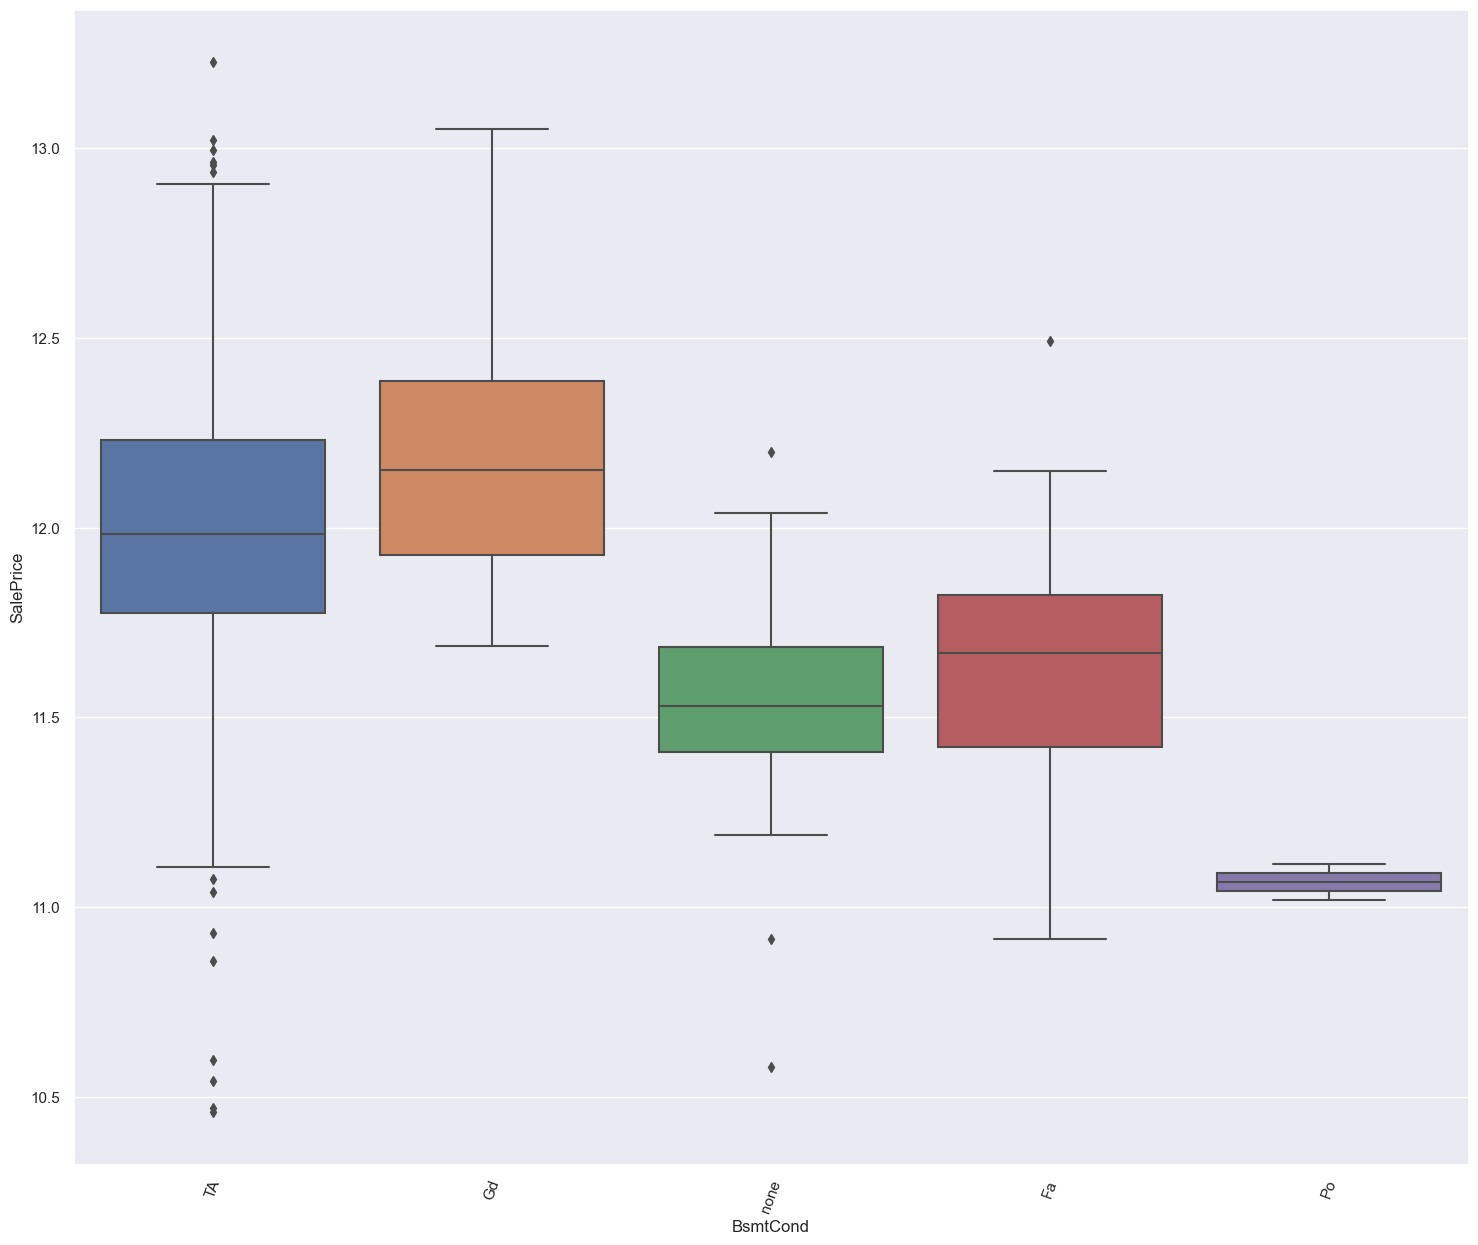

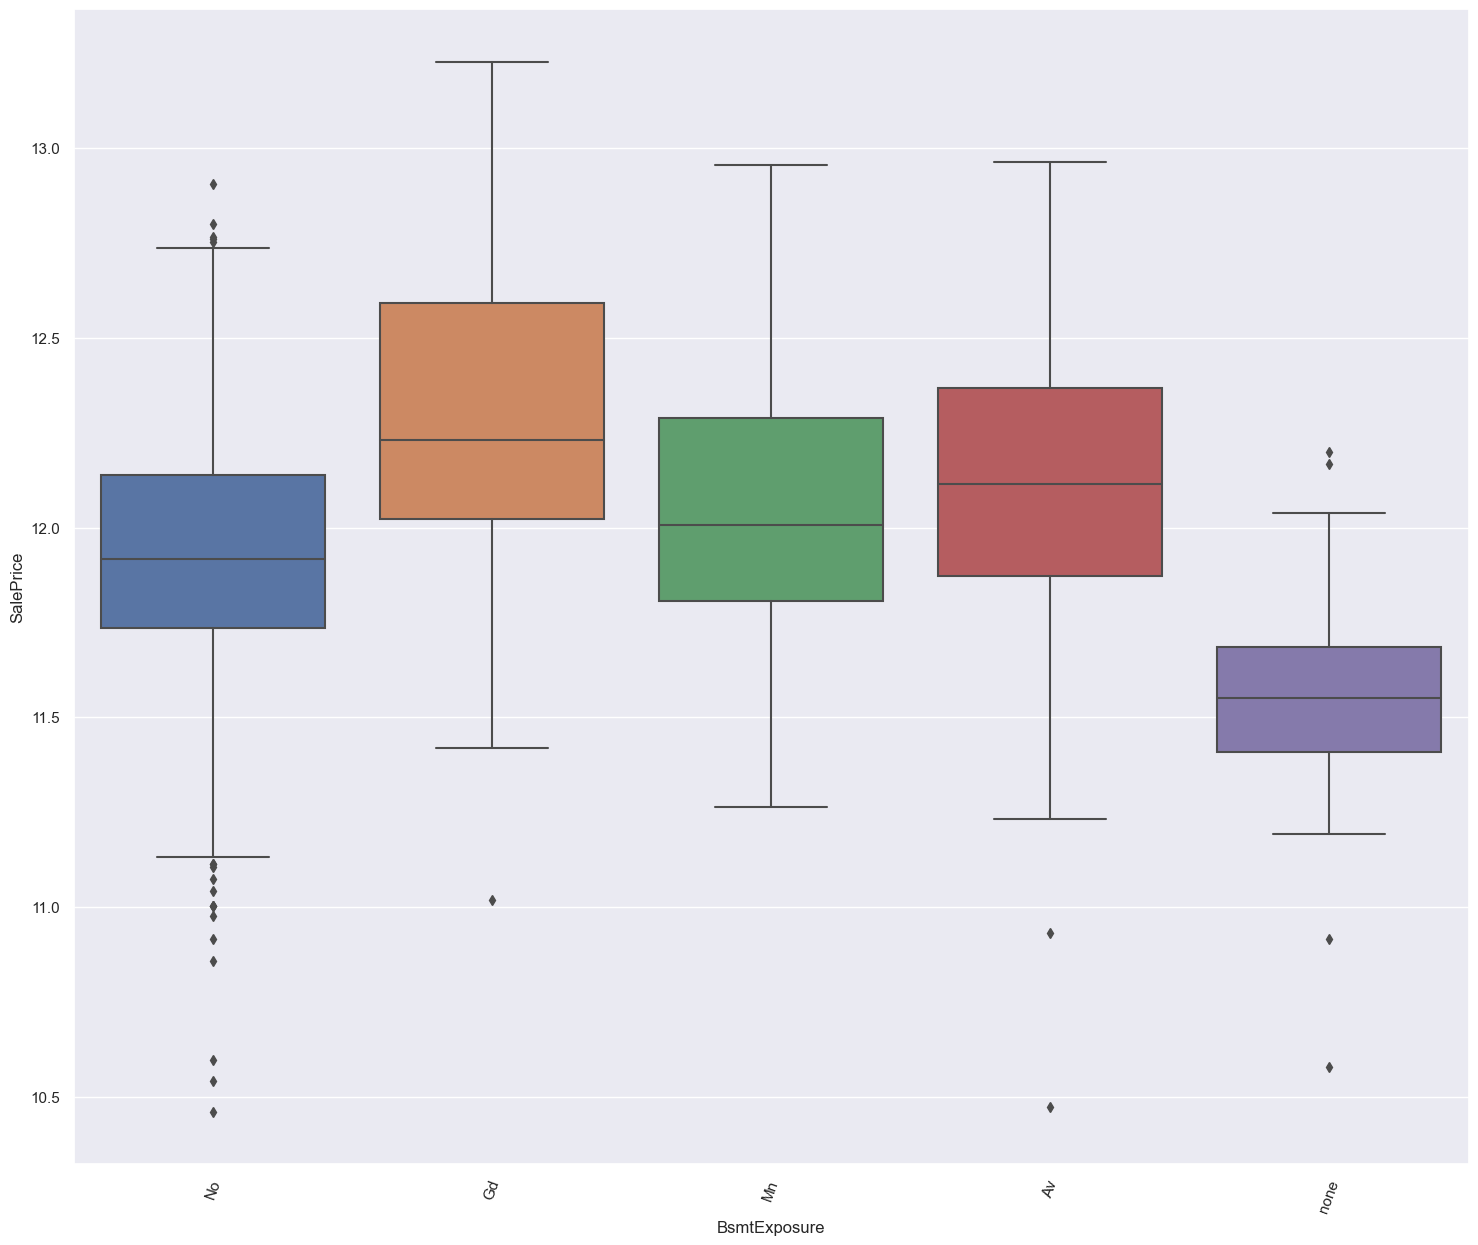

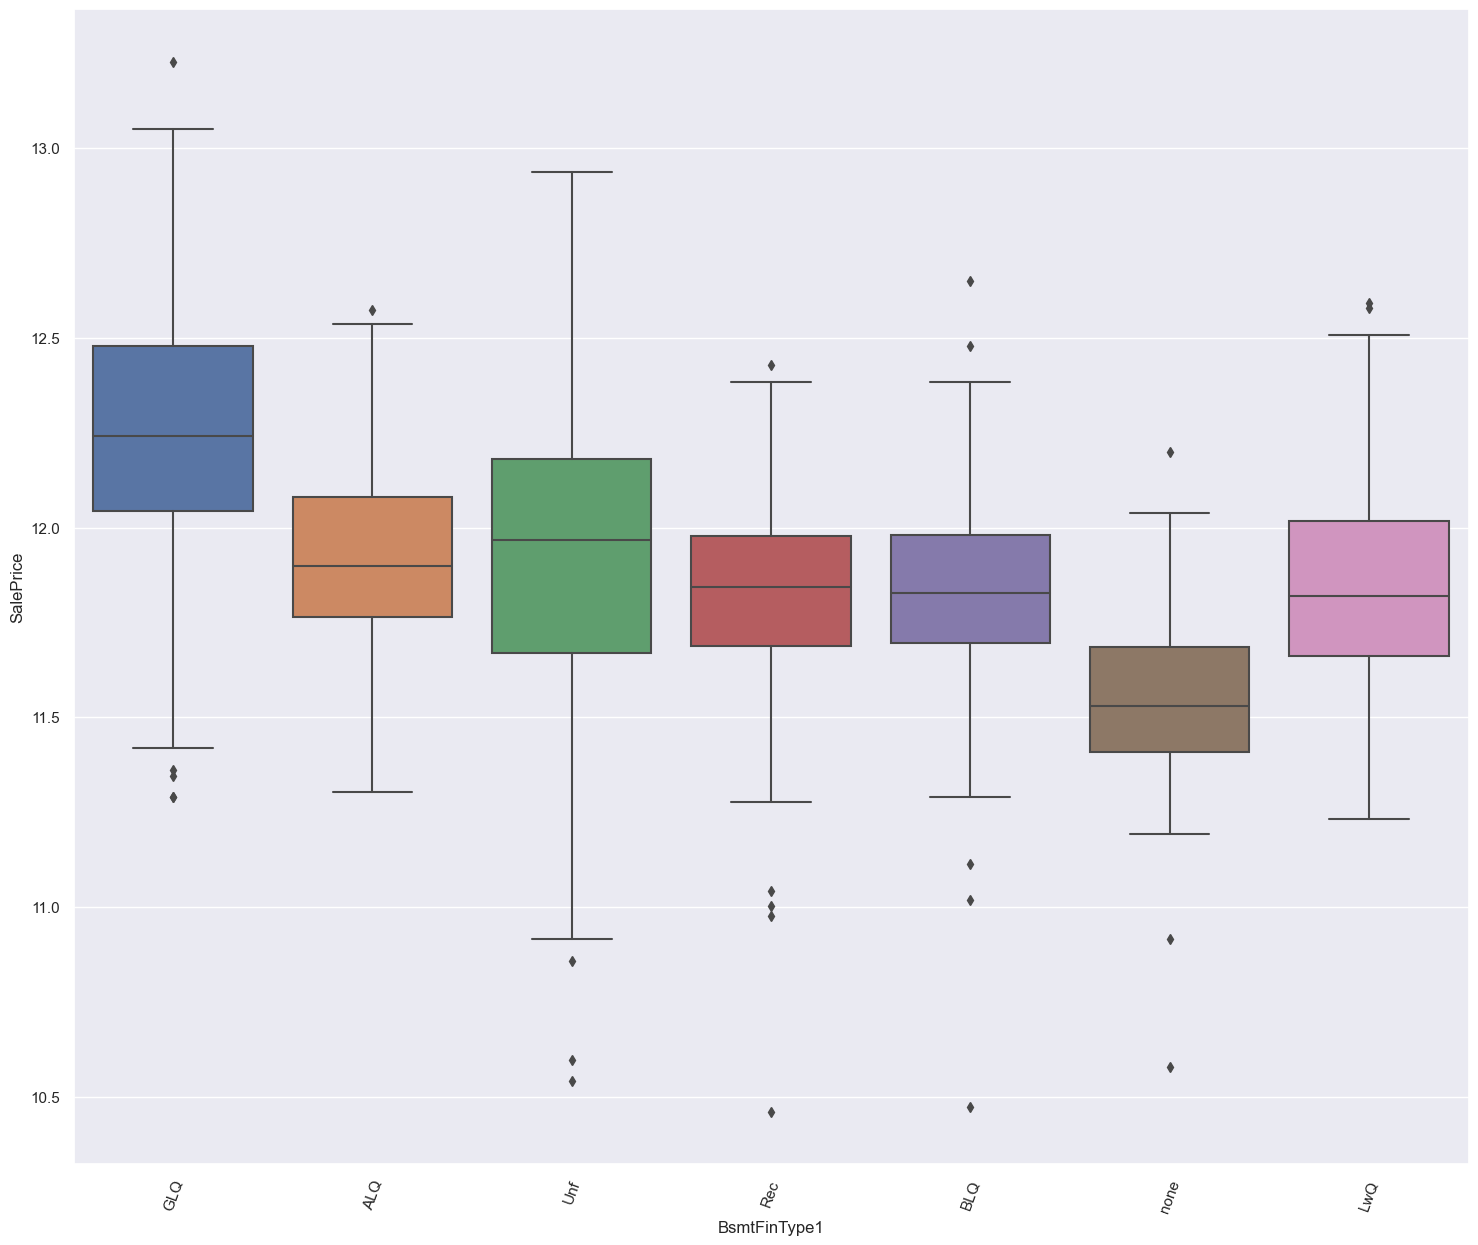

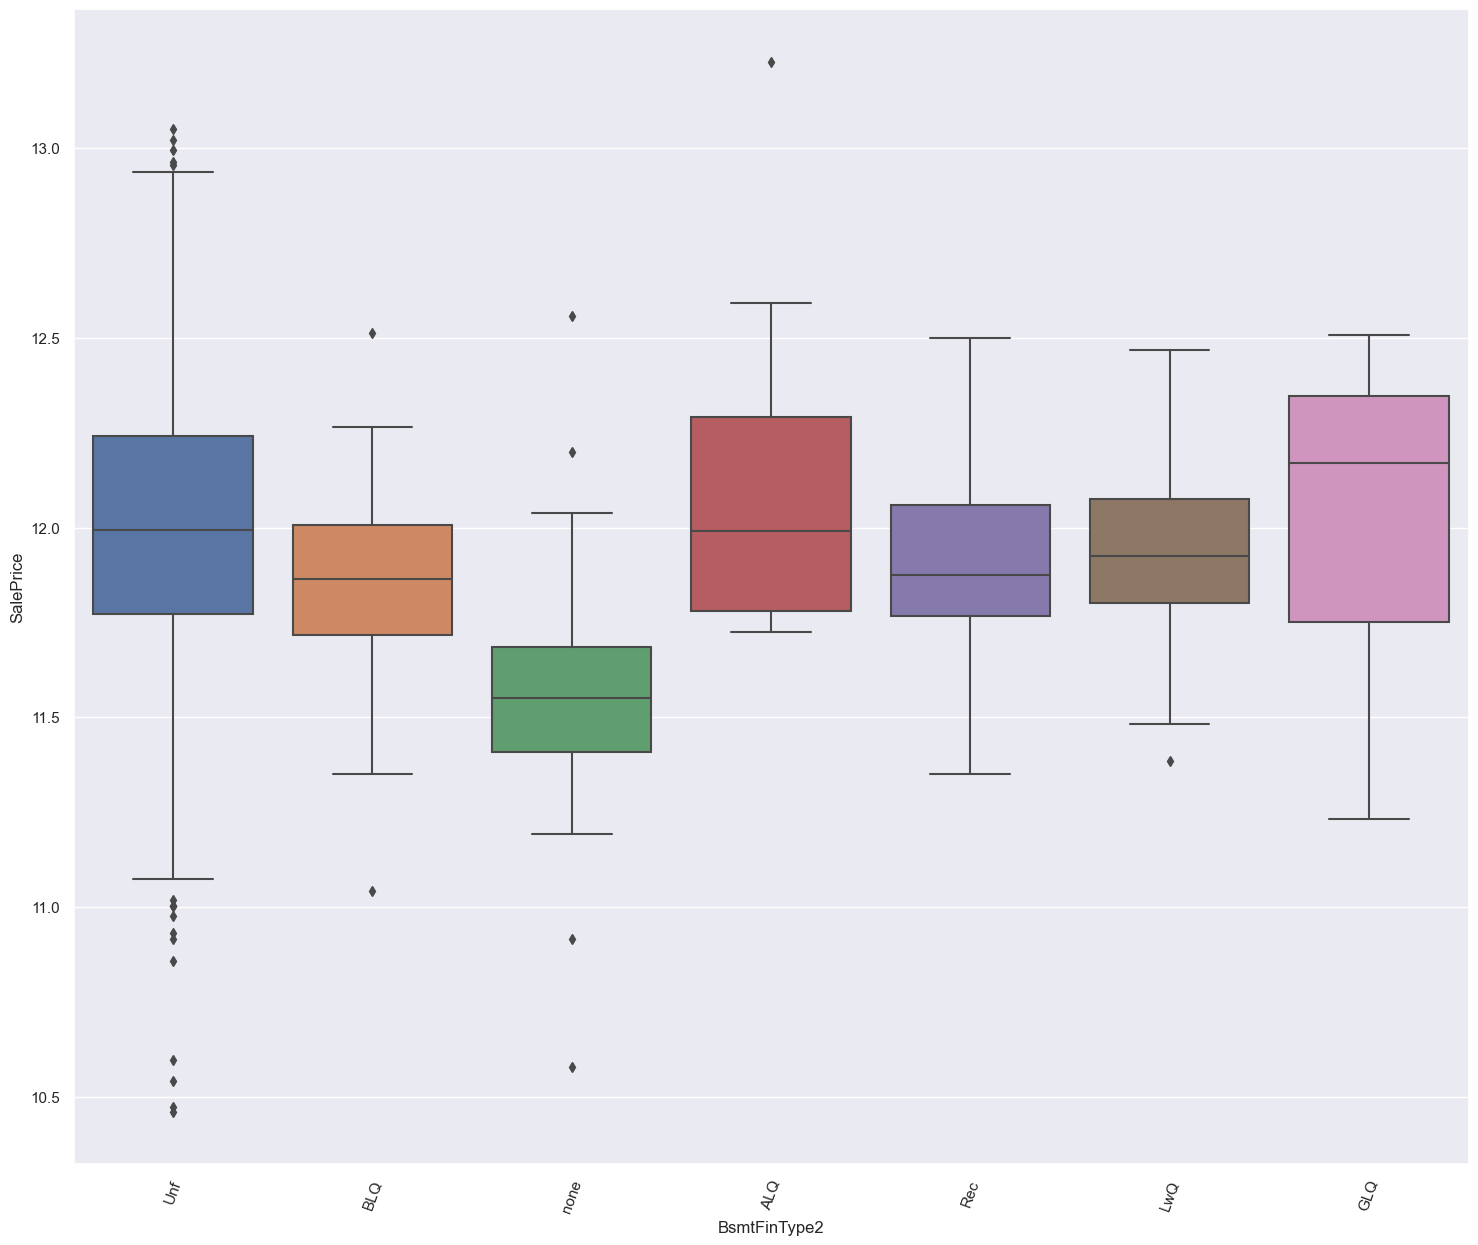

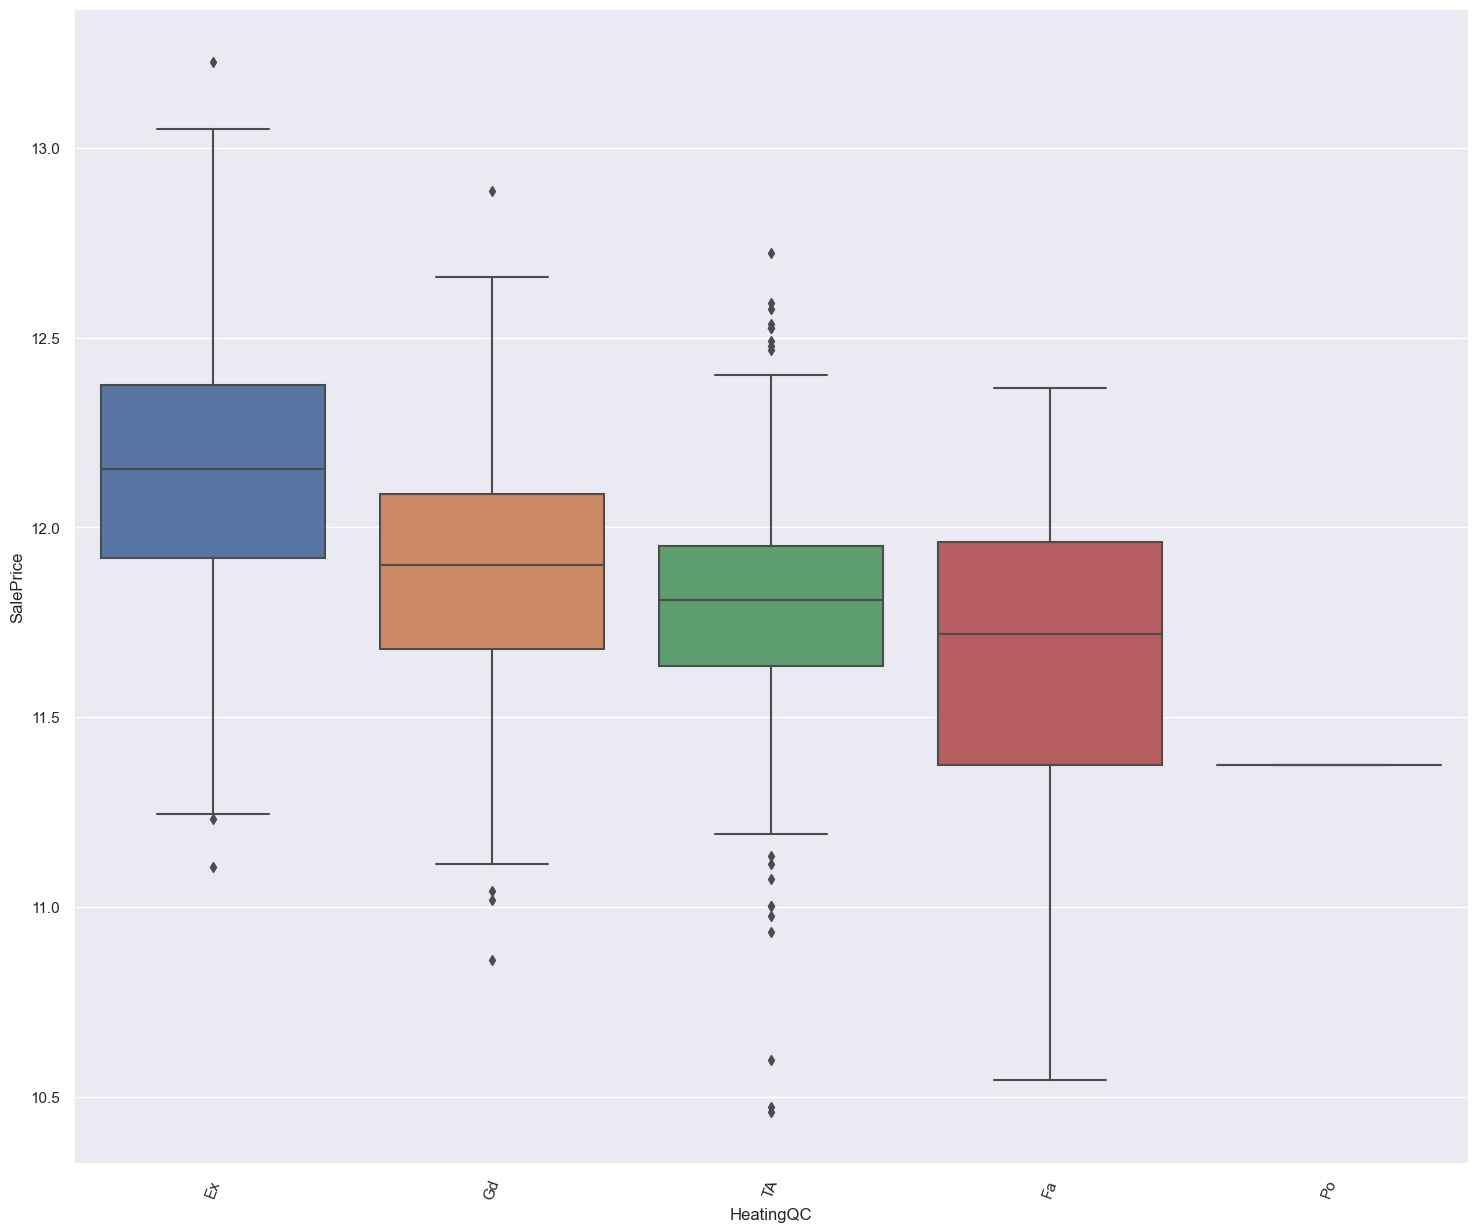

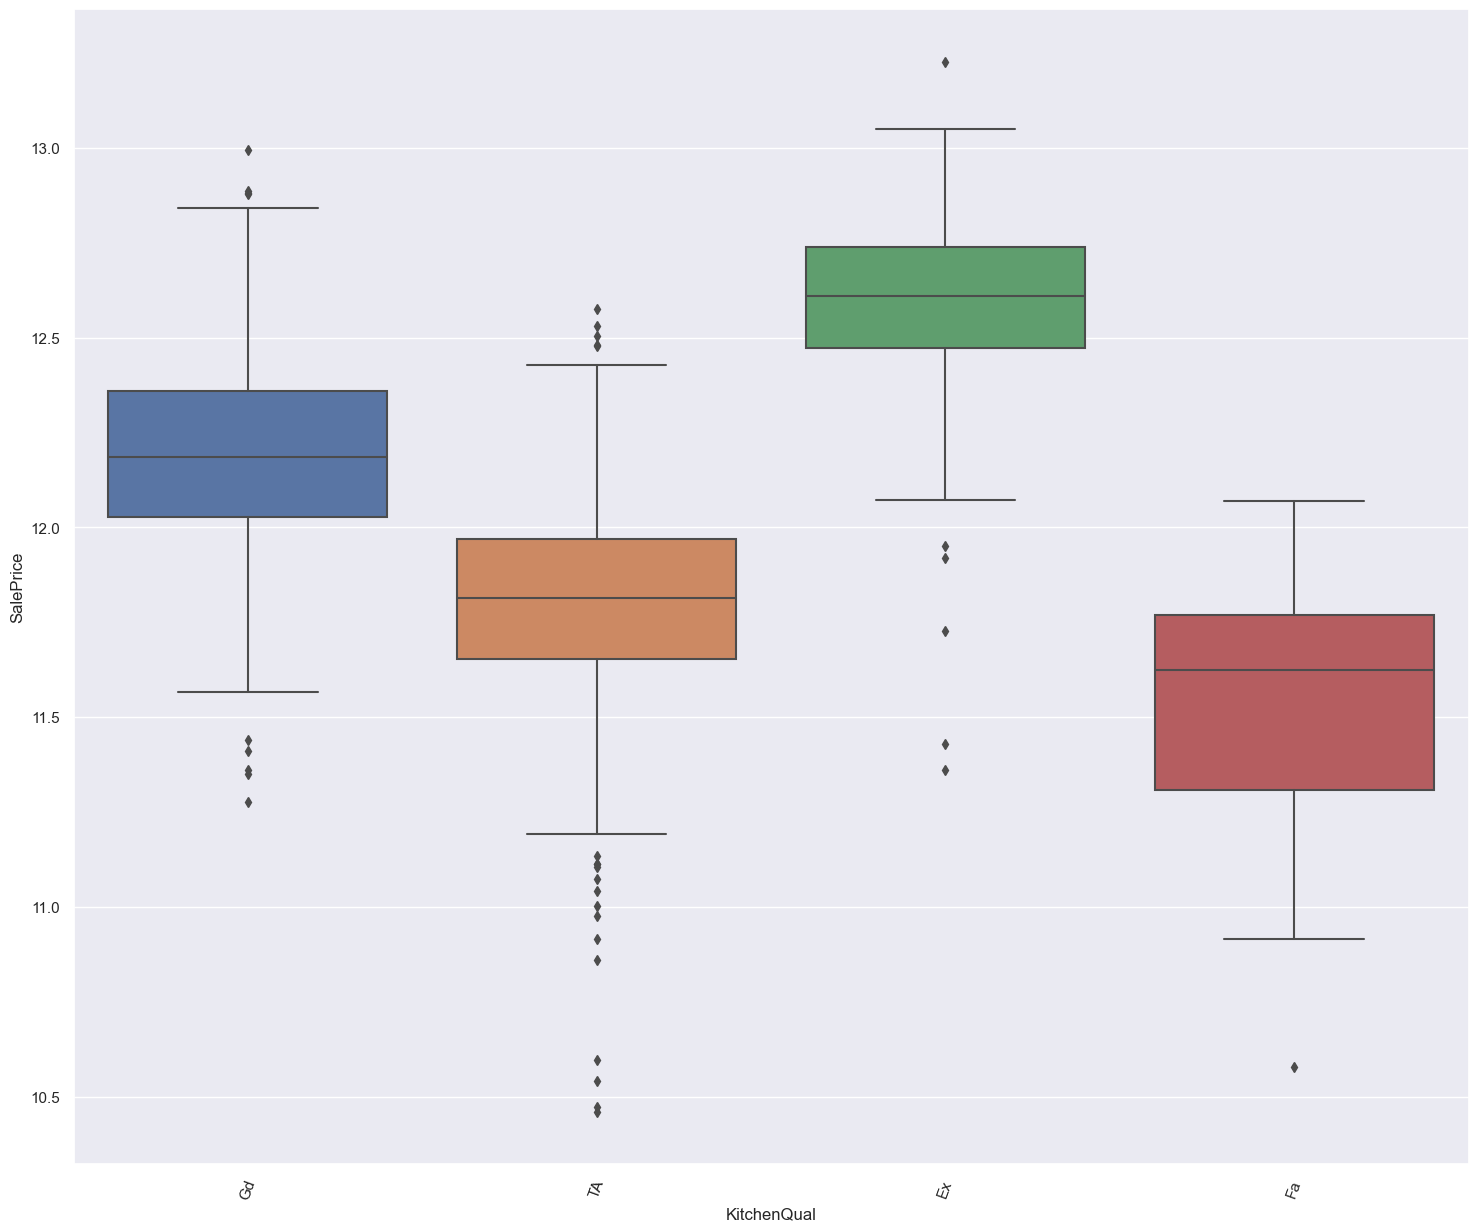

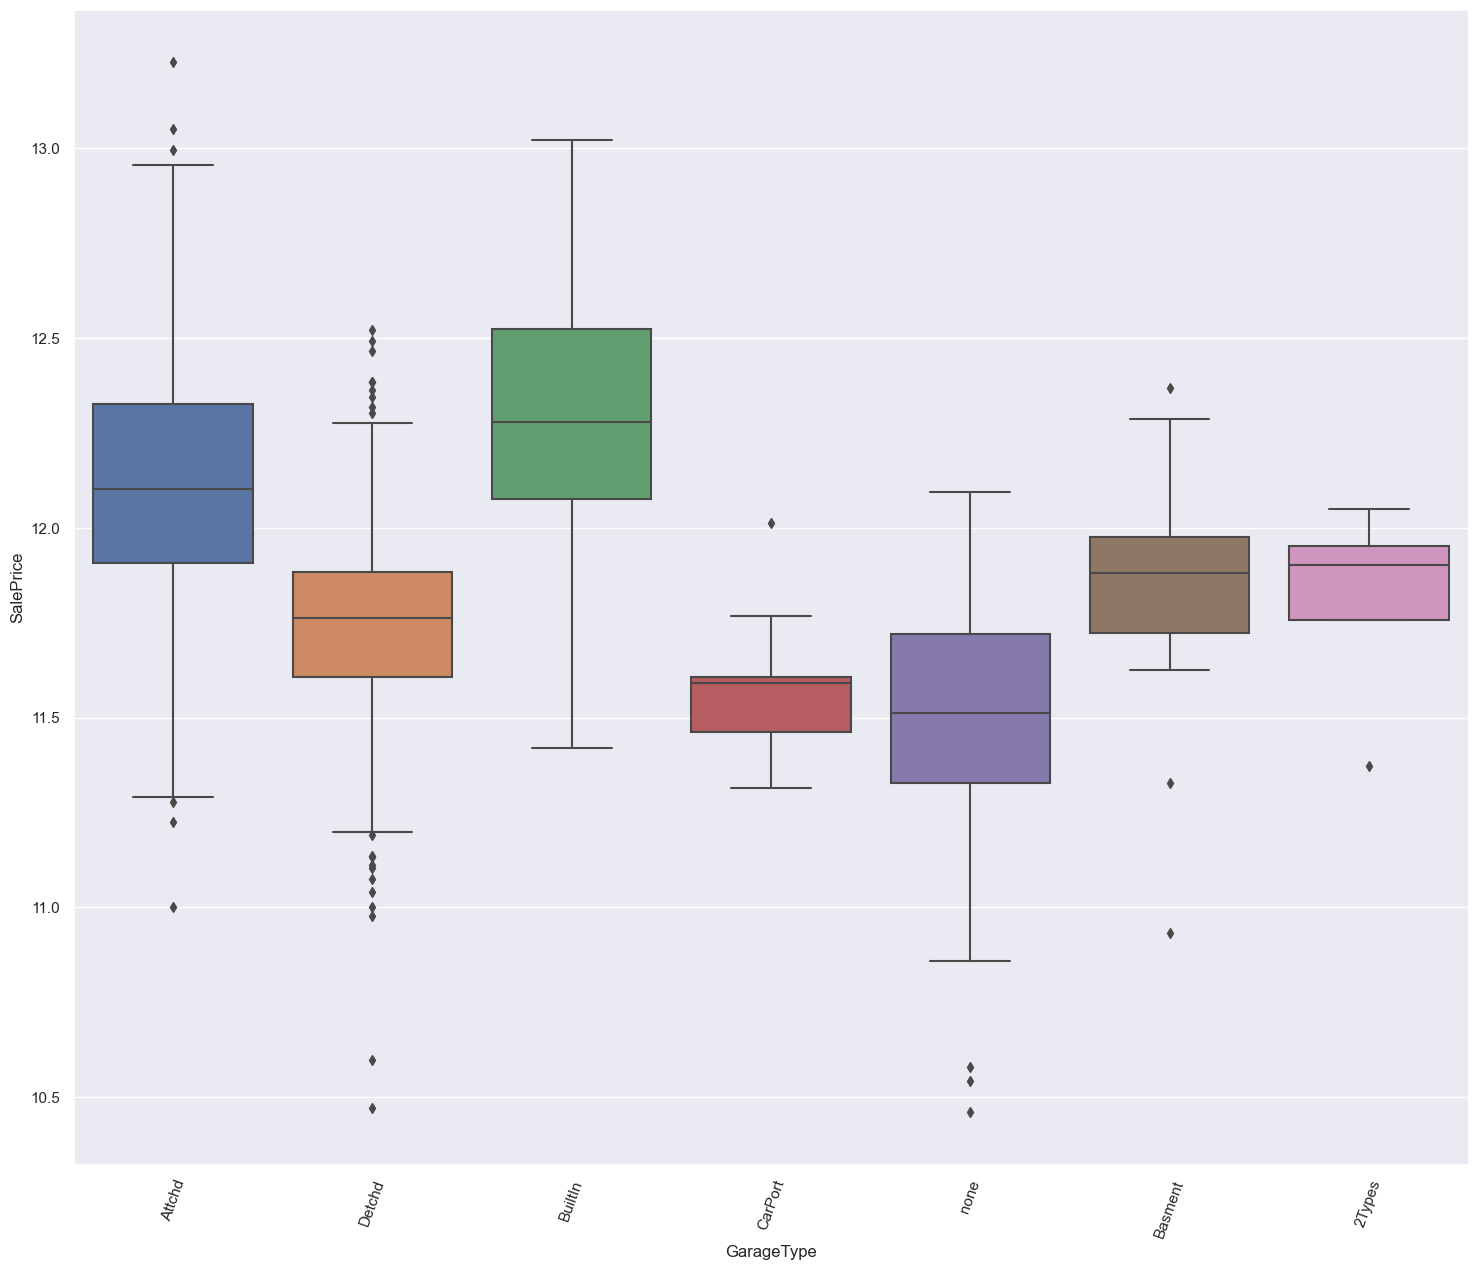

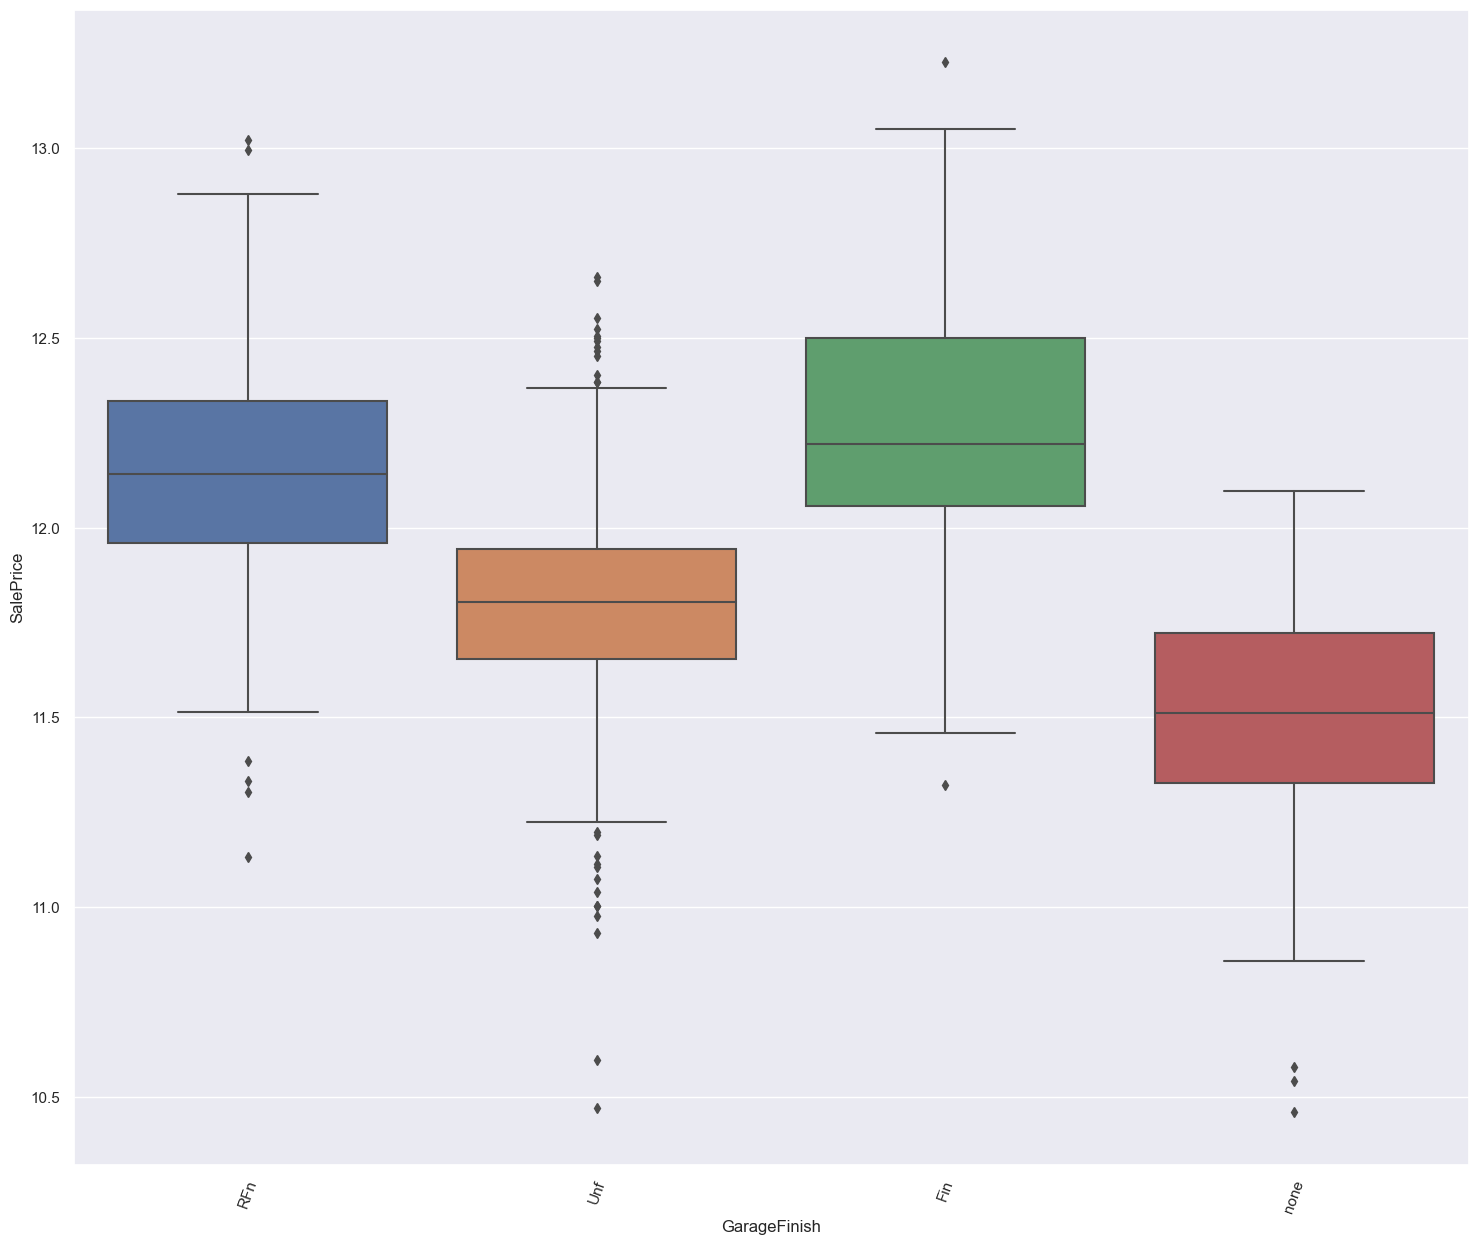

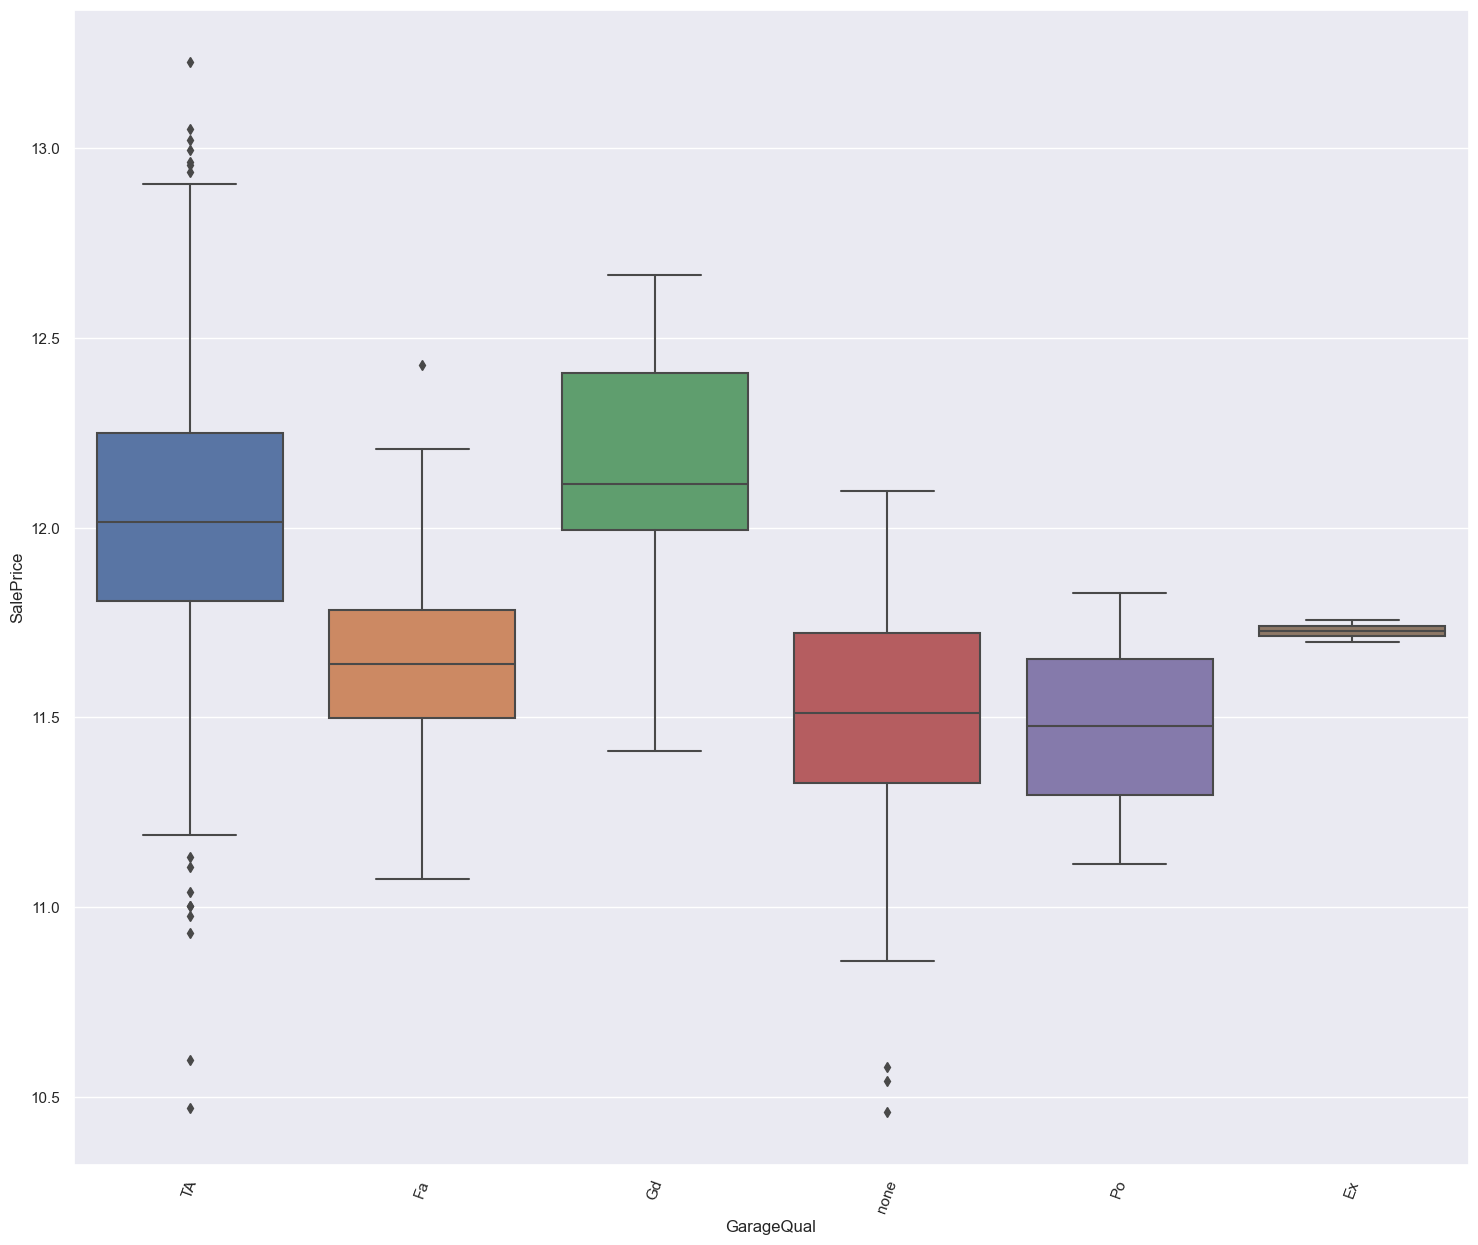

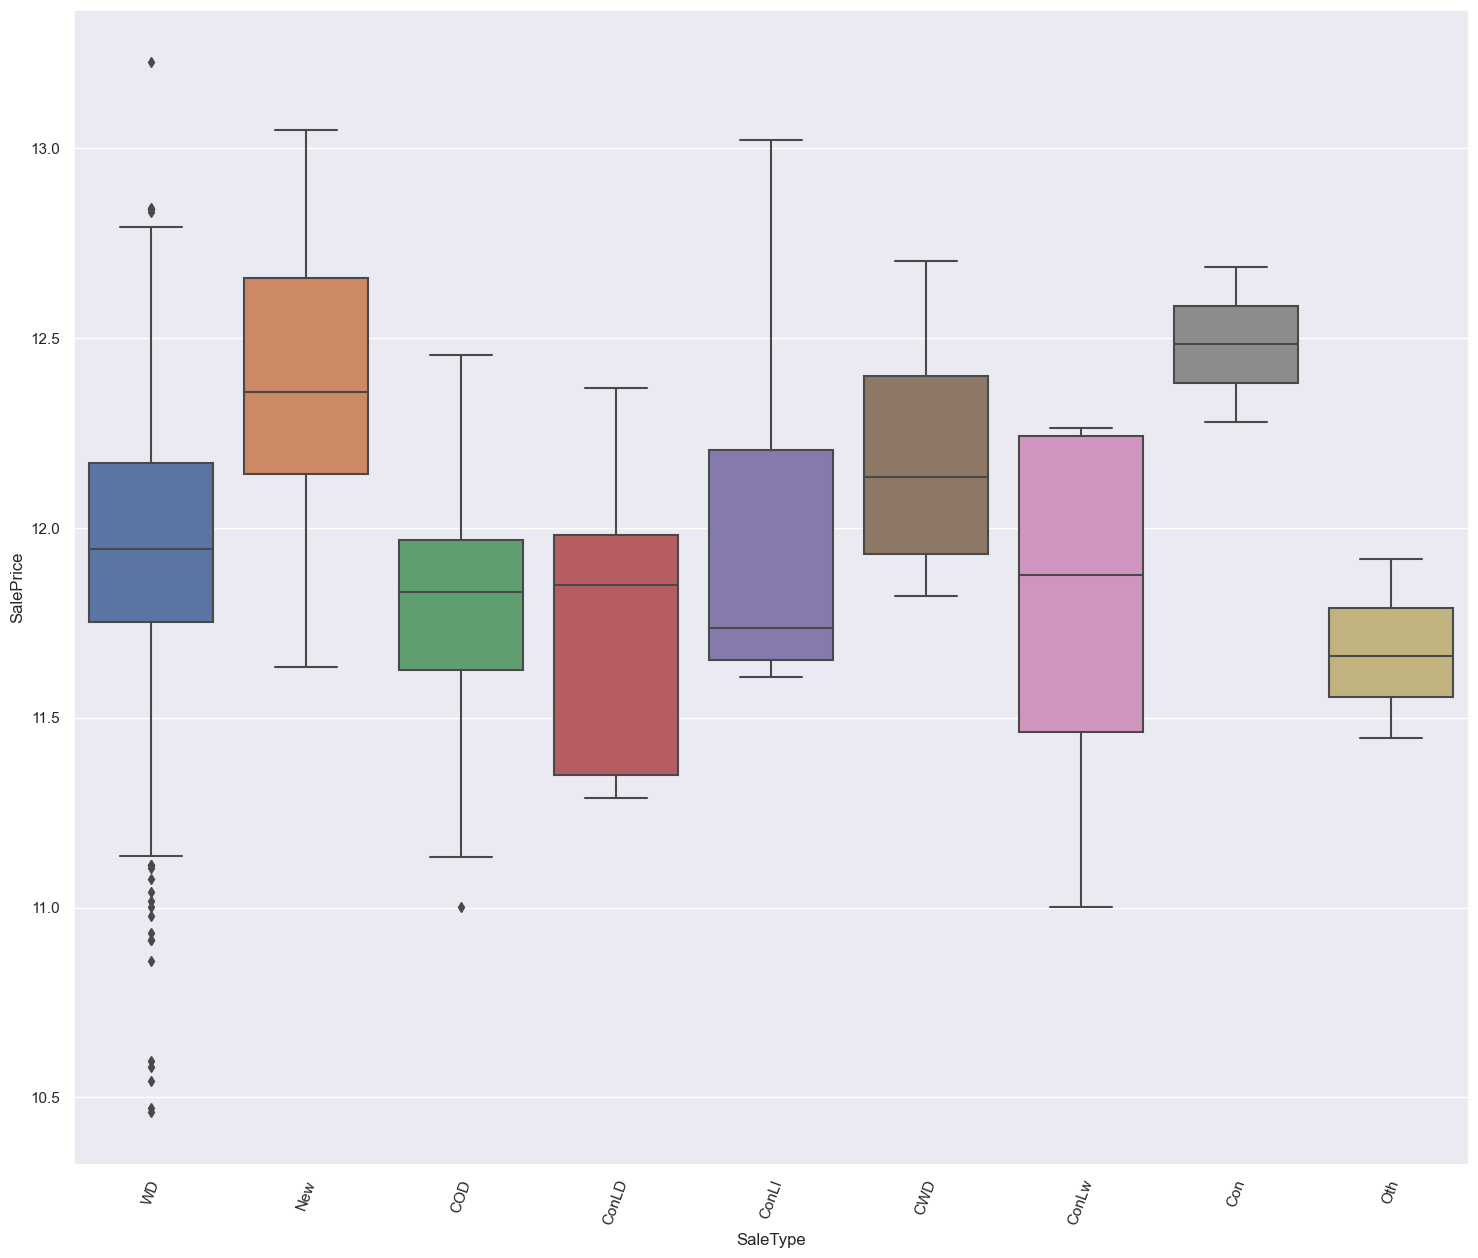

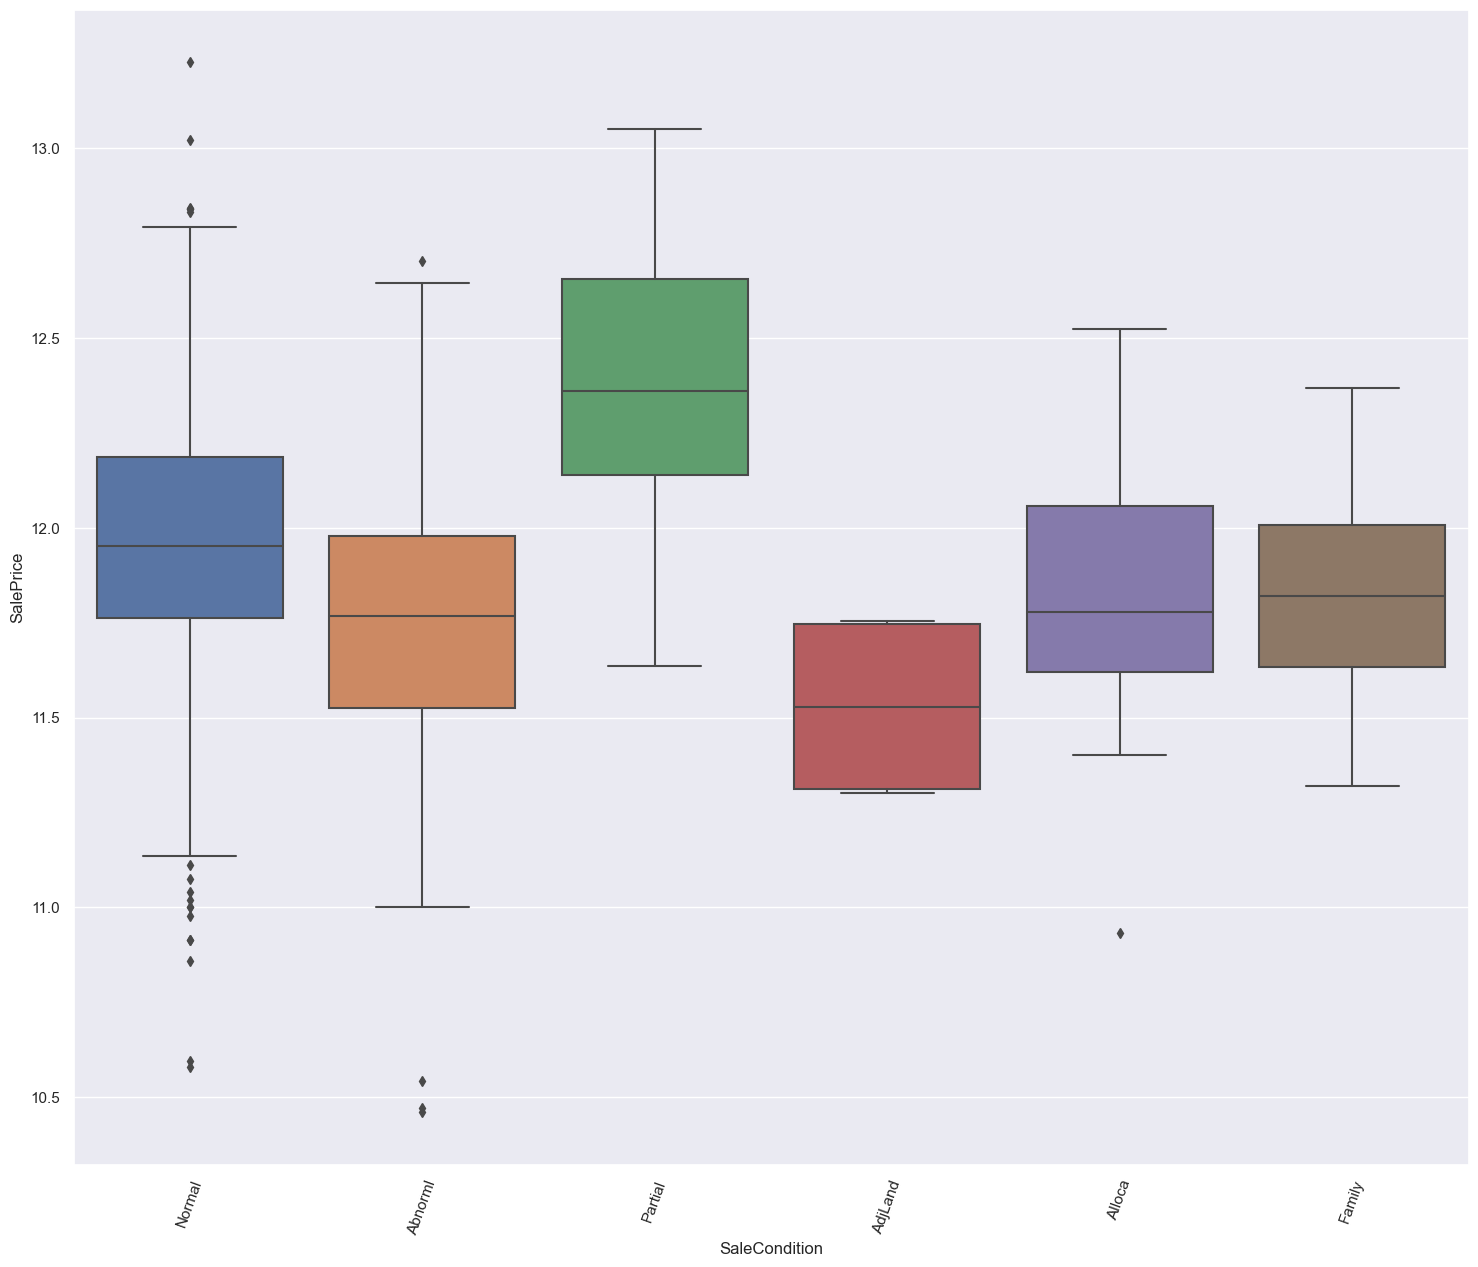

In [170]:
#Plotting all the Categorical Values against SalePrice
for column_cc in df_cat.columns:
    plt.figure(figsize=(18,15))
    sns.boxplot(x=column_cc, y="SalePrice", data=df)
    plt.xticks(rotation=70)

Text(0.5, 1.0, 'Overall Condition')

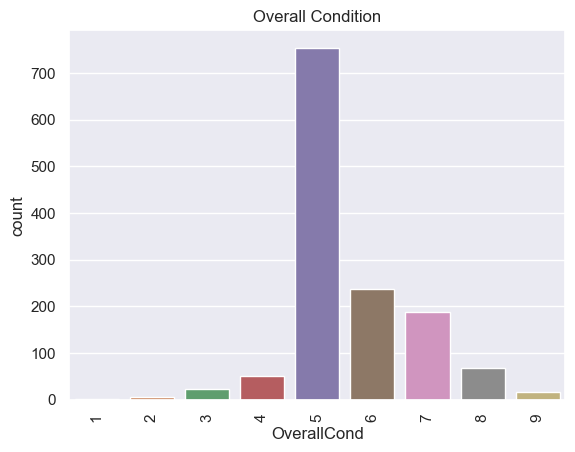

In [171]:
sns.countplot(x='OverallCond', data=df).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

5 is the most - overall condition

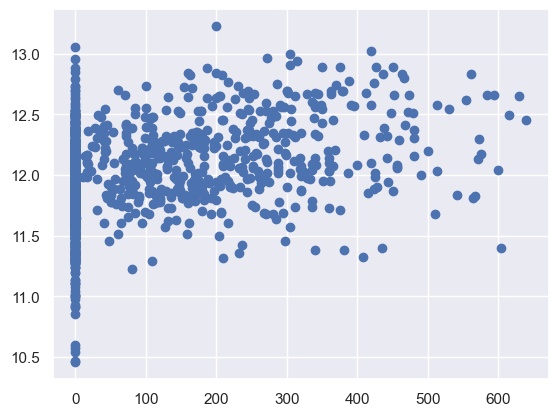

In [172]:
#scatterplot between Masonry veneer area in square feet and saleprice
plt.scatter(df['MasVnrArea'],df['SalePrice'])

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

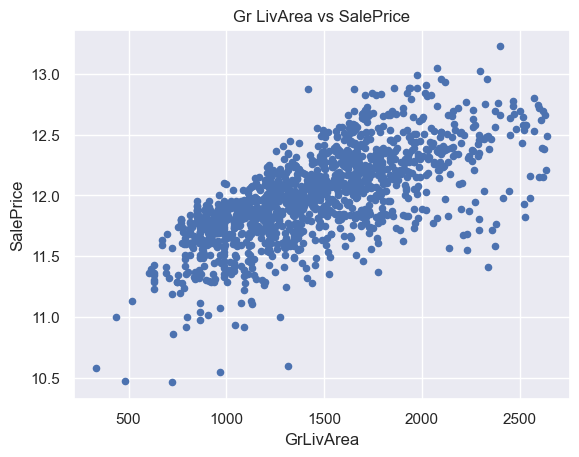

In [173]:
data_sale_gr = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data_sale_gr.plot.scatter(x='GrLivArea', y='SalePrice');
plt.title('Gr LivArea vs SalePrice')

### correlations among numerical variables

In [174]:
cor = df_num.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch    MoSold  SalePrice   Remodel  BuildingAge  OldOrNewGarage
MSSubClass        1.000000    -0.444929 -0.428037     0.048498    -0.068999    0.026244   -0.070335   -0.064142  -0.145659    -0.258733 -0.270832  0.322397   0.090147      0.011142  0.145686  0.181136     -0.055693      0.033037   -0.037665   -0.039916   -0.107115   -0.020135    -0.003714      -0.009028 -0.010664  -0.075482 -0.061805    -0.044659        0.038503
LotFrontage      -0.444929     1.000000  0.582655     0.200380    -0.051003    0.189570    0.126841    0.045294   0.149236     0.314074  0.373980  0.014375   0.309679      0.039338  0.159780  0.029416      0.273642      0.303742    0.198139    0.299576    0.345765    0.083298     0.117090      -0.006234  0.037755   0.359570 -0.064308    -0.057873        0.078009
LotArea          -0.428037     0.582655  1.000000     0.164776    -0.025893    0.105812    0.155786    0.088777   0.085149     0.290944  0.397366  0.062612   0.371841      0.062797  0.167747  0.077909      0.286814      0.347167    0.286912    0.269641    0.308772    0.151084     0.133041      -0.012669  0.035850   0.375296 -0.002644    -0.032556       -0.010350
OverallQual       0.048498     0.200380  0.164776     1.000000    -0.111565    0.370800    0.194564   -0.060034   0.306657     0.516065  0.428395  0.235522   0.556869      0.100135  0.535787  0.238749      0.078797      0.367226    0.372716    0.588656    0.537424    0.214007     0.299871      -0.133704  0.078263   0.813777 -0.118767    -0.550028        0.580770
OverallCond      -0.068999    -0.051003 -0.025893    -0.111565     1.000000   -0.137127   -0.024103    0.045370  -0.152321    -0.174639 -0.167205  0.003249  -0.129020     -0.037909 -0.232316 -0.066387     -0.000559     -0.091447   -0.040662   -0.188888   -0.156549   -0.005259    -0.068653       0.094691 -0.017677  -0.048826  0.305914    -0.067009       -0.290742
MasVnrArea        0.026244     0.189570  0.105812     0.370800    -0.137127    1.000000    0.215177   -0.060754   0.104127     0.314594  0.299401  0.069367   0.297435      0.089991  0.236139  0.142171      0.092961      0.223417    0.218643    0.336673    0.330946    0.120847     0.119593      -0.117107  0.022727   0.375300 -0.174635    -0.148061        0.179945
BsmtFinSF1       -0.070335     0.126841  0.155786     0.194564    -0.024103    0.215177    1.000000   -0.045954  -0.538860     0.431005  0.352679 -0.218122   0.068270      0.647493  0.027816 -0.024049     -0.127455     -0.044971    0.196672    0.188001    0.229917    0.182595     0.070605      -0.132549  0.007269   0.357863 -0.126612    -0.117450        0.017461
BsmtFinSF2       -0.064142     0.045294  0.088777    -0.060034     0.045370   -0.060754   -0.045954    1.000000  -0.204540     0.122330  0.107263 -0.118442  -0.026311      0.162607 -0.095095 -0.034558     -0.016778     -0.044661    0.041037   -0.032664   -0.009411    0.082209     0.023126       0.039499 -0.015804  -0.000195 -0.021617     0.068522       -0.149768
BsmtUnfSF        -0.145659     0.149236  0.085149     0.306657    -0.152321    0.104127   -0.538860   -0.204540   1.000000     0.457307  0.345512 -0.023950   0.254341     -0.415554  0.274978 -0.058959      0.156885      0.248838    0.058294    0.225914    0.199750   -0.024212     0.112575      -0.002548  0.052600   0.224470  0.024566    -0.181862        0.341362
TotalBsmtSF      -0.258733     0.314074  0.290944     0.516065    -0.174639    0.314594    0.431005    0.122330   0.457307     1.000000  0.789561 -0.300311   0.340330      0.281799  0.293707 -0.103519      0.033094      0.209082    0.285145    0.431276    0.455356    0.196045     0.206438      -0.125256  0.059155   0.619438 -0.113408    -0.295196        0.334303
1

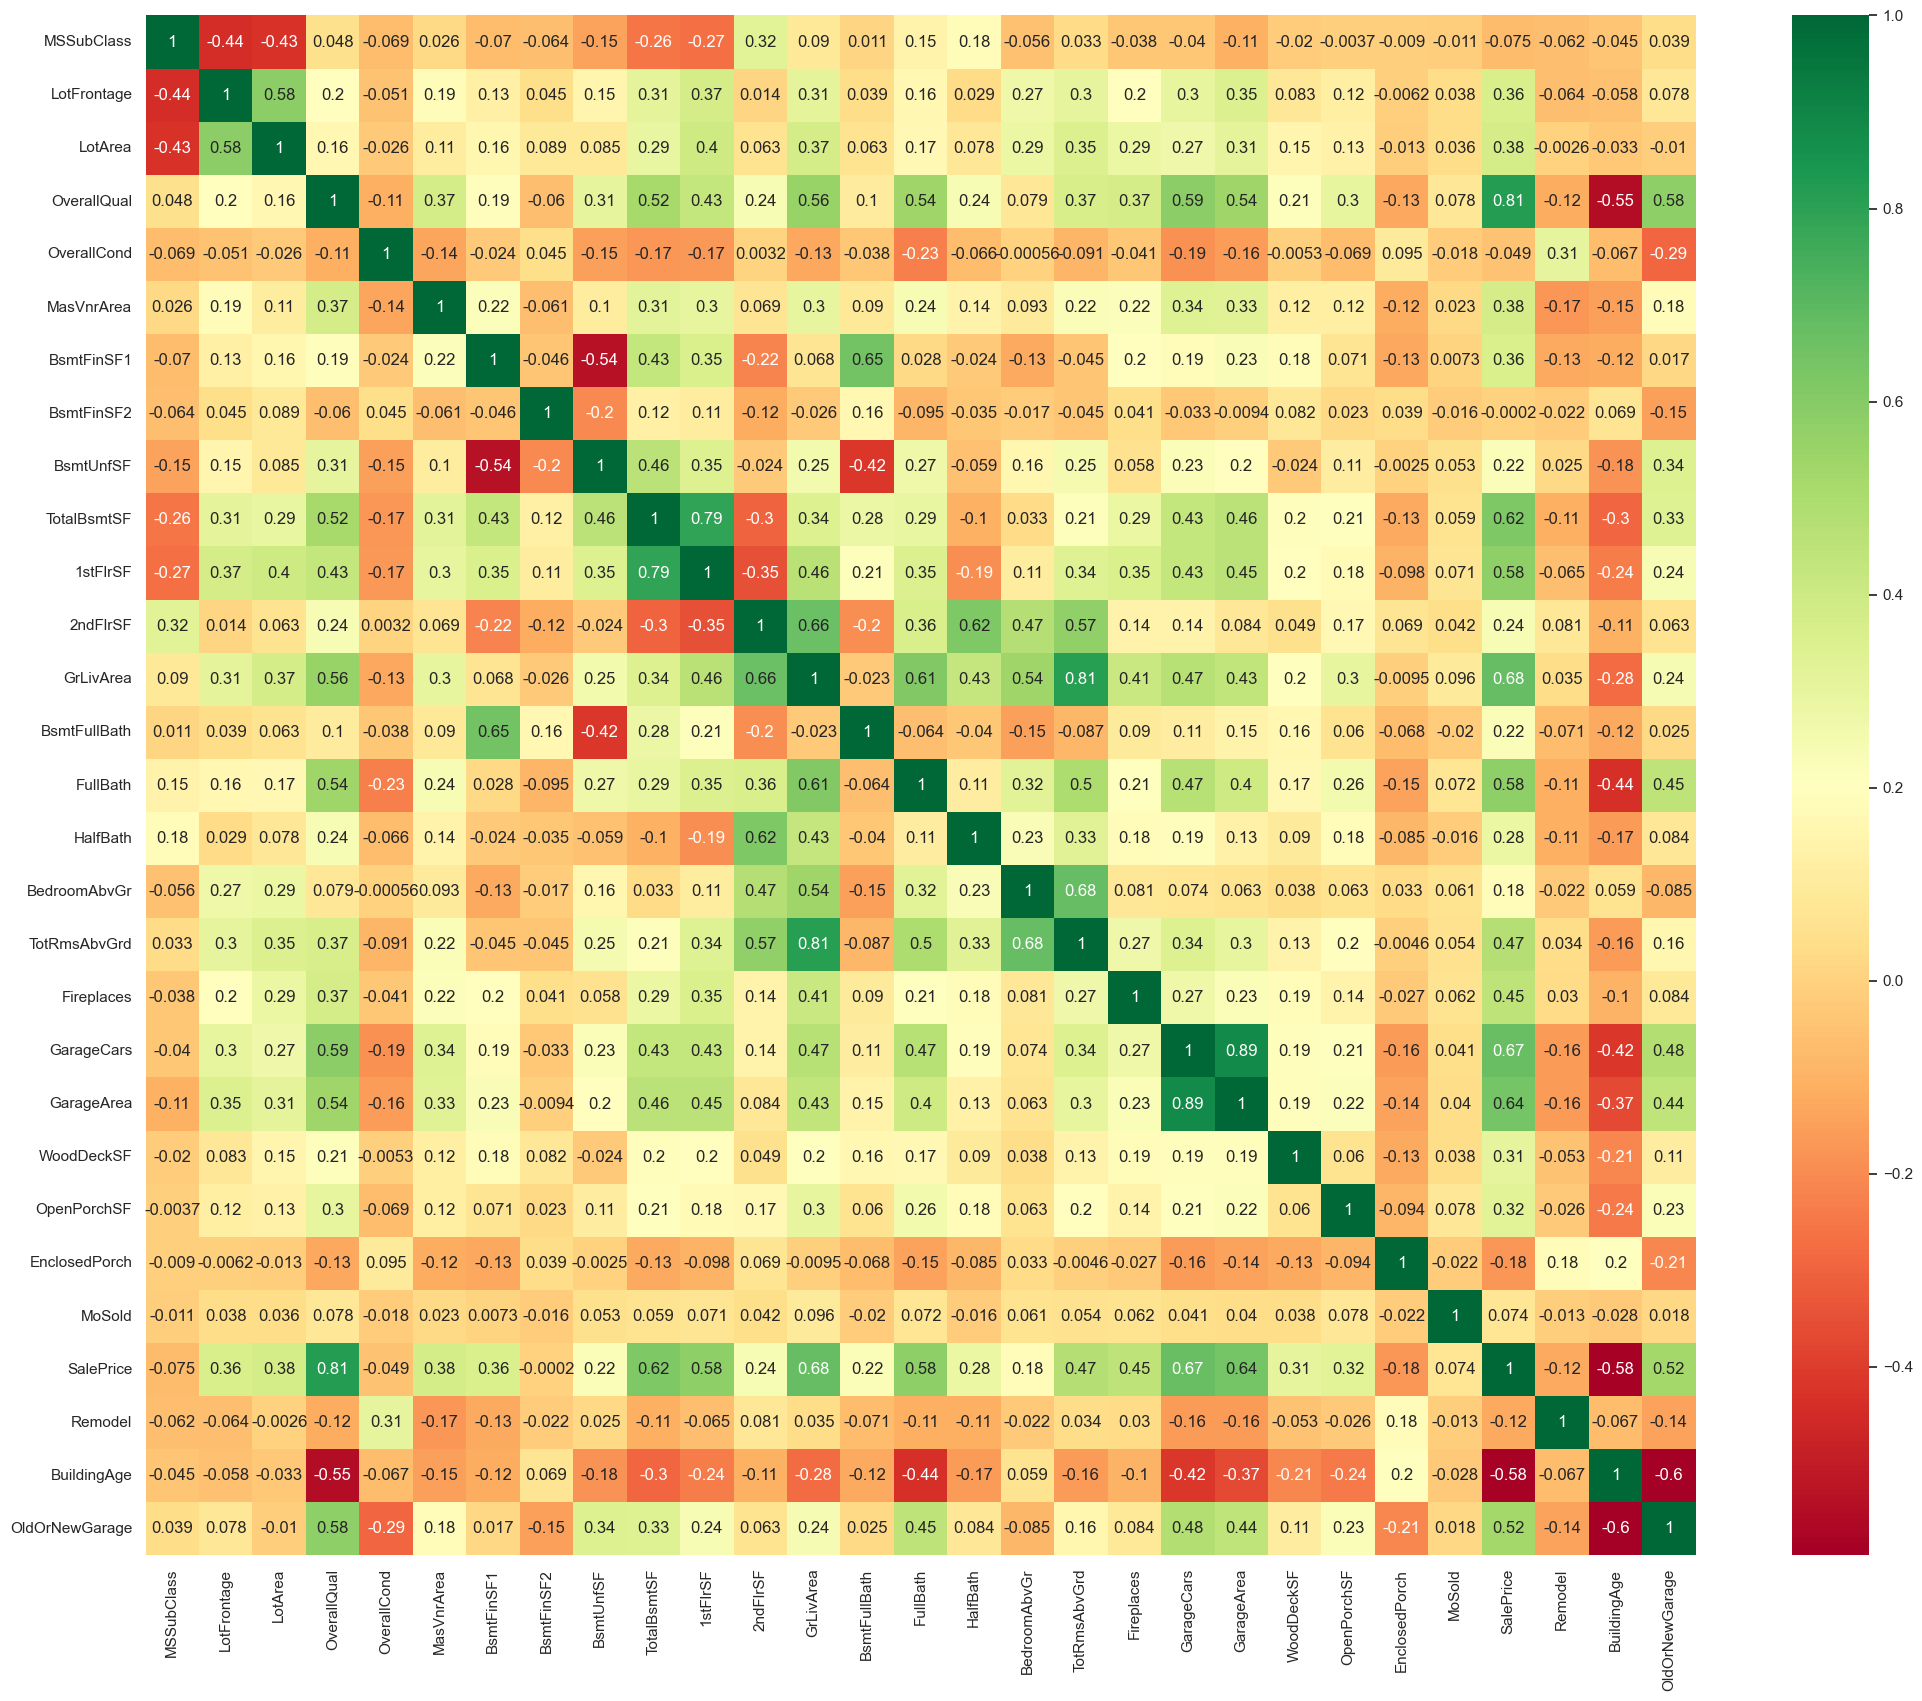

In [175]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');

Observations:- 
   * Many columns are highly correlated with each other
   * Target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea.
   * As there is multicollinearity among predictors in our data, it would be good to use Ridge Regression.

In [176]:
#lets find out which variables has high correlation with SalesPrice
df.corr()['SalePrice'].round(decimals = 2).sort_values(ascending=False)

SalePrice         1.00
OverallQual       0.81
GrLivArea         0.68
GarageCars        0.67
GarageArea        0.64
TotalBsmtSF       0.62
FullBath          0.58
1stFlrSF          0.58
OldOrNewGarage    0.52
TotRmsAbvGrd      0.47
Fireplaces        0.45
MasVnrArea        0.38
LotArea           0.38
BsmtFinSF1        0.36
LotFrontage       0.36
OpenPorchSF       0.32
WoodDeckSF        0.31
HalfBath          0.28
2ndFlrSF          0.24
BsmtUnfSF         0.22
BsmtFullBath      0.22
BedroomAbvGr      0.18
MoSold            0.07
BsmtFinSF2       -0.00
OverallCond      -0.05
MSSubClass       -0.08
Remodel          -0.12
EnclosedPorch    -0.18
BuildingAge      -0.58
Name: SalePrice, dtype: float64

### Dummy Variable Creation

In [177]:
# Convert categorical value into Dummy variables (one hot encoding)
df = pd.get_dummies(df,drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344 entries, 0 to 1459
Columns: 193 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(26), uint8(164)
memory usage: 530.2 KB


In [178]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  SalePrice  Remodel  BuildingAge  OldOrNewGarage  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0          60         65.0     8450            7            5       196.0         706           0        150          856       856       854       1710             1         2         1             3             8           0           2         548           0           61              0       2  12.247694        0            5               1            0            0            1            0             0             0             1                0                0                1                  0              0              0                 1                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0   
1          20         80.0     9600            6            8         0.0         978           0        284         1262      1262         0       1262             0         2         0             3             6           1           2         460         298            0              0       5  12.109011        0           31               0            0            0            1            0             0             0             1                0                0                1                  0              1              0                 0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0   
2          60         68.0    11250            7            5       162.0         486           0        434          920       920       866       1786             1         2         1             3             6           1           2         608           0           42              0       9  12.317167        1            6               1            0            0            1            0             0             0             0                0                0                1                  0              0              0                 1                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0   
3          70         6

In [179]:
#Lets check the updated Dataset in terms of percentile
df.describe([0.25,0.50,0.75,0.99])

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath     FullBath     HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch       MoSold    SalePrice      Remodel  BuildingAge  OldOrNewGarage  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
count  1344.000000  1344.000000   1344.000000  1344.000000  1344.000000  1344.000000  1344.000000  1344.000000  1344.000000  1344.000000  1344.000000  1344.000000  1344.000000   1344.000000  1344.000000  1344.000000   1344.000000   1344.000000  1344.000000  1344.000000  1344.000000  1344.000000  1344.000000    1344.000000  1344.000000  1344.000000  1344.000000  1344.000000     1344.000000  1344.000000  1344.000000  1344.000000  1344.000000   1344.000000   1344.000000   1344.000000      1344.000000      1344.000000      1344.000000         1344.00000    1344.000000    1344.000000       1344.000000           1344.000000          1344.000000           1344.000000           1344.000000           1344.000000           1344.000000           1344.000000           1344.000000          1344.000000           1344.000000           1344.000000         1344.000000           1344.000000          1344.000000           1344.000000           1344.000000           1344.000000         1344.000000   
mean     57.072173    67.592262   9285.508185     6.006696     5.573661    83.779018   416.380208    45.191220   560.322917  1021.894345  1125.450893   317.943452  1447.991071      0.409226     1.531250     0.364583      2.834821      6.369048     0.561756     1.723958   458.854167    88.500744    43.858631      22.014881     6.356399    11.984162     0.469494    23.479167        0.275298     0.045387     0.011161     0.778274     0.157738      0.020089      0.003720      0.654018         0.030506         0.014881         0.915179            0.05878       0.034226       0.002232          0.730655              0.001488             0.011905              0.042411              0.011161              0.109375              0.034226              0.071429              0.052083             0.027530              0.012649              0.032738            0.159970              0.006696             0.050595              0.015625              0.048363              0.079613            0.017113   
std      42.773834    17.364271   3428.804455     1.321380     1.101920   134.462686   410.126228   155.558346   432.887278   393.758334   343.042314   405.883990   430.333179      0.508253     0.528198     0.499705      0.782977      1.481821     0.616764     0.737562   205.196873   118.217419    62.038762      59.712214     2.705760     0.370764     0.499254    20.828367        0.446830     0.208229     0.105092     0.415562     0.364631      0.140358      0.060903      0.475864         0.172039         0.121122         0.278719            0.23530       0.181877       0.047210          0.443785              0.038561             0.108498              0.201599              0.105092              0.312225              0.181877              0.257635              0.222278             0.163682              0.111795              0.178017            0.366715              0.081588             0.219251              0.124066              0.214612              0.270794            0.129741   
min      20.000000    21

### Splitting the data into train and test sets

In [180]:
# We will keep the train size as 70% and automatically test size will be rest 30%
# Also we will keep random_state as a fixed value of 100 so that the data set does no changes
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)
print ("Train data : ",df_train.shape)
print ("Test data : ",df_test.shape)

Train data :  (940, 193)
Test data :  (404, 193)


In [181]:
from sklearn.preprocessing import MinMaxScaler

In [182]:
# Min-Max scaling
# Instantiate and object
Scaler = MinMaxScaler()

In [183]:
#Lets extract the numerical columns from the df_train
Num_cols = []
for i in df_train.columns :
    if df_train[i].dtype != "uint8":
        Num_cols.append(i)
print("Below are the list of",len(Num_cols) ,"Numerical Columns are :\n")
print(Num_cols)

Below are the list of 29 Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'SalePrice', 'Remodel', 'BuildingAge', 'OldOrNewGarage']


In [184]:
# Fit on Data
df_train[Num_cols] = Scaler.fit_transform(df_train[Num_cols])

In [185]:
df_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch    MoSold  SalePrice  Remodel  BuildingAge  OldOrNewGarage  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
830     0.000000     0.595960  0.513815     0.555556          0.5    0.628247    0.604300         0.0   0.165959     0.434186  0.483105  0.000000   0.458803      0.333333  0.333333       0.5      0.500000      0.444444    0.666667        0.50    0.403880    0.000000     0.000000            0.0  0.454545   0.602228      0.0     0.850000             0.0            0            0            1            0             0             0             0                0                0                1                  0              0              0                 0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   1                     0                    0                     0                     0                     0                   0                    0                     0   
1056    0.588235     0.222222  0.278817     0.666667          0.5    0.389610    0.382917         0.0   0.332390     0.425452  0.470320  0.000000   0.446661      0.333333  0.666667       0.0      0.333333      0.444444    0.333333        0.50    0.426808    0.302362     0.068834            0.0  0.454545   0.645847      0.0     0.016667             1.0            0            0            1            0             0             0             0                0                0                1                  0              0              0                 1                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     1                     0                   0                    0                     0   
570     0.411765     0.535354  0.572031     0.444444          0.5    0.175325    0.134224         0.0   0.705799     0.538989  0.636530  0.000000   0.604510      0.000000  0.666667       0.0      1.000000      0.888889    0.000000        0.50    0.507937    0.000000     0.000000            0.0  0.909091   0.543552      0.0     0.716667             0.0            0            0            1            0             0             0             0                0                0                1                  0              0              0                 1                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   1                     0                    0                     0                     0                     0                   0                    0                     0   
16

In [186]:
#Inspect the data in percentile after min-max Scaling
df_train.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF   GrLivArea  BsmtFullBath    FullBath    HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch      MoSold   SalePrice     Remodel  BuildingAge  OldOrNewGarage  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
count  940.000000   940.000000  940.000000   940.000000   940.000000  940.000000  940.000000  940.000000  940.000000   940.000000  940.000000  940.000000  940.000000    940.000000  940.000000  940.000000    940.000000    940.000000  940.000000  940.000000  940.000000  940.000000   940.000000     940.000000  940.000000  940.000000  940.000000   940.000000      940.000000   940.000000   940.000000   940.000000   940.000000    940.000000    940.000000    940.000000       940.000000       940.000000       940.000000         940.000000     940.000000     940.000000        940.000000            940.000000           940.000000            940.000000            940.000000            940.000000            940.000000            940.000000            940.000000           940.000000            940.000000            940.000000          940.000000            940.000000           940.000000            940.000000            940.000000            940.000000          940.000000           940.000000   
mean     0.220307     0.469106    0.384381     0.558865     0.569548    0.136400    0.241800    0.036948    0.269345     0.320979    0.363616    0.216627    0.481082      0.135461    0.514894    0.181383      0.469149      0.484515    0.188652    0.430319    0.400062    0.138452     0.085477       0.056871    0.490039    0.590350    0.463830     0.386525        0.282979     0.047872     0.010638     0.772340     0.161702      0.019149      0.005319      0.643617         0.029787         0.015957         0.914894           0.050000       0.030851       0.003191          0.741489              0.001064             0.014894              0.041489              0.011702              0.107447              0.031915              0.071277              0.062766             0.025532              0.010638              0.031915            0.157447              0.006383             0.048936              0.009574              0.050000              0.082979            0.011702             0.051064   
std      0.256199     0.174165    0.164985     0.147429     0.136883    0.216909    0.242779    0.134294    0.205553     0.123274    0.159314    0.278843    0.178488      0.170877    0.176452    0.249225      0.125426      0.159656    0.206655    0.187994    0.179887    0.182025     0.120553       0.155565    0.246821    0.142312    0.498955     0.349965        0.450686     0.213610     0.102647     0.419545     0.368373      0.137121      0.072777      0.479185         0.170090         0.125378         0.279188           0.218061       0.173006       0.056433          0.438049              0.032616             0.121192              0.199525              0.107599              0.309845              0.175867              0.257423              0.242671             0.157818              0.102647              0.175867            0.364415              0.079681             0.215849              0.097431              0.218061              0.275997            0.107599             0.220245   
min      0.0000

All the continous variables are successfully scaled where the max value is 1 and min value is 0

### Training the Model

In [187]:
# Defining X_train and y_train
y_train = df_train.pop('SalePrice') #This contains only the Target Variable
X_train = df_train

In [188]:
print(X_train.shape)
print(y_train.shape)

(940, 192)
(940,)


In [190]:
from sklearn.feature_selection import RFE

#Fit the Model
lr = LinearRegression()
#Since we have 192 columns in the X_train, lets select only half of it, i.e 96 using RFE
rfe = RFE(lr, n_features_to_select=96)
rfe = rfe.fit(X_train,y_train)
#View the support_ and rank_ 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 14),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 74),
 ('Fireplaces', True, 1),
 ('GarageCars', False, 92),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 67),
 ('EnclosedPorch', False, 46),
 ('MoSold', False, 96),
 ('Remodel', True, 1),
 ('BuildingAge', True, 1),
 ('OldOrNewGarage', False, 19),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 37),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 94),
 ('LandContour_HLS', False, 10),
 ('LandContour_Low', False, 49

* Here True, 1 means the feature is selected by RFE
* Rest all are not selected by RFE

In [191]:
#List of columns selected by RFE
Rfe_Cols = X_train.columns[rfe.support_]
Rfe_Cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'Remodel', 'BuildingAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAn', 'BldgType_Duplex', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Wd Sdng',
       'Ex

In [192]:
#List of columns NOT selected by RFE
Rfe_not_Cols = X_train.columns[~rfe.support_]
Rfe_not_Cols

Index(['FullBath', 'TotRmsAbvGrd', 'GarageCars', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'OldOrNewGarage', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_RRAe', 'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_2fmCon', 'BldgType_Twnhs', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'RoofStyle_Mansard', 'Exterior1st_ImStucc', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exteri

In [194]:
import statsmodels.api as sm
#Creating X_train using RFE selected variables
X_train_rfe = X_train[Rfe_Cols]
X_train_rfe = sm.add_constant(X_train_rfe)

In [196]:
X_train_rfe.shape

(940, 97)

In [197]:
#Running the Model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [198]:
# Summary of the model 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     122.5
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:24:09   Log-Likelihood:                 1722.8
No. Observations:                 940   AIC:                            -3270.
Df Residuals:                     852   BIC:                            -2843.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0843      0.044      1.904      0.057      -0.003       0.171
MSSubClass               -0.0315      0.009     -3.364      0.001      -0.050      -0.013
LotFrontage               0.0219      0.012      1.849      0.065      -0.001       0.045
LotArea                   0.0518      0.013      3.927      0.000       0.026       0.078
OverallQual               0.1893      0.017     10.968      0.000       0.155       0.223
OverallCond               0.0816      0.013      6.184      0.000       0.056       0.107
MasVnrArea               -0.0177      0.010     -1.718      0.086      -0.038       0.003
BsmtFinSF1                0.0997      0.012      8.597      0.000       0.077       0.123
BsmtFinSF2                0.0474      0.012      3.933      0.000       0.024       0.071
BsmtUnfSF                 0.0689      0.013      5.383      0.000       0.044       0.094
TotalBsmtSF               0.1158      0.016      7.373      0.000       0.085       0.147
1stFlrSF                 -0.1488      0.106     -1.407      0.160      -0.356       0.059
2ndFlrSF                 -0.0431      0.068     -0.635      0.526      -0.176       0.090
GrLivArea                 0.2983      0.110      2.716      0.007       0.083       0.514
BsmtFullBath              0.0364      0.012      3.154      0.002       0.014       0.059
HalfBath                  0.0186      0.008      2.390      0.017       0.003       0.034
BedroomAbvGr              0.0235      0.016      1.468      0.143      -0.008       0.055
Fireplaces                0.0350      0.008      4.299      0.000       0.019       0.051
GarageArea                0.0668      0.013      4.962      0.000       0.040       0.093
WoodDeckSF                0.0258      0.008      3.084      0.002       0.009       0.042
Remodel                  -0.0124      0.003     -3.614      0.000      -0.019      -0.006
BuildingAge              -0.0459      0.006     -7.152      0.000      -0.058      -0.033
MSZoning_FV               0.1381      0.019      7.390      0.000       0.101       0.175
MSZoning_RH               0.1039      0.021      4.837      0.000       0.062       0.146
MSZoning_RL               0.1073      0.018      6.124      0.000       0.073       0.142
MSZoning_RM               0.0873      0.018      4.985      0.000       0.053       0.122
LotShape_IR3             -0.0347      0.019     -1.792      0.073      -0.073       0.003
LotConfig_CulDSac         0.0174      0.007      2.564      0.011       0.004       0.031
Neighborhood_BrkSide      0.0240      0.008      3.073      0.002       0.009       0.039
Neighborhood_Crawfor      0.0471      0.009      5.372      0.000       0.030       0.064
Neighborhood_MeadowV     -0.0443      0.017     -2.576      0.010      -0.078      -0.011
Neighborhood_NoRidge   

Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

Features      VIF
68          BsmtQual_none      inf
89        GarageQual_none      inf
86      GarageFinish_none      inf
85        GarageType_none      inf
7              BsmtFinSF1      inf
8              BsmtFinSF2      inf
9               BsmtUnfSF      inf
10            TotalBsmtSF      inf
74      BsmtFinType1_none      inf
71          BsmtCond_none      inf
0                   const  1115.52
13              GrLivArea   218.32
12               2ndFlrSF   203.37
11               1stFlrSF   161.10
80      GarageType_Attchd    95.13
84      GarageType_Detchd    75.86
96  SaleCondition_Partial    39.86
91           SaleType_New    38.88
24            MSZoning_RL    30.71
76      BsmtFinType2_none    28.72
73      BsmtExposure_none    23.92
25            MSZoning_RM    23.64
44        RoofStyle_Gable    22.67
46          RoofStyle_Hip    22.37
82     GarageType_BuiltIn    21.02
54    Exterior1st_MetalSd    19.50
58    Exterior2nd_CmentBd    19.42
59    Exterior2nd_MetalSd    19.30
52    Exterior1st_CemntBd    19.17
61        MasVnrType_None    17.41
60     MasVnrType_BrkFace    15.19
79         KitchenQual_TA     9.20
22            MSZoning_FV     9.05
66           ExterCond_TA     7.43
64           ExterCond_Gd     7.30
78         KitchenQual_Gd     7.06
62       MasVnrType_Stone     6.72
81     GarageType_Basment     5.76
70            BsmtCond_TA     3.72
4             OverallQual     3.68
83     GarageType_CarPort     3.57
18             GarageArea     3.33
1              MSSubClass     3.27
35        Condition1_Norm     2.87
21            BuildingAge     2.87
6              MasVnrArea     2.84
69            BsmtCond_Gd     2.77
23            MSZoning_RH     2.76
3                 LotArea     2.69
95   SaleCondition_Normal     2.59
77         KitchenQual_Fa     2.54
40        BldgType_TwnhsE     2.51
50    Exterior1st_BrkFace     2.46
2             LotFrontage     2.42
67            BsmtQual_TA     2.38
56    Exterior2nd_BrkFace     2.33
16           BedroomAbvGr     2.29
14           BsmtFullBath     2.21
34       Condition1_Feedr     2.19
15               HalfBath     2.14
45      RoofStyle_Gambrel     2.00
39        BldgType_Duplex     1.86
5             OverallCond     1.85
30   Neighborhood_MeadowV     1.77
42      HouseStyle_2.5Fin     1.71
20                Remodel     1.67
63           ExterQual_Fa     1.66
55    Exterior1st_Wd Sdng     1.63
17             Fireplaces     1.61
32   Neighborhood_NridgHt     1.59
38        Condition1_RRAn     1.56
53    Exterior1st_HdBoard     1.54
43        HouseStyle_SLvl     1.48
93   SaleCondition_Alloca     1.44
28   Neighborhood_BrkSide     1.38
37        Condition1_PosN     1.36
29   Neighborhood_Crawfor     1.35
72        BsmtExposure_Gd     1.33
49    Exterior1st_BrkComm     1.32
19             WoodDeckSF     1.32
94   SaleCondition_Family     1.30
41      HouseStyle_1.5Unf     1.28
33   Neighborhood_StoneBr     1.28
87          GarageQual_Fa     1.26
27      LotConfig_CulDSac     1.24
65           ExterCond_Po     1.22
36        Condition1_PosA     1.22
75       BsmtFinType2_BLQ     1.20
88          GarageQual_Po     1.18
90           SaleType_Con     1.15
31   Neighborhood_NoRidge     1.14
26           LotShape_IR3     1.13
92           SaleType_Oth     1.12
47         RoofStyle_Shed      NaN
48    Exterior1st_AsphShn      NaN
51     Exterior1st_CBlock      NaN
57     Exterior2nd_CBlock      NaN

## Model Building and Evaluation

In [202]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 12 to 659
Columns: 193 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(26), uint8(164)
memory usage: 159.4 KB


In [203]:
#Lets extract the numerical columns from the df_test
Num_cols = []
for i in df_test.columns :
    if df_test[i].dtype != "uint8":
        Num_cols.append(i)
print("Below are the list of",len(Num_cols) ,"Numerical Columns are :\n")
print(Num_cols)

Below are the list of 29 Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'SalePrice', 'Remodel', 'BuildingAge', 'OldOrNewGarage']


In [204]:
Scaler = MinMaxScaler()
df_test[Num_cols] = Scaler.fit_transform(df_test[Num_cols])

In [205]:
y_test = df_test.pop('SalePrice') #This contains only the Target Variable
X_test = df_test

### Ridge - Regularization

In [206]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [208]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
14         3.0         -0.026832        -0.032889                1
13         2.0         -0.026386        -0.032907                2
15         4.0         -0.027234        -0.032985                3
16         5.0         -0.027609        -0.033125                4
12         1.0         -0.025927        -0.033244                5
17         6.0         -0.027975        -0.033287                6
11         0.9         -0.025881        -0.033311                7
10         0.8         -0.025834        -0.033390                8
18         7.0         -0.028327        -0.033456                9
9          0.7         -0.025784        -0.033482               10
8          0.6         -0.025733        -0.033591               11
19         8.0         -0.028657        -0.033625               12
7          0.5         -0.025680        -0.033723               13
20         9.0         -0.028971        -0.033801               14
6          0.4         -0.025625        -0.033882               15
21        10.0         -0.029275        -0.033983               16
5          0.3         -0.025570        -0.034076               17
4          0.2         -0.025514        -0.034328               18
3          0.1         -0.025452        -0.034635               19
2         0.01         -0.025392        -0.035014               20
1        0.001         -0.025392        -0.035120               21
0       0.0001         -0.025393        -0.035134               22
22          20         -0.031800        -0.035766               23
23          50         -0.036820        -0.039993               24
24         100         -0.042045        -0.044547               25
25         500         -0.058378        -0.059727               26

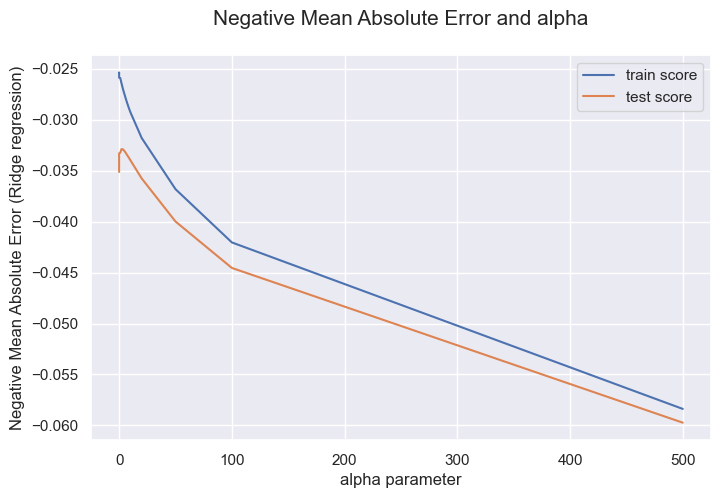

In [209]:
# plotting Negative Mean Absolute Error vs alpha for train and test

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(8,5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Ridge regression)')
plt.title("Negative Mean Absolute Error and alpha\n",fontsize=15)
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [210]:
# printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 3.0}
-0.032889315151678256


In [212]:
# lets now build Ridge Model using alpha = 3.0
alpha = 3.0
ridgeModel1 = Ridge(alpha=alpha)
ridgeModel1.fit(X_train, y_train)
ridgeModel1.coef_

array([-0.02789308,  0.02135811,  0.04519621,  0.12846639,  0.07924918,
       -0.00512412,  0.06278717,  0.02431545,  0.03644822,  0.06636522,
        0.06695108,  0.04774474,  0.0950171 ,  0.02653385,  0.02061072,
        0.02479099,  0.02147884,  0.01662673,  0.0405733 ,  0.01820379,
        0.0439125 ,  0.02239541,  0.00123924,  0.01521136,  0.0005366 ,
       -0.01039334, -0.03287982,  0.00996907,  0.04667047,  0.02302078,
        0.03973969,  0.02689039,  0.00770316, -0.0121382 ,  0.00160214,
        0.01011694, -0.01360664, -0.00121255,  0.01900525, -0.00758511,
       -0.00194045, -0.00325681, -0.00849444, -0.0038599 ,  0.00982305,
        0.0035602 , -0.00568388,  0.035844  , -0.02092137, -0.01355088,
       -0.02888193, -0.03667704, -0.01426297, -0.00731481,  0.00994758,
       -0.00923501,  0.01937355,  0.02552733, -0.02429796, -0.00770594,
       -0.00501011,  0.00081788,  0.01120806,  0.03877036, -0.009138  ,
        0.00868141,  0.01547175,  0.02750226, -0.02067931,  0.01

In [214]:
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, ridgeModel1.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.0025376968642195057


In [216]:
# predicting the R2 value of train data
y_train_pred = ridgeModel1.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data: ",r2_train)

The r2 value of train data:  0.9283958258433748


In [217]:
#predicting the R2 value of test data
y_test_pred = ridgeModel1.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data: ",r2_test)

The r2 value of test data:  0.8635499030952651


In [218]:
# Lets observe the porameters by changing +1 and -1 of the alpha value
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 1: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print("---------------------------------------------------")

alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 2: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print("---------------------------------------------------")

alpha = 4.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 3: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 1: 
The mean squared error value is  0.0024942606763177677
The r2 value of train data is  0.9283958258433748
The r2 value of test data is  0.8635499030952651
---------------------------------------------------
The output when alpha is 2: 
The mean squared error value is  0.0025376968642195057
The r2 value of train data is  0.9283958258433748
The r2 value of test data is  0.8635499030952651
---------------------------------------------------
The output when alpha is 3: 
The mean squared error value is  0.002581846124161484
The r2 value of train data is  0.9283958258433748
The r2 value of test data is  0.8635499030952651


#### As we can clearly the that the mean square error is slightly increasing with the increase or decrease of alpha value, so we can consider alpha = 3 as the best value

In [219]:
# house_pricing_ridge: Features and coefficienst of Ridge

house_pricing_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
house_pricing_ridge.reset_index(drop=True, inplace=True)
house_pricing_ridge

Features  Coefficient
0               MSSubClass      -0.0267
1              LotFrontage       0.0221
2                  LotArea       0.0437
3              OverallQual       0.1204
4              OverallCond       0.0742
5               MasVnrArea      -0.0032
6               BsmtFinSF1       0.0606
7               BsmtFinSF2       0.0210
8                BsmtUnfSF       0.0343
9              TotalBsmtSF       0.0626
10                1stFlrSF       0.0663
11                2ndFlrSF       0.0448
12               GrLivArea       0.0916
13            BsmtFullBath       0.0262
14                FullBath       0.0211
15                HalfBath       0.0245
16            BedroomAbvGr       0.0212
17            TotRmsAbvGrd       0.0199
18              Fireplaces       0.0415
19              GarageCars       0.0204
20              GarageArea       0.0425
21              WoodDeckSF       0.0220
22             OpenPorchSF       0.0028
23           EnclosedPorch       0.0144
24                  MoSold       0.0007
25                 Remodel      -0.0101
26             BuildingAge      -0.0332
27          OldOrNewGarage       0.0099
28             MSZoning_FV       0.0399
29             MSZoning_RH       0.0173
30             MSZoning_RL       0.0351
31             MSZoning_RM       0.0210
32            LotShape_IR2       0.0076
33            LotShape_IR3      -0.0108
34            LotShape_Reg       0.0014
35         LandContour_HLS       0.0103
36         LandContour_Low      -0.0131
37         LandContour_Lvl      -0.0012
38       LotConfig_CulDSac       0.0191
39           LotConfig_FR2      -0.0073
40           LotConfig_FR3      -0.0014
41        LotConfig_Inside      -0.0034
42    Neighborhood_Blueste      -0.0064
43     Neighborhood_BrDale      -0.0031
44    Neighborhood_BrkSide       0.0105
45    Neighborhood_ClearCr       0.0035
46    Neighborhood_CollgCr      -0.0059
47    Neighborhood_Crawfor       0.0357
48    Neighborhood_Edwards      -0.0202
49    Neighborhood_Gilbert      -0.0142
50     Neighborhood_IDOTRR      -0.0281
51    Neighborhood_MeadowV      -0.0342
52    Neighborhood_Mitchel      -0.0133
53      Neighborhood_NAmes      -0.0069
54    Neighborhood_NPkVill       0.0093
55     Neighborhood_NWAmes      -0.0079
56    Neighborhood_NoRidge       0.0180
57    Neighborhood_NridgHt       0.0257
58    Neighborhood_OldTown      -0.0228
59      Neighborhood_SWISU      -0.0063
60     Neighborhood_Sawyer      -0.0049
61    Neighborhood_SawyerW       0.0006
62    Neighborhood_Somerst       0.0123
63    Neighborhood_StoneBr       0.0372
64     Neighborhood_Timber      -0.0085
65    Neighborhood_Veenker       0.0087
66        Condition1_Feedr       0.0138
67         Condition1_Norm       0.0263
68         Condition1_PosA      -0.0165
69         Condition1_PosN       0.0159
70         Condition1_RRAe      -0.0193
71         Condition1_RRAn       0.0150
72         Condition1_RRNe       0.0000
73         Condition1_RRNn       0.0049
74         BldgType_2fmCon      -0.0020
75         BldgType_Duplex      -0.0113
76          BldgType_Twnhs      -0.0146
77         BldgType_TwnhsE      -0.0046
78       HouseStyle_1.5Unf       0.0017
79       HouseStyle_1Story      -0.0095
80       HouseStyle_2.5Fin      -0.0123
81       HouseStyle_2.5Unf      -0.0023
82       HouseStyle_2Story      -0.0027
83       HouseStyle_SFoyer      -0.0078
84         HouseStyle_SLvl       0.0012
85         RoofStyle_Gable      -0.0169
86       RoofStyle_Gambrel       0.0005
87           RoofStyle_Hip      -0.0119
88       RoofStyle_Mansard       0.0106
89          RoofStyle_Shed       0.0000
90     Exterior1st_AsphShn       0.0000
91     Exterior1st_BrkComm      -0.0045
92     Exterior1st_BrkFace       0.0326
93      Exterior1st_CBlock       0.0000
94     Exterior1st_CemntBd      -0.0091
95     Exterior1st_HdBoard      -0.0097
96     Exterior1st_ImStucc       0.0019
97     Exterior1st_MetalSd      -0.0068
98     Exterior1st_Plywood      -0.0004
99       Exterior1

In [220]:
# dictionary of Features and Coefficients

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0267,
 'LotFrontage': 0.0221,
 'LotArea': 0.0437,
 'OverallQual': 0.1204,
 'OverallCond': 0.0742,
 'MasVnrArea': -0.0032,
 'BsmtFinSF1': 0.0606,
 'BsmtFinSF2': 0.021,
 'BsmtUnfSF': 0.0343,
 'TotalBsmtSF': 0.0626,
 '1stFlrSF': 0.0663,
 '2ndFlrSF': 0.0448,
 'GrLivArea': 0.0916,
 'BsmtFullBath': 0.0262,
 'FullBath': 0.0211,
 'HalfBath': 0.0245,
 'BedroomAbvGr': 0.0212,
 'TotRmsAbvGrd': 0.0199,
 'Fireplaces': 0.0415,
 'GarageCars': 0.0204,
 'GarageArea': 0.0425,
 'WoodDeckSF': 0.022,
 'OpenPorchSF': 0.0028,
 'EnclosedPorch': 0.0144,
 'MoSold': 0.0007,
 'Remodel': -0.0101,
 'BuildingAge': -0.0332,
 'OldOrNewGarage': 0.0099,
 'MSZoning_FV': 0.0399,
 'MSZoning_RH': 0.0173,
 'MSZoning_RL': 0.0351,
 'MSZoning_RM': 0.021,
 'LotShape_IR2': 0.0076,
 'LotShape_IR3': -0.0108,
 'LotShape_Reg': 0.0014,
 'LandContour_HLS': 0.0103,
 'LandContour_Low': -0.0131,
 'LandContour_Lvl': -0.0012,
 'LotConfig_CulDSac': 0.0191,
 'LotConfig_FR2': -0.0073,
 'LotConfig_FR3': -0.0014,
 'LotConfig_In

In [221]:
# Do an RFE to minimise the features to 20
X_train_ridge = X_train[house_pricing_ridge.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_ridge, y_train)

In [222]:
# coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
1   OverallQual         True            1       0.1204
8     GrLivArea         True            1       0.0916
2   OverallCond         True            1       0.0742
7      1stFlrSF         True            1       0.0663
6   TotalBsmtSF         True            1       0.0626
3    BsmtFinSF1         True            1       0.0606
0       LotArea         True            1       0.0437
10   GarageArea         True            1       0.0425
9    Fireplaces         True            1       0.0415
12  MSZoning_FV         True            1       0.0399

#### Now using douple the above alpha

In [238]:
alpha = 6.0 # Optimal value of alpha is 3
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)
ridge2.coef_
print("The output when alpha is 6: ")
mse = mean_squared_error(y_test, ridge2.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 6: 
The mean squared error value is  0.0026678613579308335
The r2 value of train data is  0.920948738424105
The r2 value of test data is  0.8741399147597524


In [239]:
#Let's create a ridge model with alpha  = 6.0
ridge_doubled = Ridge(alpha = 6.0)
ridge_doubled.fit(X_train,y_train)

y_train_ridge_pred_doubled = ridge_doubled.predict(X_train)
y_test_ridge_pred_doubled = ridge_doubled.predict(X_test)
ridge_coef_doubled_df = pd.DataFrame(ridge_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 6 are :\n")
print(ridge_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 6 are :

             Coefficient
OverallQual     0.107755
GrLivArea       0.086496
OverallCond     0.066089
1stFlrSF        0.064355
TotalBsmtSF     0.057218
BsmtFinSF1      0.057194
Fireplaces      0.042718
LotArea         0.041339
2ndFlrSF        0.040734
GarageArea      0.040665


### Lasso - Regularization

In [223]:
lasso = Lasso()

# Considering following alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [225]:
# displaying the mean scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1       0.0002         -0.028255        -0.032492                1
0       0.0001         -0.026987        -0.032569                2
2       0.0003         -0.029103        -0.032705                3
3       0.0004         -0.029796        -0.033079                4
4       0.0005         -0.030416        -0.033564                5
5        0.001         -0.033353        -0.036004                6
6        0.002         -0.038123        -0.039985                7
7        0.003         -0.041615        -0.042982                8
8        0.004         -0.044825        -0.046005                9
9        0.005         -0.048703        -0.049869               10
10        0.01         -0.067068        -0.068551               11

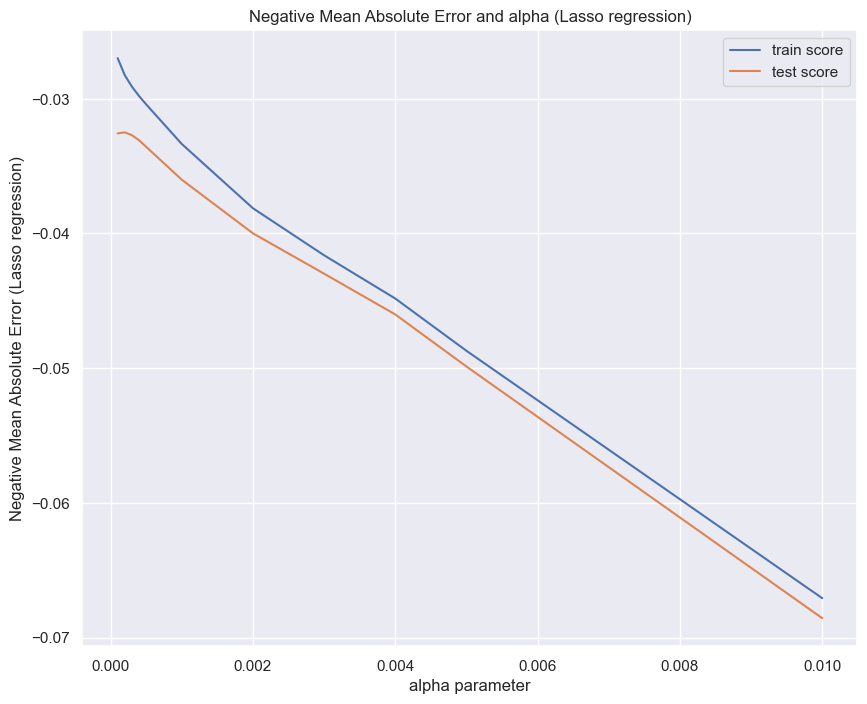

In [226]:
# plotting Negative Mean Absolute Error vs alpha for train and test
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.figure(figsize=(10,8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error and alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [227]:
# lambda best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [228]:
# Hyperparameter

alpha = 0.0002
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-2.22142747e-02,  1.51034072e-02,  4.77555359e-02,  1.96335204e-01,
        9.34989267e-02,  0.00000000e+00,  4.04685550e-02,  1.43924896e-03,
        0.00000000e+00,  1.21570283e-01,  0.00000000e+00,  1.36816222e-04,
        2.15205429e-01,  2.44575464e-02,  0.00000000e+00,  1.67625663e-02,
        0.00000000e+00,  0.00000000e+00,  3.50992651e-02,  1.59614728e-02,
        4.47560401e-02,  1.83198882e-02,  0.00000000e+00,  2.84148166e-03,
        0.00000000e+00, -9.80678768e-03, -2.91867817e-02,  9.41406500e-03,
        3.29974967e-02,  0.00000000e+00,  2.19402022e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.54591367e-03,
       -0.00000000e+00,  0.00000000e+00,  1.61260981e-02, -0.00000000e+00,
        0.00000000e+00, -2.69331785e-03, -0.00000000e+00, -0.00000000e+00,
        1.45394871e-02,  0.00000000e+00, -0.00000000e+00,  3.18842044e-02,
       -9.02641721e-03, -0.00000000e+00, -1.54269068e-02, -1.30774640e-02,
       -1.58945218e-03, -

In [229]:
# mse
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)

The mean squared error value is  0.0023407439854554834


In [230]:
#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

0.920948738424105
The r2 value of train data is  0.920948738424105


In [231]:
#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The r2 value of test data is  0.8741399147597524


In [232]:
# house_pricing_lasso: Features and coefficienst of Lasso
house_pricing_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
house_pricing_lasso = house_pricing_lasso[house_pricing_lasso['Coefficient'] != 0.00]
house_pricing_lasso.reset_index(drop=True, inplace=True)
house_pricing_lasso

Features  Coefficient
0              MSSubClass      -0.0222
1             LotFrontage       0.0151
2                 LotArea       0.0478
3             OverallQual       0.1963
4             OverallCond       0.0935
5              BsmtFinSF1       0.0405
6              BsmtFinSF2       0.0014
7             TotalBsmtSF       0.1216
8                2ndFlrSF       0.0001
9               GrLivArea       0.2152
10           BsmtFullBath       0.0245
11               HalfBath       0.0168
12             Fireplaces       0.0351
13             GarageCars       0.0160
14             GarageArea       0.0448
15             WoodDeckSF       0.0183
16          EnclosedPorch       0.0028
17                Remodel      -0.0098
18            BuildingAge      -0.0292
19         OldOrNewGarage       0.0094
20            MSZoning_FV       0.0330
21            MSZoning_RL       0.0219
22        LandContour_HLS       0.0015
23      LotConfig_CulDSac       0.0161
24       LotConfig_Inside      -0.0027
25   Neighborhood_BrkSide       0.0145
26   Neighborhood_Crawfor       0.0319
27   Neighborhood_Edwards      -0.0090
28    Neighborhood_IDOTRR      -0.0154
29   Neighborhood_MeadowV      -0.0131
30   Neighborhood_Mitchel      -0.0016
31   Neighborhood_NridgHt       0.0231
32   Neighborhood_OldTown      -0.0147
33   Neighborhood_Somerst       0.0066
34   Neighborhood_StoneBr       0.0250
35       Condition1_Feedr       0.0049
36        Condition1_Norm       0.0190
37        Condition1_RRAe      -0.0113
38        Condition1_RRAn       0.0007
39        BldgType_Duplex      -0.0051
40         BldgType_Twnhs      -0.0076
41      HouseStyle_1Story      -0.0034
42        HouseStyle_SLvl       0.0013
43        RoofStyle_Gable      -0.0035
44    Exterior1st_BrkFace       0.0244
45    Exterior1st_HdBoard      -0.0045
46    Exterior1st_VinylSd      -0.0064
47    Exterior1st_Wd Sdng      -0.0097
48    Exterior2nd_MetalSd       0.0036
49     MasVnrType_BrkFace       0.0041
50       MasVnrType_Stone       0.0050
51           ExterQual_Fa      -0.0275
52           ExterQual_TA      -0.0004
53      Foundation_CBlock       0.0035
54       Foundation_PConc       0.0255
55            BsmtQual_Fa      -0.0014
56            BsmtQual_TA      -0.0099
57            BsmtCond_Gd       0.0146
58            BsmtCond_TA       0.0144
59        BsmtExposure_Gd       0.0212
60        BsmtExposure_Mn      -0.0023
61        BsmtExposure_No      -0.0023
62       BsmtFinType1_BLQ      -0.0034
63       BsmtFinType1_GLQ       0.0055
64       BsmtFinType1_Rec      -0.0046
65       BsmtFinType1_Unf      -0.0066
66           HeatingQC_Fa      -0.0155
67           HeatingQC_Gd      -0.0057
68           HeatingQC_TA      -0.0101
69         KitchenQual_Fa      -0.0217
70         KitchenQual_Gd      -0.0131
71         KitchenQual_TA      -0.0178
72      GarageType_Attchd       0.0060
73        GarageType_none      -0.0265
74       GarageFinish_RFn      -0.0038
75       GarageFinish_Unf      -0.0071
76      GarageFinish_none      -0.0047
77          GarageQual_Fa      -0.0073
78          GarageQual_Gd       0.0072
79          GarageQual_TA       0.0068
80   SaleCondition_Normal       0.0144
81  SaleCondition_Partial       0.0366

In [233]:
# dictionary of Features and Coefficients
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.022214274691948137,
 'LotFrontage': 0.015103407214843238,
 'LotArea': 0.04775553588926682,
 'OverallQual': 0.196335204355948,
 'OverallCond': 0.09349892666623501,
 'MasVnrArea': 0.0,
 'BsmtFinSF1': 0.04046855501215432,
 'BsmtFinSF2': 0.0014392489582661977,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.1215702826373482,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0001368162223788654,
 'GrLivArea': 0.21520542940974377,
 'BsmtFullBath': 0.02445754639715789,
 'FullBath': 0.0,
 'HalfBath': 0.016762566302869066,
 'BedroomAbvGr': 0.0,
 'TotRmsAbvGrd': 0.0,
 'Fireplaces': 0.03509926510619994,
 'GarageCars': 0.015961472755648118,
 'GarageArea': 0.04475604009704306,
 'WoodDeckSF': 0.01831988815004375,
 'OpenPorchSF': 0.0,
 'EnclosedPorch': 0.0028414816616286406,
 'MoSold': 0.0,
 'Remodel': -0.009806787683432298,
 'BuildingAge': -0.029186781674573763,
 'OldOrNewGarage': 0.009414065004781763,
 'MSZoning_FV': 0.03299749666349247,
 'MSZoning_RH': 0.0,
 'MSZoning_RL': 0.02194020223196887,
 'MSZoning_RM

In [234]:
# RFE : minimising features to 20
X_train_lasso = X_train[house_pricing_lasso.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_lasso, y_train)

In [235]:
# coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
5              GrLivArea         True            1     0.215205
1            OverallQual         True            1     0.196335
2            OverallCond         True            1     0.093499
0                LotArea         True            1     0.047756
8             GarageArea         True            1     0.044756
3             BsmtFinSF1         True            1     0.040469
6             Fireplaces         True            1     0.035099
10           MSZoning_FV         True            1     0.032997
17      Foundation_PConc         True            1     0.025455
14  Neighborhood_StoneBr         True            1     0.024981

In [236]:
#lets predict the R-squared value of test
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8741399147597524


#### double the alpha

In [240]:
# lets use alpha value = 0.0004
alpha = 0.0004
lasso2 = Lasso(alpha=alpha)      
lasso2.fit(X_train, y_train) 
lasso2.coef_
print("The output when alpha is 0.0004: ")

mse = mean_squared_error(y_test, lasso2.predict(X_test))
print("The mean squared error value : ",mse)

y_train_pred = lasso2.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data : ",r2_train)

y_test_pred = lasso2.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data : ",r2_test)

The output when alpha is 0.0004: 
The mean squared error value :  0.0023134129027118032
The r2 value of train data :  0.9136340900552962
The r2 value of test data :  0.8756094870090894


In [241]:
#Let's create a lasso model with alpha  = 0.0004 
lasso_doubled = Lasso(alpha=0.0004)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 0.0004 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 0.0004 are:

                       Coefficient
GrLivArea                 0.219931
OverallQual               0.210416
TotalBsmtSF               0.106060
OverallCond               0.084730
BsmtFinSF1                0.048986
GarageArea                0.047040
LotArea                   0.043390
Fireplaces                0.038576
SaleCondition_Partial     0.033885
MSZoning_FV               0.028772


## Conclusion :-

The optimal value of Lambda we got in case of Ridge and Lasso is :

* Ridge - **3.0**
* Lasso - **0.0002**

The r2 value we got in case of Ridge and Lasso:

* Ridge
<br> Train = **0.928** , Test = **0.863**

* Lasso
<br> Train = **0.920** , Test = **0.874**

The Mean Squared error in case of Ridge and Lasso is:

* Ridge - **0.00253**
* Lasso - **0.00234**

* Mean Squared Error of Lasso is slightly lower than that of Ridge.
* Also since Lasso helps in feature reduction (as the coefficient value of one of the lasso's feature to be shrunk toward 0) and helps to increase model interpretation by taking the magnitude of the coefficients thus Lasso has a better edge over Ridge.

## Assignment Part - II ( Finding solutions for the subjective questions. PDF file has the complete answers)

**Question 1** : What is the optimal value of alpha for ridge and lasso regression? **What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?** What will be the most important predictor variables after the change is implemented?

In [242]:
#Lets find for Ridge first
alpha = 3.0 # Optimal value of alpha is 3
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 3: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 6.0 # Optimal value of alpha is 3
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 6: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 3: 
The mean squared error value is  0.0025376968642195057
The r2 value of train data is  0.9136340900552962
The r2 value of test data is  0.8756094870090894

The output when alpha is 6: 
The mean squared error value is  0.0026678613579308335
The r2 value of train data is  0.9136340900552962
The r2 value of test data is  0.8756094870090894


In [244]:
#Let's create a ridge model with alpha  = 6.0
ridge_doubled = Ridge(alpha = 6.0)
ridge_doubled.fit(X_train,y_train)

y_train_ridge_pred_doubled = ridge_doubled.predict(X_train)
y_test_ridge_pred_doubled = ridge_doubled.predict(X_test)
ridge_coef_doubled_df = pd.DataFrame(ridge_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 6 are :\n")
print(ridge_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 6 are :

             Coefficient
OverallQual     0.107755
GrLivArea       0.086496
OverallCond     0.066089
1stFlrSF        0.064355
TotalBsmtSF     0.057218
BsmtFinSF1      0.057194
Fireplaces      0.042718
LotArea         0.041339
2ndFlrSF        0.040734
GarageArea      0.040665


In [245]:
#Now lets calculate for Lasso
alpha = 0.0002
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_# mse
print("The output when alpha is 0.0002: ")

mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value : ",mse)

y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data : ",r2_train)

y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data : ",r2_test)
print("----------------------------------------------------")

alpha = 0.0004
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 
lasso.coef_
print("The output when alpha is 0.0004: ")

mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value : ",mse)

y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data : ",r2_train)

y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data : ",r2_test)

The output when alpha is 0.0002: 
The mean squared error value :  0.0023407439854554834
The r2 value of train data :  0.920948738424105
The r2 value of test data :  0.8741399147597524
----------------------------------------------------
The output when alpha is 0.0004: 
The mean squared error value :  0.0023134129027118032
The r2 value of train data :  0.9136340900552962
The r2 value of test data :  0.8756094870090894


In [246]:
#Let's create a lasso model with alpha  = 0.0004 
lasso_doubled = Lasso(alpha=0.0004)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top correlated features when alpha is 0.0004 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(10))

Top correlated features when alpha is 0.0004 are:

                       Coefficient
GrLivArea                 0.219931
OverallQual               0.210416
TotalBsmtSF               0.106060
OverallCond               0.084730
BsmtFinSF1                0.048986
GarageArea                0.047040
LotArea                   0.043390
Fireplaces                0.038576
SaleCondition_Partial     0.033885
MSZoning_FV               0.028772


**Question 3** :After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [248]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 830 to 860
Columns: 192 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(28), uint8(164)
memory usage: 363.5 KB


In [249]:
#dropping the top 5 most important predictor variables in the lasso model 
drop_cols = ['OverallQual','GrLivArea','TotalBsmtSF','OverallCond','BsmtFinSF1']
X_train.drop(labels = drop_cols, axis = 1, inplace=True)
X_test.drop(labels = drop_cols, axis = 1, inplace=True)
print(X_train.shape)
print(X_test.shape)

(940, 187)
(404, 187)


In [250]:
#Let's create a lasso model with alpha  = 0.0001
lasso_doubled = Lasso(alpha=0.0001)
lasso_doubled.fit(X_train,y_train)
y_train_pred_doubled = lasso_doubled.predict(X_train)
y_test_pred_doubled = lasso_doubled.predict(X_test)
lasso_coef_doubled_df = pd.DataFrame(lasso_doubled.coef_ , columns = ['Coefficient'], index =  X_train.columns)
print("Top 5 correlated features when alpha is 0.0001 are:\n")
print(lasso_coef_doubled_df.sort_values(by = 'Coefficient', ascending = False).head(5))

Top 5 correlated features when alpha is 0.0001 are:

             Coefficient
1stFlrSF        0.265464
2ndFlrSF        0.127761
GarageArea      0.076040
MSZoning_FV     0.069523
MSZoning_RL     0.056384
